# Individual Plots from the ROOT files

In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array  # Correct import for the array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06
 
Starting RG-A SIDIS Analysis
 

Started running on 7-15-2024 at 12:59 p.m.



.

.

.

## Load RDataFrames

In [2]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"
    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
    loading = "".join([location, file])
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################

Smearing_Options = "no_smear"

Common_Name = "Pass_2_5D_Unfold_Test_V7_All"
# Common_Name = "5D_Unfold_Test_V7_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V3_All"

Common_Name = "Pass_2_New_Sector_Cut_Test_V10_All"

Standard_Histogram_Title_Addition = ""

Pass_Version = "Pass 2" if("Pass_2" in Common_Name) else "Pass 1"
if(Pass_Version not in [""]):
    if(Standard_Histogram_Title_Addition not in [""]):
        Standard_Histogram_Title_Addition = f"{Pass_Version} - {Standard_Histogram_Title_Addition}"
    else:
        Standard_Histogram_Title_Addition = Pass_Version


print(f"{color.BBLUE}\nRunning with {Pass_Version} files\n\n{color.END}")
        
        
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
    REAL_File_Name = REAL_File_Name.replace("_V9_All", "_V10_5311")
else:
    REAL_File_Name = "Pass_2_5D_Unfold_Test_V7_All" if(Pass_Version in ["Pass 2"]) else "5D_Unfold_Test_V7_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Unsmeared_Pass_2_5D_Unfold_Test_V7_All"      if(Smearing_Options in ["no_smear"]) else "Pass_2_5D_Unfold_Test_V7_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V1_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V1_All"
    MC_REC_File_Name = "Unsmeared_Pass_2_New_Sector_Cut_Test_V3_All" if(Smearing_Options in ["no_smear"]) else "Pass_2_New_Sector_Cut_Test_V3_All"
    MC_REC_File_Name = f"Unsmeared_{Common_Name}" if(Smearing_Options in ["no_smear"]) else Common_Name
#     MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_20")
    MC_REC_File_Name = MC_REC_File_Name.replace("_V9_All", "_V10_All")
    if(Pass_Version not in ["Pass 2"]):
        MC_REC_File_Name = MC_REC_File_Name.replace("Pass_2_", "")
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
    print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Pass_2_New_Sector_Cut_Test_V9_All"
####################################
##   Generated Monte Carlo Data   ##
####################################


################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE,  " Real (Experimental) Data",       color.END, " in       '", color.BOLD, REAL_File_Name,   color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED,   " Reconstructed Monte Carlo Data", color.END, " in '",       color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN, " Generated Monte Carlo Data",     color.END, " in     '",   color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.Error, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END_R, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print(f"{color.BOLD}\nPass Version in use is:{color.END}{color.BLUE} {Pass_Version}{color.END_B}\n\n\nDone Loading RDataFrame files...\n\n{color.END}")


Running with Pass 2 files



Not using the common file name for the Reconstructed Monte Carlo Data...


Not using the common file name for the Generated Monte Carlo Data...

The total number of histograms available for the Real (Experimental) Data in       'Pass_2_New_Sector_Cut_Test_V10_All' is 690
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unsmeared_Pass_2_New_Sector_Cut_Test_V10_All' is 1596
The total number of histograms available for the Generated Monte Carlo Data in     'Pass_2_New_Sector_Cut_Test_V9_All' is 416

Pass Version in use is: Pass 2


Done Loading RDataFrame files...




.

.

.

### Find Histogram from within the RDataFrame(s)

In [5]:
# for mdf_name in rdf.GetListOfKeys():
# #     if("(Var-D1='Hx'" in str(mdf_name.GetName())):
# #     if("pipsec" in str(mdf_name.GetName())):
# #         print(mdf_name.GetName() + "\n")
# #     if("Normal_2D" in str(mdf_name.GetName())):
# #     if("PID" in str(mdf_name.GetName())):
# #         print(mdf_name.GetName() + "\n")
# #     print(mdf_name)
# #     print(mdf_name.GetName() + "\n")
#     if("Var-D1='Q2'" in str(mdf_name.GetName())):
#         print(mdf_name.GetName() + "\n")
        
        
# print("Done")

In [4]:
# try:
#     Run_REAL_Search = False
# #     Run_REAL_Search = True

#     Run_MC_REC_Search = False
#     Run_MC_REC_Search = not True

#     Run_MC_GEN_Search = False
# #     Run_MC_GEN_Search = True
    
#     def Search_Condition_Common(name="name"):
#         # if((str(name).find("Title: #splitline{")) != -1):
#         #     name = str(name).replace(str(name).replace(str(name)[:(str(name).find("Title: #splitline{"))], ""), "")
#         name = name.GetName()
        
#         out_list = [True]
        
#         out_list.append("Var-D1='elth'" in str(name))
#         out_list.append("Var-D2='el'"   in str(name))
#         out_list.append("no_cut"    not in str(name))
        
# #         out_list.append("Var-D1='Q2'" in str(name))
# #         out_list.append("Background" in str(name))
# #         out_list.append("Multi"      in str(name))
# # #         out_list.append("Combine"    in str(name))
# #         out_list.append("no_cut" not in str(name))
# #         out_list.append("2D"         in str(name))
# # #         out_list.append("'xB'"     in str(name))
# #         out_list.append("'y_smeared'"         in str(name))
# #         out_list.append("Q2-y-Bin=5" in str(name))
# #         out_list.append("smear"      in str(name))

# #         out_list.append("Q2-y-Bin=17" in str(name))
# #         out_list.append("phi_t" in str(name))
# #         out_list.append("pipsec" in str(name))
# #         out_list.append("'el'" in str(name))

# #         out_list.append("2D" not in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("4D" in str(name))
# #         out_list.append("Multi_Dim_Q2_phi_t" in str(name))

# #         out_list.append("no_cut" not in str(name))
# # #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" in str(name))
# #         out_list.append("Multi_Dim_" in str(name))
# #         out_list.append("Gen_MM_Cut" not in str(name))
        
# #         out_list.append("Multi_Dim_z_pT_Bin_y_bin_phi_t" not in str(name))
# #         out_list.append("Multi_Dim_Q2_y_Bin_phi_t"       not in str(name))
    
# #         out_list.append("Q2-y-Bin=All"             in str(name))
# #         out_list.append("'Response_Matrix_Normal'" in str(name))
        
#         out = False not in out_list
# #         out = True
# #         out = ("Gen_MM_Cut" not in str(name)) and ("2D" not in str(name))
# #         out = ("2D" not in str(name))
# #         if(out):
# #             print("out_list =", out_list, "\nout =", out)
# #             print("name =", name, "\n")
#         return out

#     if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
#         if(Run_REAL_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Real (Experimental) Data files:
#         """, color.END]))
#             REAL_Search_Count = 0
#             REAL_Search_Condition = True
#             for rdf_name in rdf.GetListOfKeys():
#                 # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
# #                 REAL_Search_Condition = ("Normal_2D" in str(rdf_name) and "cut_Complete_SIDIS" in str(rdf_name))
#                 # REAL_Search_Condition = ("Normal_2D" not in str(rdf_name) and "cut_Complete_EDIS" in str(rdf_name))
# #                 REAL_Search_Condition = ("Response_Matrix" in str(rdf_name))
#                 if(REAL_Search_Condition and Search_Condition_Common(name=rdf_name)):
#                     REAL_Search_Count += 1
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
# #                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(REAL_Search_Count), ")\t", color.BLUE, str(rdf_name.GetName()), color.END, color.BOLD, "\n\t-----   object type: ", color.BLUE, str(type(rdf.Get(rdf_name.GetName()))), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL REAL = """, str(REAL_Search_Count), """
#         Done checking the Real (Experimental) Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Real (Experimental) Data files...")

#         if(Run_MC_REC_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Reconstructed Monte Carlo Data files:
#         """, color.END]))
#             MC_REC_Search_Count = 0
#             for mdf_name in mdf.GetListOfKeys():
#                 MC_REC_Search_Condition = True
# #                 MC_REC_Search_Condition = ("Normal_2D" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("(Smear-Type='')" in str(mdf_name) and "[Q2-y-Bin=All" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "cut_Complete_SIDIS" in str(mdf_name) and "'xB'" in str(mdf_name))
# #                 MC_REC_Search_Condition = ("Response_Matrix_Normal" in str(mdf_name) and "Combined_phi_t_Q2" in str(mdf_name))
#                 # MC_REC_Search_Condition = ("Mom_Cor_Code" in str(mdf_name))# and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
#                 if(MC_REC_Search_Condition and Search_Condition_Common(name=mdf_name)):
#                     MC_REC_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     # print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\t", color.RED, str(mdf_name.GetName()), color.END]))
#                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END, color.BOLD, "\n\t object type: ", color.RED, str(type(mdf.Get(mdf_name.GetName()))), color.END]))
#                     print("mdf_name.GetTitle() =", mdf_name.GetTitle())
# #                     print("".join(["\n   Histo ", str(MC_REC_Search_Count), ")\n\t", color.RED, str(mdf_name.GetName()), color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC REC = """, str(MC_REC_Search_Count), """
#         Done checking the Reconstructed Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Reconstructed Monte Carlo Data files...")

#         if(Run_MC_GEN_Search):
#             print("".join([color.BOLD, """

# --------------------------------------------------------------------------------------------------------------------------------------------------------
#         Checking the Generated Monte Carlo Data files:
#         """, color.END]))
#             MC_GEN_Search_Count = 0
#             MC_GEN_Search_Condition = True
#             for gdf_name in gdf.GetListOfKeys():
#                 # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
#                 if(MC_GEN_Search_Condition and Search_Condition_Common(name=gdf_name)):
#                     MC_GEN_Search_Count += 1
#                     # print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), color.END]))
# #                     print("".join(["\n   Histo ", str(MC_GEN_Search_Count), ")\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
#             print("".join([color.BOLD, """
#         TOTAL MC GEN = """, str(MC_GEN_Search_Count), """
#         Done checking the Generated Monte Carlo Data files
# --------------------------------------------------------------------------------------------------------------------------------------------------------

#         """, color.END]))
#         else:
#             print("Not Checking the Generated Monte Carlo Data files...")

#     else:
#         print("Not checking any of the data files...")

#     print("\nDONE CHECKING FILES\n")
# except:
#     print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

.

.

.

## Creating Sector Contribution Plots

Histo_rdf_Title = #splitline{#splitline{Experimental Data #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: 22 #topbar #pi^{+} Pion Sector All}{Pass Version: #color[4]{Pass 2}}}}{}
Standard_Histogram_Title_Addition = Pass 2
Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


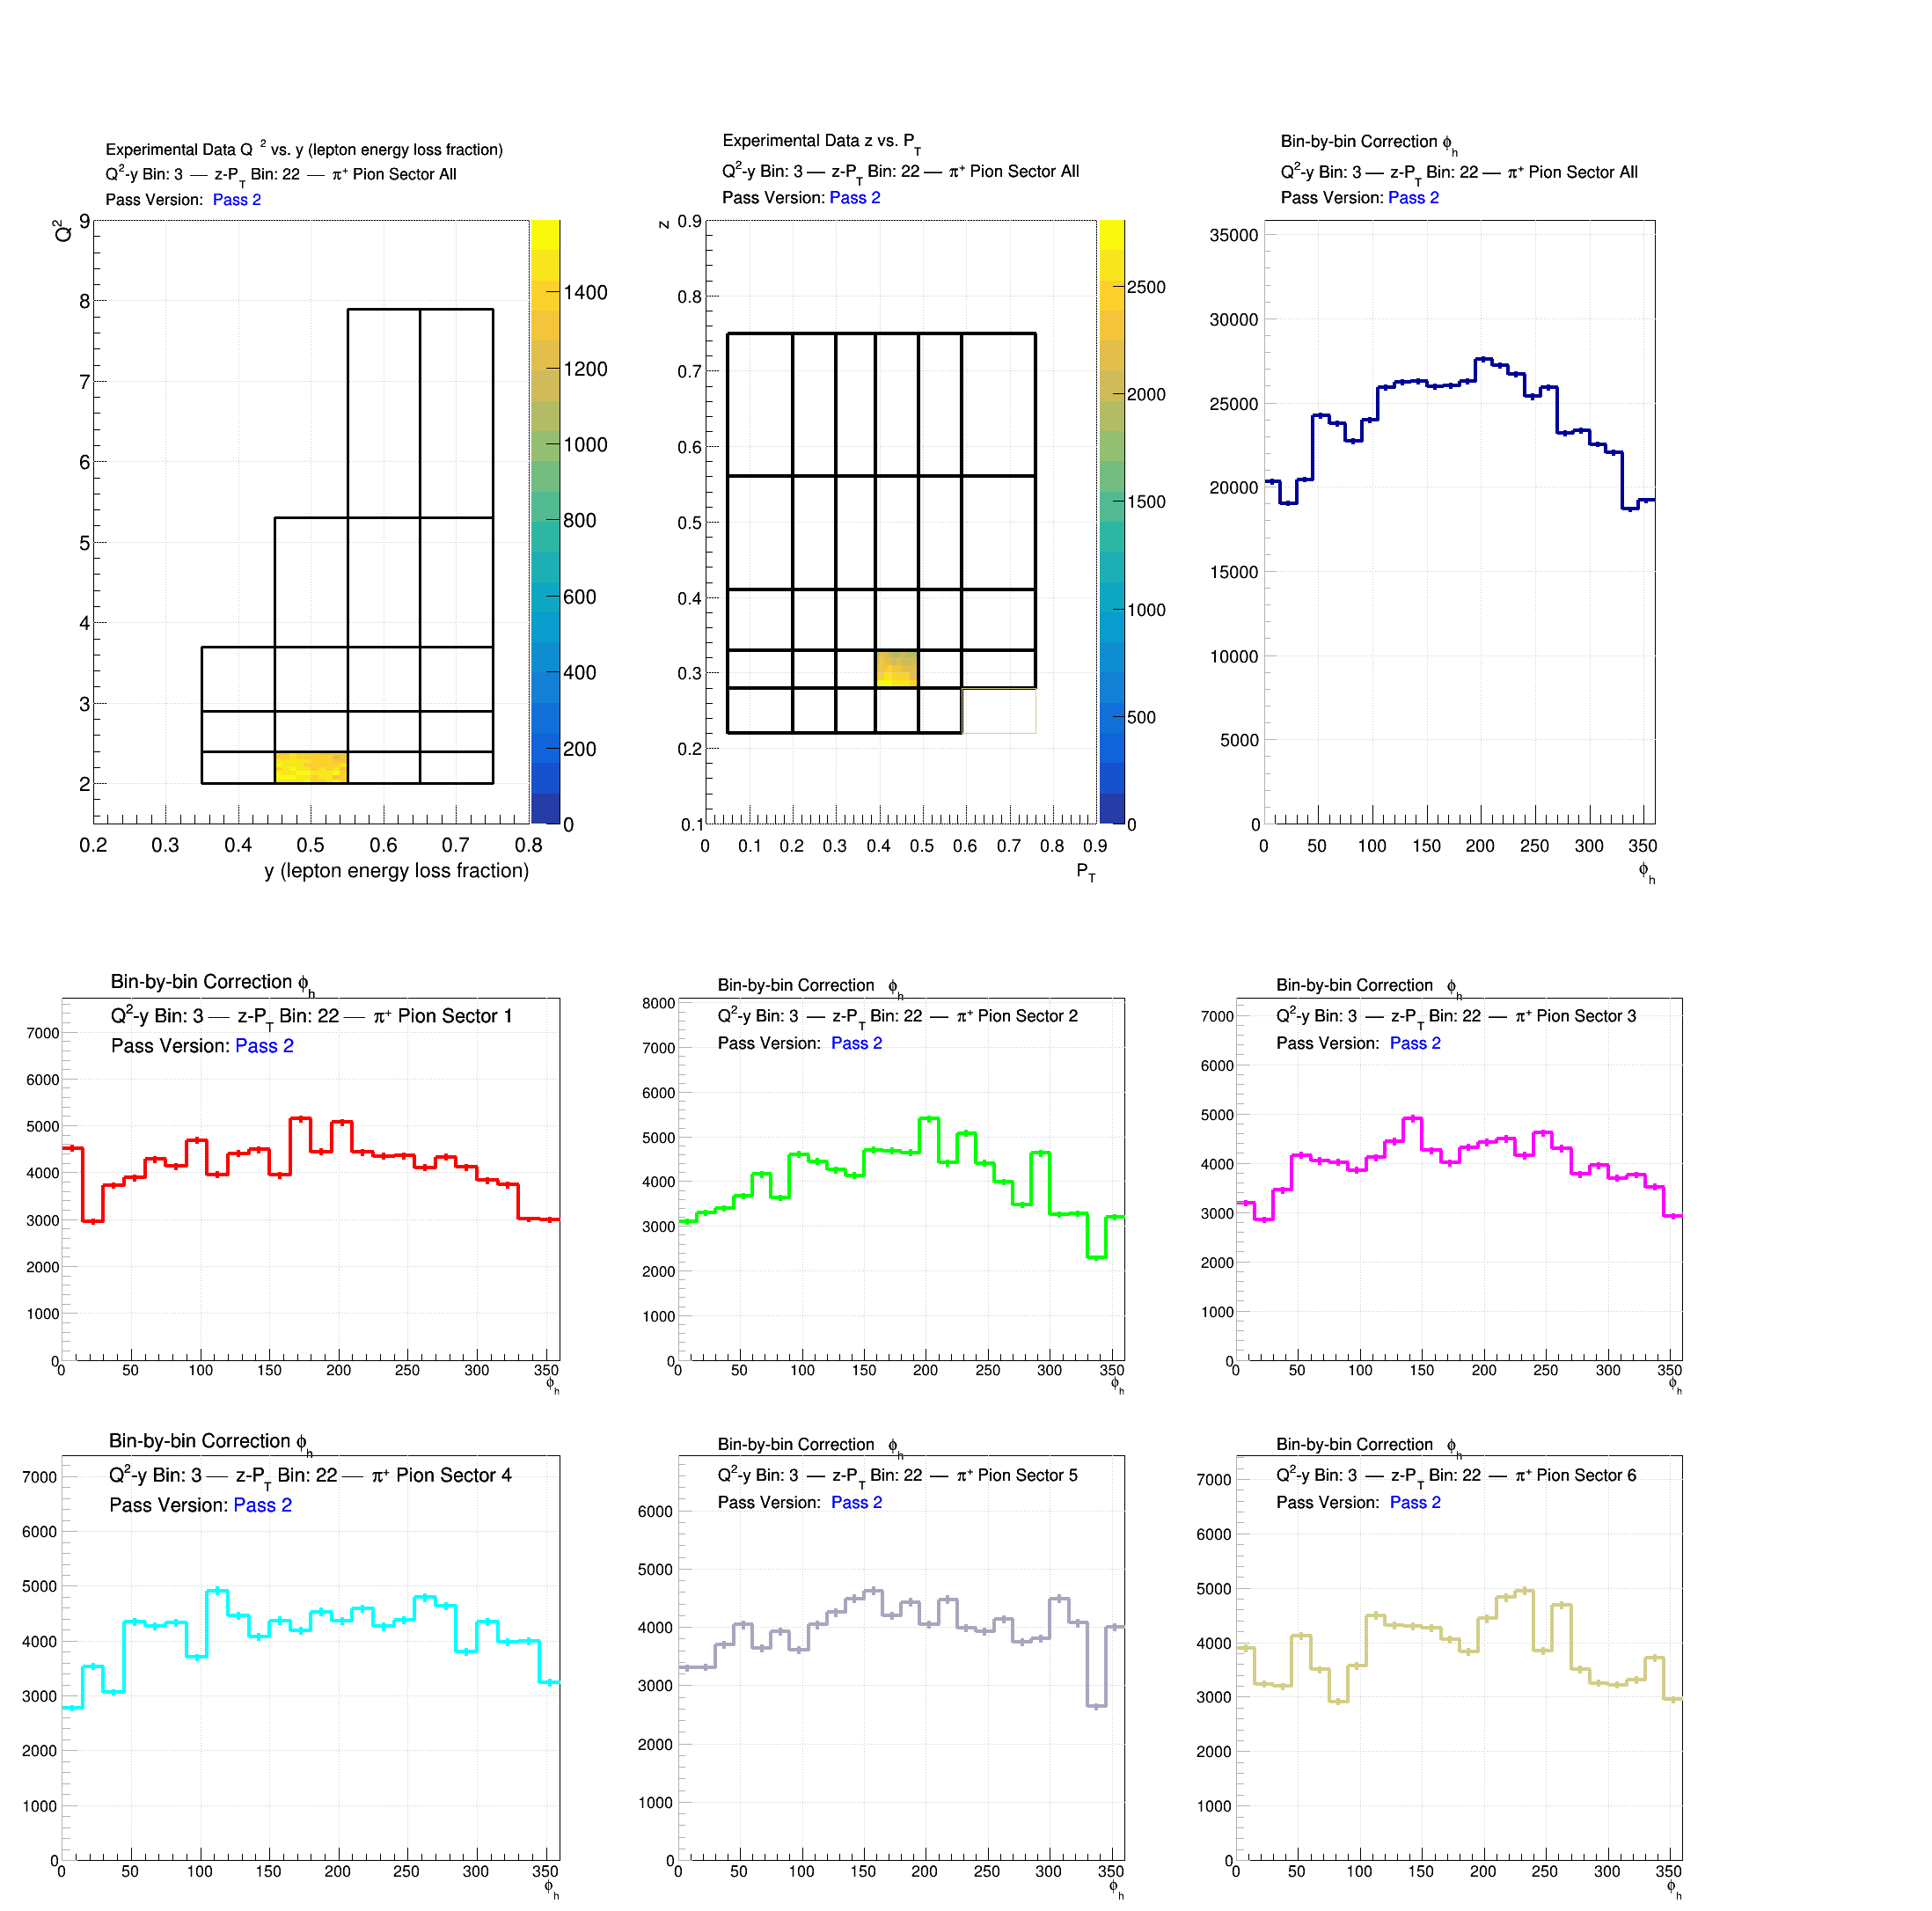

In [9]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"

Q2_y_Bin = "All"
Q2_y_Bin = "3"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))

Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))


Histo_mdf_Title_OG = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title_OG = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title_OG = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_bdf_Title_OG = str(Histo_bdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")


Histo_mdf_Q2_y_Title = str(Histo_mdf_Q2_y_3D.GetTitle())
Histo_bdf_Q2_y_Title = str(Histo_bdf_Q2_y_3D.GetTitle())
Histo_rdf_Q2_y_Title = str(Histo_rdf_Q2_y_3D.GetTitle())
Histo_gdf_Q2_y_Title = str(Histo_gdf_Q2_y_3D.GetTitle())

Histo_mdf_z_pT_Title = str(Histo_mdf_z_pT_3D.GetTitle())
Histo_bdf_z_pT_Title = str(Histo_bdf_z_pT_3D.GetTitle())
Histo_rdf_z_pT_Title = str(Histo_rdf_z_pT_3D.GetTitle())
Histo_gdf_z_pT_Title = str(Histo_gdf_z_pT_3D.GetTitle())


z_pT_Bin_Unfold = 22
# z_pT_Bin_Unfold = "All"
Particle_Sector = "#pi^{+} Pion Sector"
Sector = "All"
if(Sector not in ["All", 0]):
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
else:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else ""]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}"])])
    
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)


Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_Q2_y_Title = Histo_bdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Q2_y_Title = Histo_gdf_Q2_y_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_bdf_z_pT_Title = Histo_bdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_z_pT_Title = Histo_gdf_z_pT_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)

Histo_mdf_Title      = Histo_mdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Title      = Histo_rdf_Title.replace(     "Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_Q2_y_Title = Histo_mdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_Q2_y_Title = Histo_rdf_Q2_y_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_mdf_z_pT_Title = Histo_mdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
Histo_rdf_z_pT_Title = Histo_rdf_z_pT_Title.replace("Cut: Complete Set of SIDIS Cuts", "")
print(f"Histo_rdf_Title = {Histo_rdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

    
# Generated histogram should always integrate the sectors
Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_bdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")
Histo_bdf_2D  = Histo_bdf_3D.Project3D("z")

Histo_mdf_2D.SetName("Histo_mdf_2D")
Histo_rdf_2D.SetName("Histo_rdf_2D")
Histo_gdf_2D.SetName("Histo_gdf_2D")
Histo_bdf_2D.SetName("Histo_bdf_2D")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)
Histo_bdf_2D.SetTitle(Histo_bdf_Title)


Histo_Acceptance = Histo_mdf_2D.Clone("Histo_Acceptance")
Histo_Acceptance.Add(Histo_bdf_2D)
Histo_Acceptance.Divide(Histo_gdf_2D)
Histo_BBB_2D = Histo_rdf_2D.Clone("Histo_BBB_2D")
Histo_BBB_2D.Divide(Histo_Acceptance)
Histo_BBB_2D.SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction")).replace("Cut: Complete Set of SIDIS Cuts", ""))


Histo_mdf_Q2_y_2D = Histo_mdf_Q2_y_3D.Project3D("yz")
Histo_bdf_Q2_y_2D = Histo_bdf_Q2_y_3D.Project3D("yz")
Histo_rdf_Q2_y_2D = Histo_rdf_Q2_y_3D.Project3D("yz")
Histo_gdf_Q2_y_2D = Histo_gdf_Q2_y_3D.Project3D("yz")

Histo_mdf_Q2_y_2D.SetTitle(Histo_mdf_Q2_y_Title)
Histo_bdf_Q2_y_2D.SetTitle(Histo_bdf_Q2_y_Title)
Histo_rdf_Q2_y_2D.SetTitle(Histo_rdf_Q2_y_Title)
Histo_gdf_Q2_y_2D.SetTitle(Histo_gdf_Q2_y_Title)

Histo_mdf_z_pT_2D = Histo_mdf_z_pT_3D.Project3D("yz")
Histo_bdf_z_pT_2D = Histo_bdf_z_pT_3D.Project3D("yz")
Histo_rdf_z_pT_2D = Histo_rdf_z_pT_3D.Project3D("yz")
Histo_gdf_z_pT_2D = Histo_gdf_z_pT_3D.Project3D("yz")

Histo_mdf_z_pT_2D.SetTitle(Histo_mdf_z_pT_Title)
Histo_bdf_z_pT_2D.SetTitle(Histo_bdf_z_pT_Title)
Histo_rdf_z_pT_2D.SetTitle(Histo_rdf_z_pT_Title)
Histo_gdf_z_pT_2D.SetTitle(Histo_gdf_z_pT_Title)


Histo_All = {}
Particle_Sector = "#pi^{+} Pion Sector"
for Sector in [1, 2, 3, 4, 5, 6]:
    New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_y_Bin) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])
    Histo_mdf_Title = Histo_mdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_rdf_Title = Histo_rdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_gdf_Title = Histo_gdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_bdf_Title = Histo_bdf_Title_OG.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_bdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"]  = Histo_mdf_3D.Project3D("z")
    Histo_All[f"Histo_rdf_2D_{Sector}"]  = Histo_rdf_3D.Project3D("z")
    Histo_All[f"Histo_gdf_2D_{Sector}"]  = Histo_gdf_3D.Project3D("z")
    Histo_All[f"Histo_bdf_2D_{Sector}"]  = Histo_bdf_3D.Project3D("z")

    Histo_All[f"Histo_mdf_2D_{Sector}"].SetTitle(Histo_mdf_Title)
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetTitle(Histo_rdf_Title)
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetTitle(Histo_gdf_Title)
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetTitle(Histo_bdf_Title)
    
    Histo_All[f"Histo_mdf_2D_{Sector}"].SetName(f"Histo_mdf_2D_{Sector}")
    Histo_All[f"Histo_rdf_2D_{Sector}"].SetName(f"Histo_rdf_2D_{Sector}")
    Histo_All[f"Histo_gdf_2D_{Sector}"].SetName(f"Histo_gdf_2D_{Sector}")
    Histo_All[f"Histo_bdf_2D_{Sector}"].SetName(f"Histo_bdf_2D_{Sector}")
    
    Histo_All[f"Histo_Acceptance_{Sector}"] = Histo_All[f"Histo_mdf_2D_{Sector}"].Clone(f"Histo_Acceptance_{Sector}")
    Histo_All[f"Histo_Acceptance_{Sector}"].Add(Histo_All[f"Histo_bdf_2D_{Sector}"])
    Histo_All[f"Histo_Acceptance_{Sector}"].Divide(Histo_All[f"Histo_gdf_2D_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"] = Histo_All[f"Histo_rdf_2D_{Sector}"].Clone(f"Histo_BBB_1D_{Sector}")
    Histo_All[f"Histo_BBB_2D_{Sector}"].Divide(Histo_All[f"Histo_Acceptance_{Sector}"])
    Histo_All[f"Histo_BBB_2D_{Sector}"].SetTitle(str(Histo_rdf_Title.replace("Experimental Data", "Bin-by-bin Correction").replace("Cut: Complete Set of SIDIS Cuts", "")))
    
    

canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=2200, Size_Y=2200, cd_Space=0)
canvas_upper = canvas_main.cd(1)
canvas_lower = canvas_main.cd(2)
canvas_upper.Divide(3, 1, 0, 0)
canvas_lower.Divide(3, 2, 0, 0)
# ROOT.gPad.SetLogz(1)
canvas_main.Draw()

Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_Q2_y_2D.Draw("colz")
Q2_y_borders = {}
for Q2_Y_Bin_ii in range(1, 18, 1):
    Q2_y_borders[Q2_Y_Bin_ii] = Draw_Q2_Y_Bins(Input_Bin=Q2_Y_Bin_ii)
    for line in Q2_y_borders[Q2_Y_Bin_ii]:
        line.Draw("same")
Histo_rdf_Q2_y_2D.GetXaxis().SetRangeUser(0.2, 0.8)
Histo_rdf_Q2_y_2D.GetYaxis().SetRangeUser(1.5, 9)
Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_z_pT_2D.Draw("colz")
Histo_rdf_z_pT_2D.GetXaxis().SetRangeUser(0,   0.9)
Histo_rdf_z_pT_2D.GetYaxis().SetRangeUser(0.1, 0.9)
if(Q2_y_Bin not in ["All", "0", 0]):
    Draw_z_pT_Bins_With_Migration(Q2_y_Bin_Num_In=int(Q2_y_Bin), Set_Max_Y=1.2, Set_Max_X=1.2, Plot_Orientation_Input="z_pT")


Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_BBB_2D.SetLineWidth(4)
Histo_BBB_2D.Draw("same hist E0")
Histo_BBB_2D.GetYaxis().SetRangeUser(0, 1.3*(Histo_BBB_2D.GetBinContent(Histo_BBB_2D.GetMaximumBin())))
draw_type = "BBB"
for Sector in [1, 2, 3, 4, 5, 6]:
    color_of_sector      = Sector + 1
    if(color_of_sector  >= 4):
        color_of_sector += 1
    if(color_of_sector  >= 5):
        color_of_sector += 1
    if(color_of_sector  >= 8):
        color_of_sector += 1
    if(color_of_sector  >= 9):
        color_of_sector += 1
    if(color_of_sector  >= 10):
        color_of_sector += 30
#         print(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineColor(color_of_sector)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].SetLineWidth(4)
#     Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.2*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
#     Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
    Draw_Canvas(canvas=canvas_lower, cd_num=Sector, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetYaxis().SetRangeUser(0, 1.5*(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetBinContent(Histo_All[f"Histo_{draw_type}_2D_{Sector}"].GetMaximumBin())))
    Histo_All[f"Histo_{draw_type}_2D_{Sector}"].Draw("same hist E0")
    
    
# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


#splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{Q^{2}-y Bin: 3 #topbar z-P_{T} Bin: All}}{Cut: No Cuts}

In [5]:
# Q2_xB_Bin_Unfold = 0
# z_pT_Bin_Unfold = 0
# Particle_Sector = "#pi^{+} Pion Sector"
# Sector = 1
# New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_xB_Bin_Unfold), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])# if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "}"])
# print(New_Bin_Title)

## Making Plots

Histo_gdf_Title = #splitline{#splitline{Monte Carlo Data (GEN) #phi_{h}}{#splitline{#pi^{+} Pion Sector 1}{Pass Version: #color[4]{Pass 2}}}}{Cut: No Cuts}
Standard_Histogram_Title_Addition = Pass 2
Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


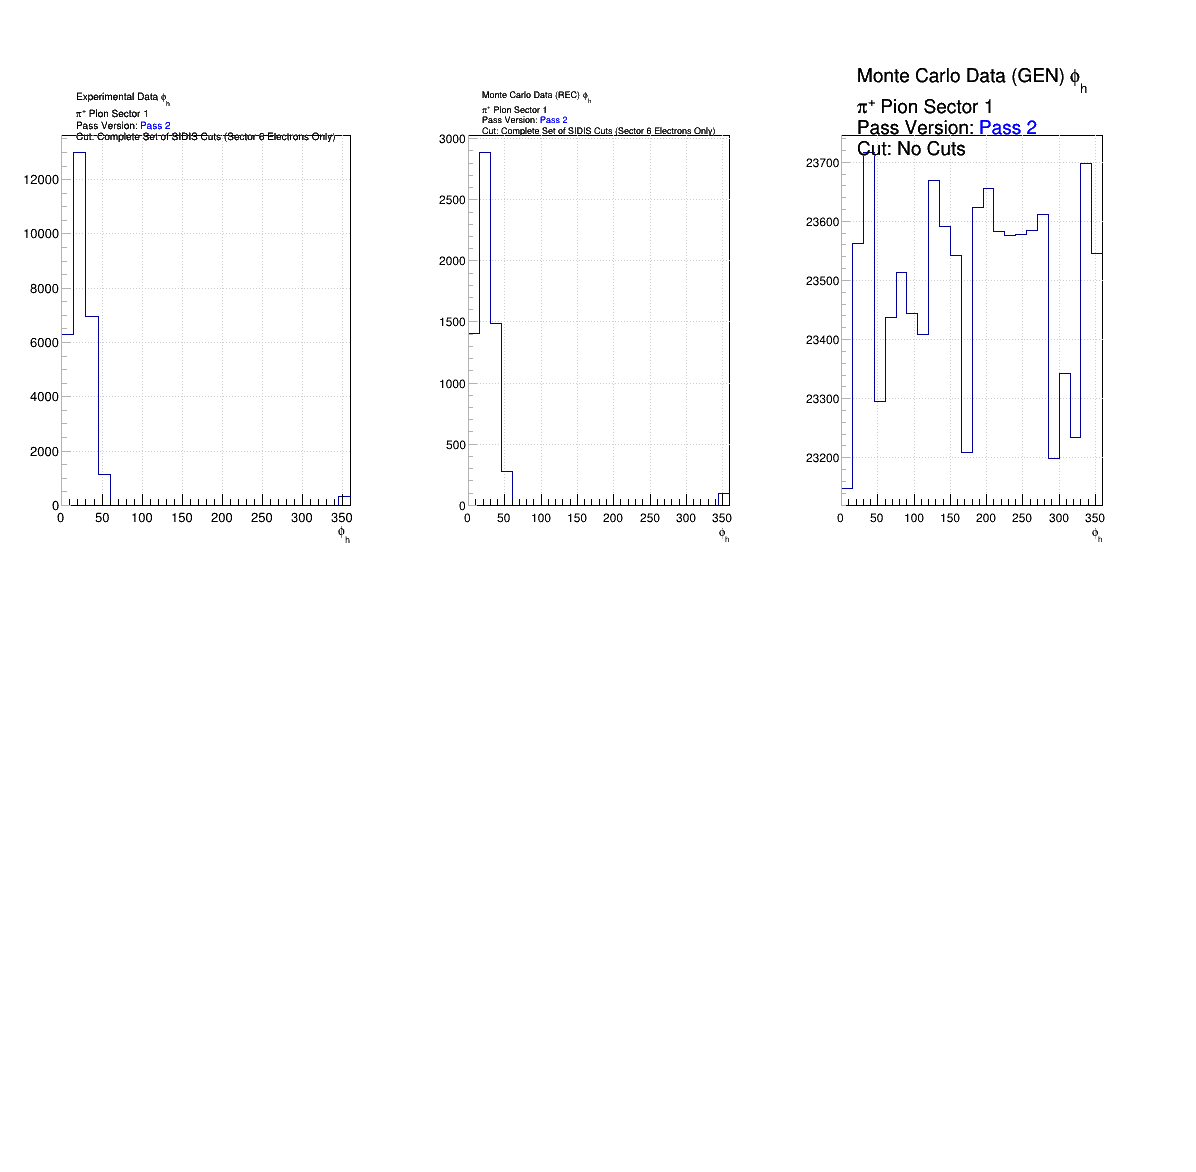

In [9]:
cut = "cut_Complete_SIDIS_eS6o"
# cut = "cut_Complete_SIDIS"

Q2_y_Bin = "All"
Q2_y_Bin = "1"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='pipsec'-[NumBins=8, MinBin=-0.5, MaxBin=7.5]), (Var-D2='phi_t'-[NumBins=24, MinBin=0, MaxBin=360]))"
# Histo_Name_mdf = str(Histo_Name_mdf.replace("mdf", "mdf")).replace("cut_Complete_SIDIS", "no_cut")
Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
# Histo_Name_rdf = str(Histo_Name_rdf.replace(f"{cut}", "cut_Complete_SIDIS"))
Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")
Histo_Name_gdf = str(Histo_Name_gdf.replace("mdf", "gdf")).replace("cut_Complete_SIDIS",      "no_cut")

Histo_mdf_3D   = mdf.Get(str(Histo_Name_mdf))
Histo_rdf_3D   = rdf.Get(str(Histo_Name_rdf))
Histo_gdf_3D   = gdf.Get(str(Histo_Name_gdf))


Histo_mdf_Title = str(Histo_mdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_rdf_Title = str(Histo_rdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")
Histo_gdf_Title = str(Histo_gdf_3D.GetTitle()).replace("#pi^{+} Sector vs. ", "")

# Histo_mdf_Title = Histo_mdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))
# Histo_rdf_Title = Histo_rdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))
# Histo_gdf_Title = Histo_gdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_y_Bin)]) if(Q2_y_Bin not in ["All"]) else "",  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}" if(Q2_y_Bin not in ["All"]) else "}"]))

Q2_xB_Bin_Unfold = 0#Q2_y_Bin
z_pT_Bin_Unfold = 0
Particle_Sector = "#pi^{+} Pion Sector"
Sector = 1
New_Bin_Title = "".join(["".join(["}{#splitline{Q^{2}-y Bin: ", str(Q2_xB_Bin_Unfold), "".join([" #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold)]) if(z_pT_Bin_Unfold not in [0]) else "", f" #topbar {Particle_Sector} {Sector}"]) if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "".join(["}{#splitline{", Particle_Sector, " ", str(Sector)]),  "}{Pass Version: #color[", str(root_color.Blue), "]{", str(Standard_Histogram_Title_Addition), "}}"])# if(str(Q2_xB_Bin_Unfold) not in ["All", "0", 0]) else "}"])
Histo_mdf_Title = Histo_mdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_rdf_Title = Histo_rdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
Histo_gdf_Title = Histo_gdf_Title.replace("".join(["}{Q^{2}-y Bin: ", str(Q2_y_Bin)]), New_Bin_Title)
print(f"Histo_gdf_Title = {Histo_gdf_Title}")
print(f"Standard_Histogram_Title_Addition = {Standard_Histogram_Title_Addition}")


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

if(Sector in [0, "All"]):    
    Histo_mdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_rdf_3D.GetYaxis().SetRangeUser(0, 7)
    Histo_gdf_3D.GetYaxis().SetRangeUser(0, 7)
else:
    Histo_mdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_rdf_3D.GetYaxis().SetRangeUser(Sector, Sector)
    Histo_gdf_3D.GetYaxis().SetRangeUser(Sector, Sector)

# Histo_mdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_rdf_3D.GetZaxis().SetRangeUser(300, 400)
# Histo_gdf_3D.GetZaxis().SetRangeUser(300, 400)

Histo_mdf_2D  = Histo_mdf_3D.Project3D("z")
Histo_rdf_2D  = Histo_rdf_3D.Project3D("z")
Histo_gdf_2D  = Histo_gdf_3D.Project3D("z")

Histo_mdf_2D.SetTitle(Histo_mdf_Title)
Histo_rdf_2D.SetTitle(Histo_rdf_Title)
Histo_gdf_2D.SetTitle(Histo_gdf_Title)

# Histo_mdf_2D.RebinX(2)
# Histo_rdf_2D.RebinX(2)
# Histo_gdf_2D.RebinX(2)
# Histo_mdf_2D.RebinY(2)
# Histo_rdf_2D.RebinY(2)
# Histo_gdf_2D.RebinY(2)

# Histo_mdf_2D.RebinX(5)
# Histo_rdf_2D.RebinX(5)
# Histo_gdf_2D.RebinX(5)
# Histo_mdf_2D.RebinY(5)
# Histo_rdf_2D.RebinY(5)
# Histo_gdf_2D.RebinY(5)


# Histo_mdf_2D.RebinX(10)
# Histo_rdf_2D.RebinX(10)
# Histo_gdf_2D.RebinX(10)
# Histo_mdf_2D.RebinY(10)
# Histo_rdf_2D.RebinY(10)
# Histo_gdf_2D.RebinY(10)


# Histo_mdf_Total = Histo_mdf_2D.GetEntries()
# Histo_rdf_Total = Histo_rdf_2D.GetEntries()
# Histo_gdf_Total = Histo_gdf_2D.GetEntries()


# Histo_mdf_2D.Scale(1/Histo_mdf_Total)
# Histo_rdf_2D.Scale(1/Histo_rdf_Total)
# Histo_gdf_2D.Scale(1/Histo_gdf_Total)


# Histo_ratio_2D = Histo_rdf_2D.Clone("Histo_ratio_2D")

# for x_bin in range(0,      Histo_ratio_2D.GetNbinsX() + 1):
#     for y_bin in range(0,  Histo_ratio_2D.GetNbinsY() + 1):
#         Histo_rdf_value  = Histo_rdf_2D.GetBinContent(x_bin, y_bin)
#         Histo_mdf_value  = Histo_mdf_2D.GetBinContent(x_bin, y_bin)
# #         Histo_rdf_value  = round(Histo_rdf_value, 6)
# #         Histo_mdf_value  = round(Histo_mdf_value, 6)
#         if(Histo_rdf_value == 0):
#             percent_diff = 100 if(Histo_mdf_value != 0) else 0
#             # if(percent_diff == 100):
#             #     print(f"{color.Error}Empty rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
#         else:
#             percent_diff = (abs(Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
# #             percent_diff = ((Histo_rdf_value - Histo_mdf_value)/Histo_rdf_value)*100
# #             percent_diff = ((Histo_mdf_value - Histo_rdf_value)/Histo_rdf_value)*100
# #         if(percent_diff > 200):
# #             percent_diff = 500
# #         elif(percent_diff < 80):
# #             percent_diff = 0
# #         if(percent_diff < 80 and percent_diff > 20):
# #             percent_diff = 20
# #         if(percent_diff < 20):
# #             percent_diff = 0
# #         if(percent_diff > 1000):
# #             print(f"{color.Error}Large err rdf with Histo_mdf_value*Histo_mdf_Total = {color.END_B}{Histo_mdf_value*Histo_mdf_Total}{color.END}")
# #         if(percent_diff >= 100):
# #             percent_diff =  200
# #         if(percent_diff < -100):
# #             percent_diff = -200
# #         if(percent_diff > 90):
# #             percent_diff = 200
# #         if(percent_diff < 0):
# #             percent_diff = 0
#         Histo_ratio_2D.SetBinContent(x_bin, y_bin, percent_diff)

# # Histo_ratio_2D.Add(Histo_mdf_2D, -1)
# # Histo_ratio_2D.Divide(Histo_rdf_2D)

# Histo_ratio_2D.SetTitle("#splitline{#scale[2]{Normalized % Dif between Data and MC}}{#scale[1.75]{(Data - MC)/Data}}")
# Histo_ratio_2D.GetZaxis().SetTitle("% Dif")

canvas = Canvas_Create(Name="Name", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# ROOT.gPad.SetLogz(1)
canvas.Draw()

# canvas.cd(1)
Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_rdf_2D.Draw("colz")
# canvas.cd(2)
Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_mdf_2D.Draw("colz")
# canvas.cd(3)
Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [6]:
# def print_max_bin_coordinates(histogram):
#     max_content = float('-inf')
#     max_x, max_y = 0, 0
#     # Loop over all bins in the histogram (excluding underflow/overflow)
#     for ix in range(1, histogram.GetNbinsX() + 1):
#         for iy in range(1, histogram.GetNbinsY() + 1):
#             content = histogram.GetBinContent(ix, iy)
#             if(content > max_content):
#                 max_content = content
#                 max_x = histogram.GetXaxis().GetBinCenter(ix)
#                 max_y = histogram.GetYaxis().GetBinCenter(iy)

#     print(f"Maximum bin content is {max_content} at x = {max_x}, y = {max_y}")
#     print(f"{max_x}, {max_y}")
# #     print(f"Largest bin content is at x = {x_center}, y = {y_center}")
#     return [max_x, max_y]
# #     return [max_content, max_x, max_y]


In [7]:
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = False
#             if(sector == 1 or True):
#                 Cut_Condition = (y < (-0.4803)*x + (19.0945)) or (y > (0.5236)*x + (-27.0866))
#                 Cut_Condition = not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector == 2):
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.8333)*x + (-877.5))
# #                 Cut_Condition = (y < (0.6749)*x + (17.7778)) or (y > (33.832)*x + (-877.4638))
                
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.6749)*x + (17.7778)) or (y > (49.0)*x + (-1287.0))) and (x > 0 and y > 0))
#             if(sector == 3):
#                 Cut_Condition = (y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6471)*x + (28.8224)) or (y > (-19.0)*x + (-430.0))
#                 Cut_Condition = (y < (-0.6442)*x + (29.6081)) or (y > (-19.0013)*x + (-430.0535))
                
#                 Cut_Condition = not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#                 # Cut_Condition = Cut_Condition or (((y < (-0.6327)*x + (29.1837)) or (y > (-19.0)*x + (-430.0))) and (x < 0 and y > 0))
#             if(sector == 4):
#                 Cut_Condition = (y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))
                
#                 Cut_Condition = not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 # Cut_Condition = Cut_Condition or (((y < (0.4717)*x + (16.5094)) or (y > (-0.4717)*x + (-16.5094))) and (x < 0))
#             if(sector == 5):
#                 Cut_Condition = (y > (0.6878)*x + (-21.1814)) or (y < (10.8519)*x + (212.5926))
#                 Cut_Condition = (y > (0.6907)*x + (-20.4237)) or (y < (11.2692)*x + (233.4615))
#                 Cut_Condition = (y > (0.6864)*x + (-21.5254)) or (y < (11.2308)*x + (231.5385))
#                 Cut_Condition = (y > (0.6809)*x + (-22.9787)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6692)*x + (-26.0021)) or (y < (11.6)*x + (250.0))
#                 Cut_Condition = (y > (0.6689)*x + (-26.0758)) or (y < (11.6194)*x + (250.9717))
#                 Cut_Condition = (y > 0) or (y < (12.6543)*x + (302.716))
#                 Cut_Condition = (y > (0.669)*x + (-26.0705)) or (y < (12.6372)*x + (301.8584))
                
#                 Cut_Condition = not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#             if(sector == 6):
#                 Cut_Condition = (y > (-0.6102)*x + (-27.2362)) or (y < (-17.2353)*x + (238.7647))
#                 Cut_Condition = (y > (-0.6063)*x + (-28.2992)) or (y < (-17.1765)*x + (236.8235))
#                 Cut_Condition = (y > (-0.6047)*x + (-28.7194)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-18.1875)*x + (270.1875))
#                 Cut_Condition = (y > (-0.5908)*x + (-32.4752)) or (y < (-21.0)*x + (363.0))
#                 Cut_Condition = (y > (-0.5909)*x + (-32.4477)) or (y < (-21.0059)*x + (363.1938))
                
#                 Cut_Condition = not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
                
# #             Cut_Condition = Cut_Condition or (histogram.GetBinContent(binx, biny) < 800)

#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2)            
#             # Check if the bin center is outside the circle
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram

In [8]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#             if(sector in [2, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
#                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius = 0, 0, 325

# # center_x, center_y, radius = 0, 0, 150

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = ["All"]
# SECTOR_List = [3]
# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()


In [3]:
# import ROOT
# ROOT.gStyle.SetOptStat("i")
# def apply_circular_cut(histogram, center_x, center_y, radius, radius_inner=False, sector=1):
#     """Apply a circular cut and zero out bins outside the circle."""
#     for binx in range(1, histogram.GetNbinsX() + 1):
#         for biny in range(1, histogram.GetNbinsY() + 1):
#             x = histogram.GetXaxis().GetBinCenter(binx)
#             y = histogram.GetYaxis().GetBinCenter(biny)
#             Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2) and (sector in [1, 2, 3, 4, 5, 6, 0, "All"])
#             if(sector in [1, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y > (-0.4803)*x + (19.0945)) and (y < (0.5236)*x + (-27.0866)))
#                 Cut_Condition = Cut_Condition and not ((y > (-0.5)*x + (25.0)) and (y < (0.5241)*x + (-27.2289)))
#             if(sector in [2, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y > (0.6749)*x + (17.7778)) and (y < (33.832)*x + (-877.4638)))
# #                 Cut_Condition = Cut_Condition and not ((y > (0.6513)*x + (24.1597)) and (y < (77.2358)*x + (-2426.5447)))
#                 Cut_Condition = Cut_Condition and not ((y > (0.6439)*x + (26.145)) and (y < (76.7615)*x + (-2409.6186)))
#             if(sector in [3, 0, "All"]):
# #             if(sector in [3]):
#                 # Cut_Condition = Cut_Condition and not ((y > (-0.6442)*x + (29.6081)) and (y < (-19.0013)*x + (-430.0535)))
# #                 Cut_Condition = Cut_Condition and not ((y > (-0.6306)*x + (33.3576)) and (y < (-23.3244)*x + (-602.9766)))
#                 Cut_Condition = Cut_Condition and not ((y > (-0.6292)*x + (33.7585)) and (y < (-23.2943)*x + (-601.7726)))
#             if(sector in [4, 0, "All"]):
# #             if(sector in [4]):
# #                 Cut_Condition = Cut_Condition and not ((y > (0.4717)*x + (16.5094)) and (y < (-0.4717)*x + (-16.5094)))
#                 Cut_Condition = Cut_Condition and not ((y > (0.5)*x + (25.0)) and (y < (-0.5)*x + (-25.0)))
# #             if(sector in [5]):
#             if(sector in [5, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y < (0.669)*x + (-26.0705)) and (y > (12.6372)*x + (301.8584)))
#                 Cut_Condition = Cut_Condition and not ((y < (0.6494)*x + (-31.1688)) and (y > (13.3333)*x + (336.6667)))
# #             if(sector in [6]):
#             if(sector in [6, 0, "All"]):
# #                 Cut_Condition = Cut_Condition and not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x + (363.1938)))
#                 Cut_Condition = Cut_Condition and not ((y < (-0.5796)*x + (-35.5102)) and (y > (-35.0)*x + (825.0)))
#             Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 > radius**2) # Check if the bin center is outside the circle
#             if(radius_inner):
#                 Cut_Condition = Cut_Condition or ((x - center_x)**2 + (y - center_y)**2 < radius_inner**2)
#             # Cut_Condition = Cut_Condition and not (histogram.GetBinContent(binx, biny) > 800)
#             if(Cut_Condition):
#                 histogram.SetBinContent(binx, biny, 0)  # Set bin content to zero
#     return histogram



# # Define the center and radius of the circle for the cut
# center_x, center_y, radius, radius_inner = 0, 0, 310, 75
# center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# # center_x, center_y, radius = 0, 0, 79
# # center_x, center_y, radius = 0, 0, 250

# SECTOR_List = [1, 2, 3, 4, 5, 6]
# SECTOR_List = [1, 2, 3, 4, 5, 6, "All"]
# # SECTOR_List = ["All"]
# # SECTOR_List = [1]
# canvas, h1, h2, lines, line_Max, circle = {}, {}, {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(46, -3, 300,  130), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(51, -0.5, 300, -125), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(51, -0.5, 300,  130), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 270,   200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine( 27, 36, 35.69, 330), ROOT.kRed])
        
# #         lines[SECTOR].append([ROOT.TLine(32, 45, 270,   200), ROOT.kViolet])
# #         lines[SECTOR].append([ROOT.TLine(32, 45, 35.69, 330), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(32, 46.75, 270,   200), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(32, 46.75, 35.69, 330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
#         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -275, 206.776), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-25.04, 45.74, -40,  330), ROOT.kRed])
        
# #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -275, 206.776))
# #         lines[SECTOR].append(ROOT.TLine(-28.04, 51.04, -40,  330))
#         lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -275, 206.776), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-28.04, 51.4, -40,  330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300, -125), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-35, 0, -300,  125), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(-50, 0, -300, -125), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-50, 0, -300,  125), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
#         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -260, -200), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(-27.4, -44.4, -50,  -330), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(-29, -50, -260, -200), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(-29, -50, -50,  -330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 270, -192), ROOT.kRed])
#         lines[SECTOR].append([ROOT.TLine(19.38, -43.9, 33,  -330), ROOT.kRed])
        
#         lines[SECTOR].append([ROOT.TLine(25, -50, 270, -192), ROOT.kViolet])
#         lines[SECTOR].append([ROOT.TLine(25, -50, 33,  -330), ROOT.kViolet])
#         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)

#     if(SECTOR in [0, "All"]):
#         h1[SECTOR].GetXaxis().SetRangeUser(-400, 400)
#         h1[SECTOR].GetYaxis().SetRangeUser(-400, 400)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, radius_inner, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
#     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max[SECTOR] = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max[SECTOR].SetLineColor(ROOT.kGreen)
#     line_Max[SECTOR].SetLineWidth(2)
# #     line_Max[SECTOR].Draw("same")
    


# #     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[f"{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[f"{SECTOR}_{CD_NUM}"].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[f"{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[f"{SECTOR}_{CD_NUM}"].SetLineWidth(2)  # Set the line width
#         circle[f"{SECTOR}_{CD_NUM}"].Draw("SAME")  # Draw the circle on the same canvas as the histogram
        
#         circle[f"Inner_{SECTOR}_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillStyle(3644)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetFillColor(ROOT.kViolet)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineColor(ROOT.kViolet)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].SetLineWidth(1)
#         circle[f"Inner_{SECTOR}_{CD_NUM}"].Draw("SAME")
        
#         for ii, line in enumerate(lines[SECTOR]):
#             # line.SetLineColor(ROOT.kRed)
#             # line.SetLineWidth(1)
#             # line.Draw("same")  # Draw line on the same canvas as the histogram
#             line[0].SetLineColor(line[1])
#             line[0].SetLineWidth(1)
#             line[0].Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line[0].GetX1(), line[0].GetY1(), line[0].GetX2(), line[0].GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             # if(CD_NUM in [1]):
#             if((CD_NUM in [1]) and (len(SECTOR_List) in [1]) and (line[1] in [ROOT.kViolet])):
#                 sign = ("\n                Cut_Condition = Cut_Condition and not ((y >" if(ii%2 == 0) else "and (y <") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = Cut_Condition and not ((y <" if(ii%2 == 0) else "and (y >")
#                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()
    
# print(")")


In [10]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):

# canvas, h1, h2, lines = {}, {}, {}, {}
# for SECTOR in SECTOR_List:
#     h1[SECTOR] = Histo_ratio_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR] = Histo_rdf_2D.Clone(f"h1_{SECTOR}")
# #     h1[SECTOR].Scale(Histo_rdf_Total)

#     # h1[SECTOR] = Histo_mdf_2D.Clone(f"h1_{SECTOR}")
#     # h1[SECTOR].Scale(Histo_mdf_Total)
#     lines[SECTOR] = []
#     if(SECTOR in [1, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300, -125))
#         lines[SECTOR].append(ROOT.TLine(46, -3, 300,  130))
# #         h1[SECTOR].GetXaxis().SetRangeUser(25, 400)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [2, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 270,   200))
#         lines[SECTOR].append(ROOT.TLine( 27, 36, 35.69, 330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0, 400)
#     if(SECTOR in [3, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -275, 206.776))
#         lines[SECTOR].append(ROOT.TLine(-25.04, 45.74, -40,  330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(0,  400)
#     if(SECTOR in [4, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300, -125))
#         lines[SECTOR].append(ROOT.TLine(-35, 0, -300,  125))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-400, -25)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 150)
#     if(SECTOR in [5, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -260, -200))
#         lines[SECTOR].append(ROOT.TLine(-27.4, -44.4, -50,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(-300, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)
#     if(SECTOR in [6, 0, "All"]):
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 270, -192))
#         lines[SECTOR].append(ROOT.TLine(19.38, -43.9, 33,  -330))
# #         h1[SECTOR].GetXaxis().SetRangeUser(0, 300)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-400, 0)
# #         h1[SECTOR].GetYaxis().SetRangeUser(-150, 0)



#     h1[SECTOR].SetTitle("".join(["#splitline{Sector ", str(SECTOR), "}{", str(h1[SECTOR].GetTitle()), "}"]))
#     h2[SECTOR] = h1[SECTOR].Clone(f"h2_{SECTOR}")

#     print(f"\nRUNNING FOR SECTOR {SECTOR}")
#     print("\tBefore:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])

#     # h2.GetXaxis().SetRangeUser(-300, 0)
#     # h2.GetYaxis().SetRangeUser(0,  400)
#     # Apply the cut
#     h2[SECTOR] = apply_circular_cut(h2[SECTOR], center_x, center_y, radius, sector=SECTOR)

#     # h2 = Histo_ratio_2D

#     # Draw the histogram
#     # canvas = ROOT.TCanvas("c1", "Canvas", 800, 600)
#     canvas[SECTOR] = Canvas_Create(Name=f"Name_{SECTOR}", Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h1[SECTOR].Draw("colz")
#     h1[SECTOR]
# #     ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas[SECTOR], cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2[SECTOR].Draw("COLZ")
#     # h2[SECTOR].RebinX(20)
#     # h2[SECTOR].RebinY(20)
# #     ROOT.gPad.SetLogz(1)
    
#     print("\tAfter:")
#     max_x, max_y = print_max_bin_coordinates(h2[SECTOR])
#     line_Max = ROOT.TLine(0, 0, max_x, max_y)
#     line_Max.SetLineColor(ROOT.kGreen)
#     line_Max.SetLineWidth(2)
#     line_Max.Draw("same")
    


#     circle, functions_intercept = {}, {}
#     for CD_NUM in [1, 2]:
#         Draw_Canvas(canvas=canvas[SECTOR], cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         # Set line attributes
#         # Draw a circle centered at ('center_x', 'center_y') with a radius of 'radius'
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)  # Set the fill style to 0 (hollow)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)  # Set the line color to red
#         circle[CD_NUM].SetLineWidth(2)  # Set the line width
#         circle[CD_NUM].Draw("SAME")  # Draw the circle on the same canvas as the histogram
#         for ii, line in enumerate(lines[SECTOR]):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")  # Draw line on the same canvas as the histogram
#             x1, y1, x2, y2 = line.GetX1(), line.GetY1(), line.GetX2(), line.GetY2()
#             # Calculate slope (m) and intercept (c) of the line
#             slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else "undefined"
#             intercept = y1 - slope * x1 if slope != "undefined" else "undefined"
#             if(CD_NUM in [1]):
#                 sign = ("\n                Cut_Condition = (y <" if(ii < 1) else "or (y >") if(SECTOR not in [5, 6]) else ("\n                Cut_Condition = (y >" if(ii < 1) else "or (y <")
# #                 print(f"{sign} ({round(slope, 4)})*x + ({round(intercept, 4)}))")
# #             functions_intercept[f"A_{CD_NUM}"] = slope
# #             functions_intercept[f"B_{CD_NUM}"] = intercept

# #     if(functions_intercept["A_1"] != functions_intercept["A_2"]):
# #         x_intercept = (functions_intercept["B_2"] - functions_intercept["B_1"])/(functions_intercept["A_1"] - functions_intercept["A_2"])
# #     else:
# #         x_intercept = 0
# #     y_intercept = functions_intercept["A_1"]*x_intercept + functions_intercept["B_1"]
# #     print(f"Lines to intersect at (x, y) = {x_intercept}, {y_intercept}")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas[SECTOR].Update()
#     canvas[SECTOR].Draw()





average_h1 = 17.16195
average_h2 = 15.24895
ave_difference = 1.913%
Done


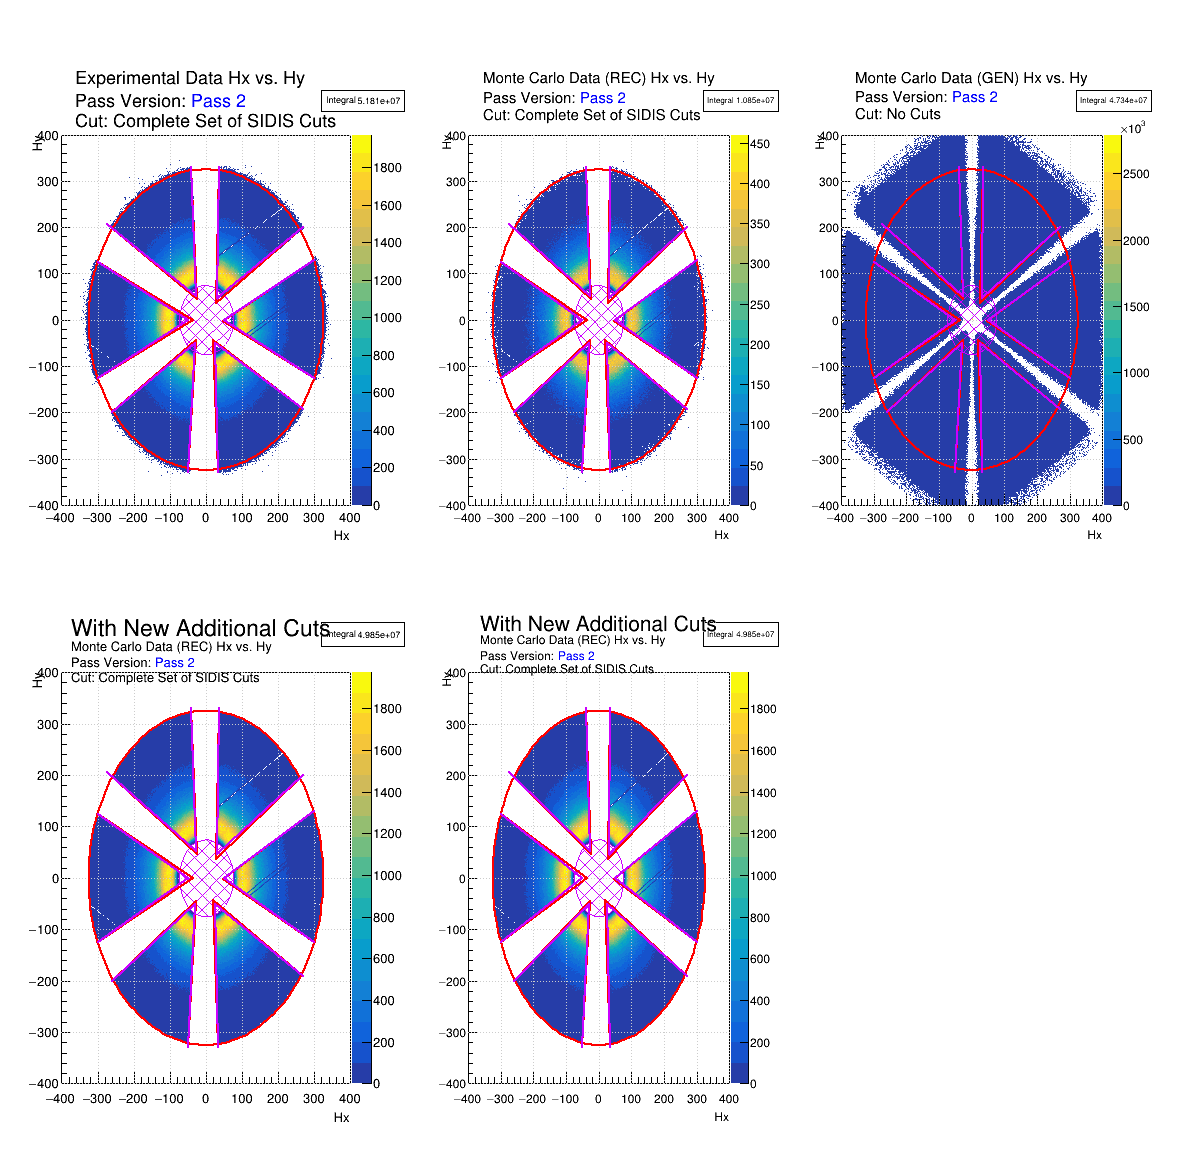

In [108]:
# def grab_histogram_average(histogram):
#     integral = histogram.Integral(1, histogram.GetNbinsX(), 1, histogram.GetNbinsY())
#     num_bins = histogram.GetNbinsX() * histogram.GetNbinsY()
#     average_content = integral / num_bins if num_bins != 0 else 0
#     return average_content

# h1 = Histo_ratio_2D.Clone("h1")
# lines = []
# # lines.append(ROOT.TLine(46,     -3,     300,  -125))
# # lines.append(ROOT.TLine(46,     -3,     300,   130))
# # lines.append(ROOT.TLine(27,     36,     270,   200))
# # lines.append(ROOT.TLine(27,     36,     35.69, 330))
# # lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
# # lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
# # lines.append(ROOT.TLine(-35,     0,    -300,  -125))
# # lines.append(ROOT.TLine(-35,     0,    -300,   125))
# # lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
# # lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
# # lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
# # lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

# lines = []
# # if(SECTOR in [1, 0, "All"]):
# lines.append([ROOT.TLine( 46,   -3,       300, -125),     ROOT.kRed])
# lines.append([ROOT.TLine( 46,   -3,       300,  130),     ROOT.kRed])
# lines.append([ROOT.TLine( 51,   -0.5,     300, -125),     ROOT.kViolet])
# lines.append([ROOT.TLine( 51,   -0.5,     300,  130),     ROOT.kViolet])
# # if(SECTOR in [2, 0, "All"]):
# lines.append([ROOT.TLine( 27,    36,      270,  200),     ROOT.kRed])
# lines.append([ROOT.TLine( 27,    36,    35.69,  330),     ROOT.kRed])
# lines.append([ROOT.TLine( 32,    46.75,   270,  200),     ROOT.kViolet])
# lines.append([ROOT.TLine( 32,    46.75, 35.69,  330),     ROOT.kViolet])
# # if(SECTOR in [3, 0, "All"]):
# lines.append([ROOT.TLine(-25.04, 45.74,  -275,  206.776), ROOT.kRed])
# lines.append([ROOT.TLine(-25.04, 45.74,   -40,  330),     ROOT.kRed])
# lines.append([ROOT.TLine(-28.04, 51.4,   -275,  206.776), ROOT.kViolet])
# lines.append([ROOT.TLine(-28.04, 51.4,    -40,  330),     ROOT.kViolet])
# # if(SECTOR in [4, 0, "All"]):
# lines.append([ROOT.TLine(-35,        0,  -300, -125),     ROOT.kRed])
# lines.append([ROOT.TLine(-35,        0,  -300,  125),     ROOT.kRed])
# lines.append([ROOT.TLine(-50,        0,  -300, -125),     ROOT.kViolet])
# lines.append([ROOT.TLine(-50,        0,  -300,  125),     ROOT.kViolet])
# # if(SECTOR in [5, 0, "All"]):
# lines.append([ROOT.TLine(-27.4,  -44.4,  -260, -200),     ROOT.kRed])
# lines.append([ROOT.TLine(-27.4,  -44.4,   -50, -330),     ROOT.kRed])
# lines.append([ROOT.TLine(-29,    -50,    -260, -200),     ROOT.kViolet])
# lines.append([ROOT.TLine(-29,    -50,     -50, -330),     ROOT.kViolet])
# # if(SECTOR in [6, 0, "All"]):
# lines.append([ROOT.TLine( 19.38, -43.9, 270, -192),       ROOT.kRed])
# lines.append([ROOT.TLine( 19.38, -43.9, 33,  -330),       ROOT.kRed])
# lines.append([ROOT.TLine( 25,    -50, 270, -192),         ROOT.kViolet])
# lines.append([ROOT.TLine( 25,    -50, 33,  -330),         ROOT.kViolet])

# h2 = h1.Clone("h2")
# h2.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{", str(h1.GetTitle()), "}"]))
# h1.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{",  str(h1.GetTitle()), "}"]))

# # Histo_mdf_2D.Scale(Histo_mdf_Total)
# # Histo_rdf_2D.Scale(Histo_rdf_Total)
# # Histo_gdf_2D.Scale(Histo_gdf_Total)

# Histo_rdf_2D_Clone = Histo_rdf_2D.Clone(f"{Histo_rdf_2D.GetName()}_Clone")
# Histo_mdf_2D_Clone = Histo_mdf_2D.Clone(f"{Histo_mdf_2D.GetName()}_Clone")

# Histo_rdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_rdf_2D_Cut")
# Histo_rdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_mdf_2D_Cut = Histo_rdf_2D_Clone.Clone("Histo_mdf_2D_Cut")
# Histo_mdf_2D_Cut.SetTitle("".join(["#splitline{#scale[1.8]{With New Additional Cuts}}{",  str(Histo_mdf_2D_Clone.GetTitle()), "}"]))
# Histo_rdf_2D_Clone.SetTitle("".join(["#splitline{#scale[1.8]{Without Additional Cuts}}{", str(Histo_mdf_2D_Clone.GetTitle()), "}"]))


# center_x, center_y, radius, radius_inner = 0, 0, 325, 75
# # Apply the cut
# h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")
# Histo_rdf_2D_Cut = apply_circular_cut(Histo_rdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")
# Histo_mdf_2D_Cut = apply_circular_cut(Histo_mdf_2D_Cut, center_x, center_y, radius, radius_inner, sector="All")


# canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# # ROOT.gPad.SetLogz(1)
# canvas.Draw()

# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D_Cut.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D_Cut.Draw("colz")
# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # Histo_gdf_2D_Cut.Draw("colz")

# # Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # h1.Draw("colz")
# # ROOT.gPad.SetLogz(1)
# # print("\tBefore Cut:")
# # max_x, max_y = print_max_bin_coordinates(h1)
# # line_Max_1 = ROOT.TLine(0, 0, max_x, max_y)
# # line_Max_1.SetLineColor(ROOT.kGreen)
# # line_Max_1.SetLineWidth(2)
# # # line_Max_1.Draw("same")

# # Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # h2.Draw("colz")
# # ROOT.gPad.SetLogz(1)

# # print("\tAfter Cut:")
# # max_x, max_y = print_max_bin_coordinates(h2)
# # line_Max_2 = ROOT.TLine(0, 0, max_x, max_y)
# # line_Max_2.SetLineColor(ROOT.kGreen)
# # line_Max_2.SetLineWidth(2)
# # # line_Max_2.Draw("same")


# average_h1 = grab_histogram_average(h1)
# average_h2 = grab_histogram_average(h2)

# print("\n\n")
# print(f"{color.BOLD}average_h1 = {color.END}{round(average_h1, 5)}")
# print(f"{color.BOLD}average_h2 = {color.END}{round(average_h2, 5)}")
# ave_difference = (average_h1 - average_h2)#/average_h1)*100
# print(f"{color.BOLD}ave_difference = {color.END}{round(ave_difference, 5)}%")

# circle = {}
# for CD_NUM in [1, 2, 3, 4, 5]:
#     Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#     circle[CD_NUM].SetFillStyle(0)
#     circle[CD_NUM].SetLineColor(ROOT.kRed)
#     circle[CD_NUM].SetLineWidth(2)
#     circle[CD_NUM].Draw("SAME")
#     circle[f"Inner_{CD_NUM}"] = ROOT.TEllipse(center_x, center_y, radius_inner)
#     circle[f"Inner_{CD_NUM}"].SetFillStyle(3644)
#     circle[f"Inner_{CD_NUM}"].SetFillColor(ROOT.kViolet)
#     circle[f"Inner_{CD_NUM}"].SetLineColor(ROOT.kViolet)
#     circle[f"Inner_{CD_NUM}"].SetLineWidth(1)
#     circle[f"Inner_{CD_NUM}"].Draw("SAME")
#     for ii, line in enumerate(lines):
#         line[0].SetLineColor(line[1])
#         line[0].SetLineWidth(2)
#         line[0].Draw("same")

# # Update the canvas to see the result
# ROOT.gStyle.SetOptStat("i")
# canvas.Update()
# canvas.Draw()

# print("Done")

In [12]:
# def Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D):
#     h1 = Histo_ratio_2D.Clone("h1")
#     lines = []
#     lines.append(ROOT.TLine(46,     -3,     300,  -125))
#     lines.append(ROOT.TLine(46,     -3,     300,   130))
#     lines.append(ROOT.TLine(27,     36,     270,   200))
#     lines.append(ROOT.TLine(27,     36,     35.69, 330))
#     lines.append(ROOT.TLine(-25.04, 45.74, -275,   206.776))
#     lines.append(ROOT.TLine(-25.04, 45.74, -40,    330))
#     lines.append(ROOT.TLine(-35,     0,    -300,  -125))
#     lines.append(ROOT.TLine(-35,     0,    -300,   125))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -260,  -200))
#     lines.append(ROOT.TLine(-27.4, -44.4,  -50,   -330))
#     lines.append(ROOT.TLine(19.38, -43.9,   270,  -192))
#     lines.append(ROOT.TLine(19.38, -43.9,   33,   -330))

#     h2 = h1.Clone("h2")
#     h2.SetTitle("".join(["#splitline{With New Additional Cuts}{", str(h1.GetTitle()), "}"]))
    
#     print("\tBefore Cut:")
#     max_x, max_y = print_max_bin_coordinates(h2)

#     center_x, center_y, radius = 0, 0, 325
#     # Apply the cut
#     h2 = apply_circular_cut(h2, center_x, center_y, radius, sector="All")

#     canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
#     # ROOT.gPad.SetLogz(1)
#     canvas.Draw()
    
#     Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_rdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_mdf_2D.Draw("colz")
#     Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_gdf_2D.Draw("colz")
    
#     Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     Histo_ratio_2D.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
#     Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#     h2.Draw("colz")
#     # ROOT.gPad.SetLogz(1)
    
#     print("\tAfter Cut:")
# #     max_x, max_y = print_max_bin_coordinates(h2)
# #     line_Max = ROOT.TLine(0, 0, max_x, max_y)
# #     line_Max.SetLineColor(ROOT.kGreen)
# #     line_Max.SetLineWidth(2)
# #     line_Max.Draw("same")
    
#     circle = {}
#     for CD_NUM in [1, 2, 3, 4, 5]:
#         Draw_Canvas(canvas=canvas, cd_num=CD_NUM, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
#         circle[CD_NUM] = ROOT.TEllipse(center_x, center_y, radius)
#         circle[CD_NUM].SetFillStyle(0)
#         circle[CD_NUM].SetLineColor(ROOT.kRed)
#         circle[CD_NUM].SetLineWidth(2)
#         circle[CD_NUM].Draw("SAME")
#         for ii, line in enumerate(lines):
#             line.SetLineColor(ROOT.kRed)
#             line.SetLineWidth(2)
#             line.Draw("same")
    
#     # Update the canvas to see the result
#     ROOT.gStyle.SetOptStat("i")
#     canvas.Update()
#     canvas.Draw()
# #     return canvas

    
# # new_canvas = 
# Draw_With_Cuts(Histo_rdf_2D, Histo_mdf_2D, Histo_gdf_2D, Histo_ratio_2D)

# # new_canvas.Draw()

# print("Done")

Done
Histo_mdf_Total = 10849980.0
Histo_rdf_Total = 51812108.0
Histo_gdf_Total = 47335551.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name_New


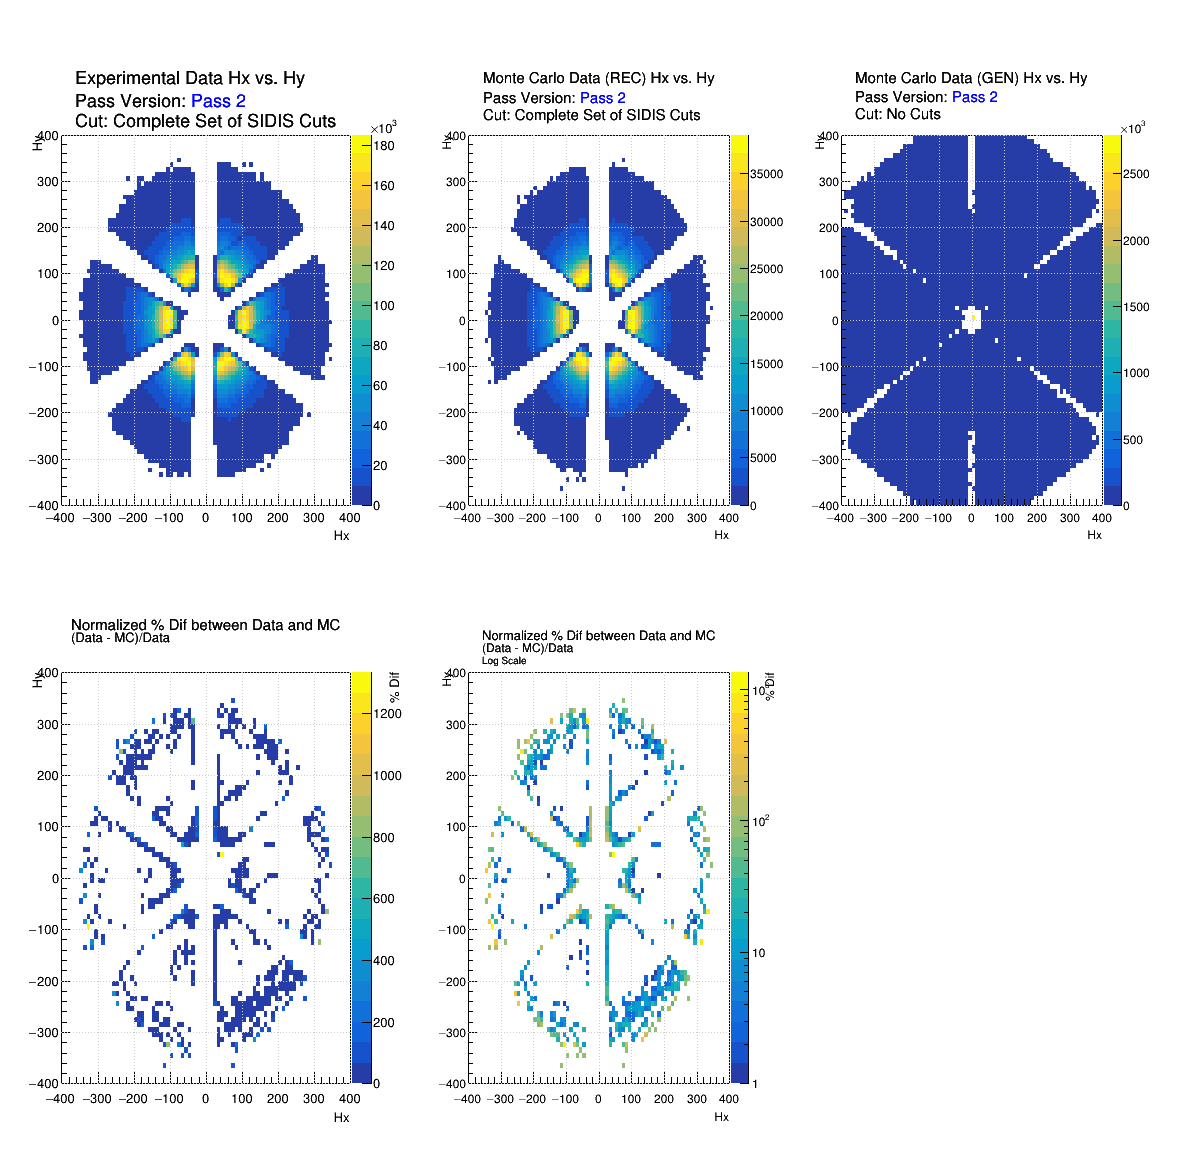

In [ ]:
# canvas = Canvas_Create(Name="Name_New", Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# # ROOT.gPad.SetLogz(1)
# canvas.Draw()

# Draw_Canvas(canvas=canvas, cd_num=1, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_rdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=2, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas, cd_num=3, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_gdf_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=4, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D.Draw("colz")

# Draw_Canvas(canvas=canvas, cd_num=5, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# Histo_ratio_2D_Log = Histo_ratio_2D.Clone("Logscale")
# Histo_ratio_2D_Log.SetTitle("".join(["#splitline{", str(Histo_ratio_2D.GetTitle()), "}{#scale[1.5]{Log Scale}}"]))
# Histo_ratio_2D_Log.Draw("colz")
# ROOT.gPad.SetLogz(1)

# # Draw_Canvas(canvas=canvas, cd_num=6, left_add=0.15, right_add=0.15, up_add=0.15, down_add=0.15)
# # # Histo_ratio_2D.GetXaxis().SetRangeUser(-400, 0)
# # # Histo_ratio_2D.GetYaxis().SetRangeUser(20, 400)
# # Histo_ratio_2D.Draw("lego")
# # # ROOT.gPad.SetLogz(1)
# print("Done")

# print(f"Histo_mdf_Total = {Histo_mdf_Total}")
# print(f"Histo_rdf_Total = {Histo_rdf_Total}")
# print(f"Histo_gdf_Total = {Histo_gdf_Total}")


In [14]:
# """
# Cut_Condition = ((x - center_x)**2 + (y - center_y)**2 < radius**2)
# and (not ((y > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938))))
# or              ((x - center_x)**2 + (y - center_y)**2 > radius**2)"""

# # test = """radius = ((x*x) + (y*y));
# test = """Cut_Condition = '(radius < (325*325))
# and (not ((y  > (-0.4803)*x +  (19.0945)) and (y <   (0.5236)*x +  (-27.0866))))
# and (not ((y  >  (0.6749)*x +  (17.7778)) and (y <   (33.832)*x + (-877.4638))))
# and (not ((y  > (-0.6442)*x +  (29.6081)) and (y < (-19.0013)*x + (-430.0535))))
# and (not ((y  >  (0.4717)*x +  (16.5094)) and (y <  (-0.4717)*x +  (-16.5094))))
# and (not ((y  <   (0.669)*x + (-26.0705)) and (y >  (12.6372)*x +  (301.8584))))
# and (not ((y  < (-0.5909)*x + (-32.4477)) and (y > (-21.0059)*x +  (363.1938)))))
# or (radius > (325*325))'"""

# test = str(test.replace("x", "Hx")).replace("y", "Hy")
# test = test.replace("and", "&&")
# test = test.replace("or",  "||")
# test = test.replace("not ", "!")
# test = test.replace("\n", " ")
# test = test.replace(";", ";\n\n")
# test = test.replace("radius", "((Hx*Hx) + (Hy*Hy))")
# while("  " in test):
#     test = test.replace("  ", " ")
# print(test)

## PID Plots

In [101]:
# Also defined in ExtraAnalysisCodeValues.py
def PID_Histo_Label(Histogram):
    # Define the mapping and the histogram setup in Python
    pid_map = {-2212: (1,  "Anti-Proton"),
                -321: (2,  "Kaon (K^{-})"),
                -211: (3,  "#pi^{-} Pion"),
                  11: (4,  "Electron"),
                   0: (5,  "Unidentified"),
                 -11: (6,  "Positron"),
                 -13: (7,  "#mu^{+} Muon"),
                 211: (8,  "#pi^{+} Pion"),
                 321: (9,  "Kaon (K^{+})"),
                2212: (10, "Proton")}
    for pid, (idx, name) in pid_map.items():
        Histogram.GetXaxis().SetBinLabel(idx, name)
        Histogram.GetYaxis().SetBinLabel(idx, name)
    Histogram.GetXaxis().SetBinLabel(11, "Other")
    Histogram.GetYaxis().SetBinLabel(11, "Other")
    Histogram.GetXaxis().SetLabelSize(0.0375)
    Histogram.GetYaxis().SetLabelSize(0.0375)
    
    return Histogram

print("Done")

Done



Miss_Electron = 0.0398517
UnId_Electron = 0.0216831

Miss_Pip_Pion = 0.7428475
UnId_Pip_Pion = 1.1259297


Total (Identified) Background   = 0.7826992
Total (Unidentified) Background = 1.1476129
Total Background                = 1.9303121


Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Name


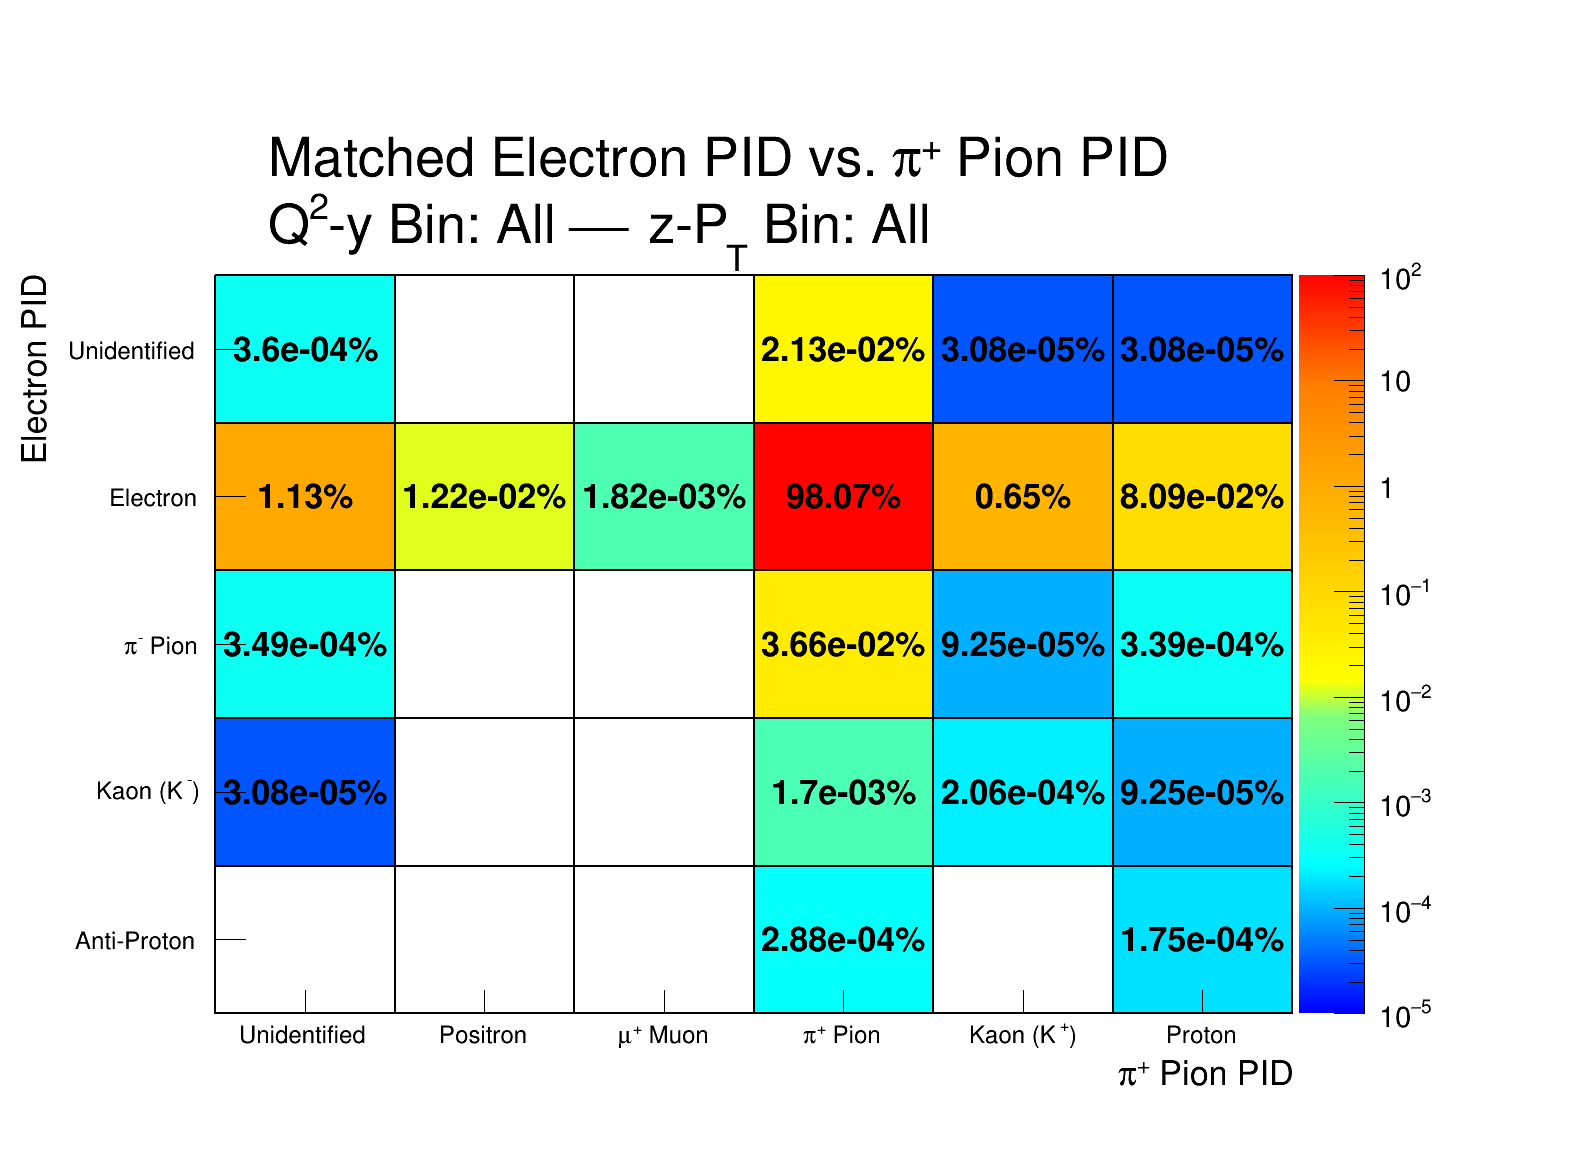

In [112]:
from array import array  # Correct import for the array
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"
# cut = "no_cut"

Q2_y_Bin = "All"
# Q2_y_Bin = "14"
Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='PID_el_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]), (Var-D2='PID_pip_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]))"
Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))
# Histo_Name_rdf = str(Histo_Name_mdf.replace("mdf", "rdf"))
# Histo_Name_gdf = str(Histo_Name_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")

# Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
# Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))
# # Histo_Name_Q2_y_rdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "rdf"))
# # Histo_Name_Q2_y_gdf = str(Histo_Name_Q2_y_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")

# Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
# Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))
# # Histo_Name_z_pT_rdf = str(Histo_Name_z_pT_mdf.replace("mdf", "rdf"))
# # Histo_Name_z_pT_gdf = str(Histo_Name_z_pT_mdf.replace("mdf", "gdf")).replace(f"{cut}", "no_cut")


# print(f"Histo_Name_mdf = {Histo_Name_mdf}")


Histo_mdf_3D      = mdf.Get(str(Histo_Name_mdf))
Histo_bdf_3D      = mdf.Get(str(Histo_Name_bdf))
# Histo_rdf_3D      = rdf.Get(str(Histo_Name_rdf))
# Histo_gdf_3D      = gdf.Get(str(Histo_Name_gdf))

# Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
# Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))
# Histo_rdf_Q2_y_3D = rdf.Get(str(Histo_Name_Q2_y_rdf))
# Histo_gdf_Q2_y_3D = gdf.Get(str(Histo_Name_Q2_y_gdf))

# Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
# Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))
# Histo_rdf_z_pT_3D = rdf.Get(str(Histo_Name_z_pT_rdf))
# Histo_gdf_z_pT_3D = gdf.Get(str(Histo_Name_z_pT_gdf))



z_pT_Bin_Unfold = "All"


if(z_pT_Bin_Unfold in [0, "All"]):
    Histo_mdf_3D.GetXaxis().SetRangeUser(1, 50)
    Histo_bdf_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_3D.GetXaxis().SetRangeUser(1, 50)
    
    # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
    
    # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
    # Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
else:
    Histo_mdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    Histo_bdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_rdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    # Histo_gdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
    
    
    
Histo_mdf_2D = Histo_mdf_3D.Project3D("yz")
Histo_bdf_2D = Histo_bdf_3D.Project3D("yz")


Histo_PID = Histo_mdf_2D.Clone(f"Histo_PID_Q2_y_{Q2_y_Bin}_z_pT_{z_pT_Bin_Unfold}")
Histo_PID.Add(Histo_bdf_2D)

Histo_PID_Title = "".join(["#splitline{Matched Electron PID vs. #pi^{+} Pion PID}{Q^{2}-y Bin: ", str(Q2_y_Bin), " #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold), "}"])

Histo_PID.SetTitle(Histo_PID_Title)

Histo_PID_Total = Histo_PID.GetEntries()
Histo_PID.Scale(100/Histo_PID_Total)

# Histo_PID.SetMarkerSize(0.8)
# Histo_PID.GetZaxis().SetLabelSize(0.05)

Histo_PID.SetMarkerSize(1.5)
Histo_PID.GetZaxis().SetLabelSize(0.03)

Histo_PID.SetLineColor(ROOT.kBlack)
Histo_PID.SetLineWidth(10)

Histo_PID = PID_Histo_Label(Histogram=Histo_PID)

ROOT.gStyle.SetTitleOffset(2.95, 'y')
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(0)
ROOT.gStyle.SetPadGridY(0)


Histo_PID.GetYaxis().SetRangeUser(0.5,  5.5)
Histo_PID.GetXaxis().SetRangeUser(4.5, 10.5)
# Assuming 'Histo_PID' is your TH2D histogram object
# Histo_PID.GetZaxis().SetRangeUser(1e-5,    2.2)
Histo_PID.GetZaxis().SetRangeUser(1e-5,    100)

# # Define the range of the color palette
# stops = array('d', [0.00, 0.05, 0.10, 0.50, 0.90, 1.0])  # Define transition points
# red   = array('d', [0.0, 0.0, 1.0, 1.0, 1.0, 1.0])  # Colors transitioning from blue to yellow to red
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [1.0, 1.0, 0.0, 0.0, 0.0, 0.0])

# # Create the custom color palette
# n_colors = 255
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
# ROOT.gStyle.SetNumberContours(n_colors)



# # Create a custom palette
# stops = array('d', [0, 0.1, 0.5, 2.0])  # Define transition points
# red   = array('d', [1.0, 0.0, 1.0, 1.0])  # Colors transitioning from white to yellow to blue
# green = array('d', [1.0, 0.0, 1.0, 0.0])
# blue  = array('d', [1.0, 1.0, 0.0, 0.0])
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, 255)
# ROOT.gStyle.SetNumberContours(255)

# Define the range of the color palette
# stops = array('d', [0.00, 0.50, 0.65, 0.70, 1.05, 2.0])  # Modify stops for transition
# stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])  # Modify stops for transition

# # stops = array('d', [0.00, 0.8, 0.9, 0.90, 1.05, 2.0])  # Modify stops for transition



# red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])  # Blue to yellow to red
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
# # red   = array('d', [0.0, 0.0, 1.0, 1.0, 1.0, 1.0])  # Blue to yellow to red
# # green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# # blue  = array('d', [1.0, 1.0, 0.0, 0.0, 0.0, 0.0])

# # Create the custom color palette
# n_colors = 255
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
# ROOT.gStyle.SetNumberContours(n_colors)



# stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])
# red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
# n_colors = 255

# # Initialize the color gradient
# stops = array('d', [0.00, 0.65, 0.75, 0.90, 1.05, 2.0])
# stops = array('d', [0.0, 1.90, 2.05, 3.0])
# red   = array('d', [0.0, 0.0, 0.2, 0.5, 1.0, 1.0])
# green = array('d', [1.0, 0.5, 1.0, 1.0, 0.5, 0.0])
# blue  = array('d', [2.0, 1.5, 0.95, 0.5, 0.0, 0.0])
# n_colors = 255
# ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, n_colors)
# ROOT.gStyle.SetNumberContours(n_colors)


import ROOT
from array import array

# Define the positions where colors change
stops = array('d', [0.00, 0.20, 0.40, 0.45, 0.85, 1.00])

# Define the RGB components at each position
red   = array('d', [0.00, 0.00, 1.00, 1.00, 1.00, 1.00])
green = array('d', [1.00, 0.00, 0.50, 1.00, 0.50, 0.00])
blue  = array('d', [1.00, 1.00, 0.50, 0.00, 0.00, 0.00])

# Define the RGB components at each position
red   = array('d', [0.00, 0.00, 0.20, 1.00, 1.00, 1.00])
green = array('d', [0.00, 1.00, 1.50, 1.00, 0.50, 0.00])
blue  = array('d', [1.00, 1.00, 0.20, 0.00, 0.00, 0.00])

# Create the gradient
ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, 256)
ROOT.gStyle.SetNumberContours(256)


# Function to choose format based on value
def choose_format(value):
    if((value < 0.09 or value > 100) and not (value == 0)):
        return "{:.2e}".format(value)  # Scientific notation
    else:
        return "{:.2f}".format(value)  # Fixed point notation


canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=1, Size_X=1600, Size_Y=1200, cd_Space=0)
canvas_main.Draw()
Draw_Canvas(canvas=canvas_main, cd_num=1, left_add=0.15, right_add=0.1, up_add=0.15, down_add=0.15)
# Histo_PID.DrawNormalized("col text")
Histo_PID.Draw("colz")
ROOT.gPad.SetLogz(1)

canvas_main.Update()
box, count = {}, 0
for ii in range(5, Histo_PID.GetNbinsX()):
    for jj in range(1, Histo_PID.GetNbinsY() - 5):
        count += 1
        x1 = Histo_PID.GetXaxis().GetBinLowEdge(ii)
        x2 = Histo_PID.GetXaxis().GetBinUpEdge(ii)
        y1 = Histo_PID.GetYaxis().GetBinLowEdge(jj)
        y2 = Histo_PID.GetYaxis().GetBinUpEdge(jj)
        box[count] = ROOT.TBox(x1, y1, x2, y2)
        box[count].SetFillStyle(0)
        box[count].SetLineColor(ROOT.kBlack)
        box[count].SetLineWidth(2)
        box[count].Draw("l same")
        
# Draw text manually based on the condition
t = {}
# for i in range(1, Histo_PID.GetNbinsX() + 1):
for ii in range(5, Histo_PID.GetNbinsX()):
#     for j in range(1, Histo_PID.GetNbinsY() + 1):
    for jj in range(1, Histo_PID.GetNbinsY() - 5):
        value = Histo_PID.GetBinContent(ii, jj)
        text  = choose_format(value)
        if(str(text) not in ["0.00", "0.000", "0.0000"]):
            # Create text objects and place them at the center of each bin
            t[f"{ii}_{jj}"] = ROOT.TText(Histo_PID.GetXaxis().GetBinCenter(ii), Histo_PID.GetYaxis().GetBinCenter(jj), str(str(f"{text}%").replace("0e", "e")))
            t[f"{ii}_{jj}"].SetTextAlign(22)  # Center alignment
            t[f"{ii}_{jj}"].SetTextSize(0.035)  # Set text size
            t[f"{ii}_{jj}"].Draw("same")  # Draw text on the canvas
        
# ROOT.gStyle.SetPaintTextFormat(".2f")
canvas_main.Update()
canvas_main.Draw()

bin_num = 0
Miss_Electron, UnId_Electron, Miss_Pip_Pion, UnId_Pip_Pion = 0, 0, 0, 0
for ii in range(1, Histo_PID.GetNbinsX() + 1):
    for jj in range(1, Histo_PID.GetNbinsY() + 1):
        X_bin_label = Histo_PID.GetXaxis().GetBinLabel(ii)
        Y_bin_label = Histo_PID.GetYaxis().GetBinLabel(jj)
        # print(f"Bin {bin_num}:\nX-axis: {X_bin_label}\nY-axis: {Y_bin_label}\n")
        bin_num += 1
        if(Y_bin_label not in ["Electron",     "Unidentified"]):
            Miss_Electron += Histo_PID.GetBinContent(ii, jj)
        if(Y_bin_label     in ["Unidentified"]):
            UnId_Electron += Histo_PID.GetBinContent(ii, jj)
        if(X_bin_label not in ["#pi^{+} Pion", "Unidentified"]):
            Miss_Pip_Pion += Histo_PID.GetBinContent(ii, jj)
        if(X_bin_label     in ["Unidentified"]):
            UnId_Pip_Pion += Histo_PID.GetBinContent(ii, jj)
            
print(f"\nMiss_Electron = {round(Miss_Electron, 7)}")
print(f"UnId_Electron = {round(UnId_Electron,   7)}")
print(f"\nMiss_Pip_Pion = {round(Miss_Pip_Pion, 7)}")
print(f"UnId_Pip_Pion = {round(UnId_Pip_Pion,   7)}")

print(f"\n\nTotal (Identified) Background   = {round(Miss_Electron + Miss_Pip_Pion, 7)}")
print(f"Total (Unidentified) Background = {round(UnId_Electron + UnId_Pip_Pion, 7)}")
print(f"Total Background                = {round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7)}\n\n")

# canvas_main  = Canvas_Create(Name="Name", Num_Columns=1, Num_Rows=2, Size_X=1200, Size_Y=1200, cd_Space=0)
# canvas_upper = canvas_main.cd(1)
# # canvas_lower = canvas_main.cd(2)
# canvas_upper.Divide(3, 1)
# # canvas_lower.Divide(3, 1)
# # # ROOT.gPad.SetLogz(1)
# canvas_main.Draw()
# Draw_Canvas(canvas=canvas_upper, cd_num=1, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# Histo_mdf_2D.Draw("colz")
# Draw_Canvas(canvas=canvas_upper, cd_num=2, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# Histo_bdf_2D.Draw("colz")
# # Draw_Canvas(canvas=canvas_upper, cd_num=3, left_add=0.1, right_add=0.1, up_add=0.1, down_add=0.1)
# # Histo_rdf_3D.Draw("colz")

"""Miss_Electron = 1.0185815
UnId_Electron = 0.9978742

Miss_Pip_Pion = 0.6121589
UnId_Pip_Pion = 4.1757504


Total Background = 6.804365"""


"""Miss_Electron = 0.0407491
UnId_Electron = 0.0342657

Miss_Pip_Pion = 0.7387616
UnId_Pip_Pion = 1.1268983


Total (Identified) Background   = 0.7795108
Total (Unidentified) Background = 1.161164
Total Background                = 1.9406748"""


"""Miss_Electron = 0.0387346
UnId_Electron = 0.0372737

Miss_Pip_Pion = 0.7499048
UnId_Pip_Pion = 1.1538722


Total (Identified) Background   = 0.7886394
Total (Unidentified) Background = 1.1911459
Total Background                = 1.9797853"""

print("Done")



Ave_Miss_Electron       = 0.01687
Ave_UnId_Electron       = 2e-05
Ave_Miss_Pip_Pion       = 0.22536
Ave_UnId_Pip_Pion       = 1.75138
Identified___Background = 0.24223
	    (% of total = 12.1501%)
Unidentified_Background = 1.7514
	    (% of total = 87.8499%)
Total_Background        = 1.99362
	(Non-Background = 98.00638000000001)
Min_Background          = [0.8084475, 'Q2-y: 11 - z-pT: 9']
	(Non-Background = 99.1915525)
Max_Background          = [6.5169969, 'Q2-y: 5 - z-pT: 6']
	(Non-Background = 93.4830031)



Done


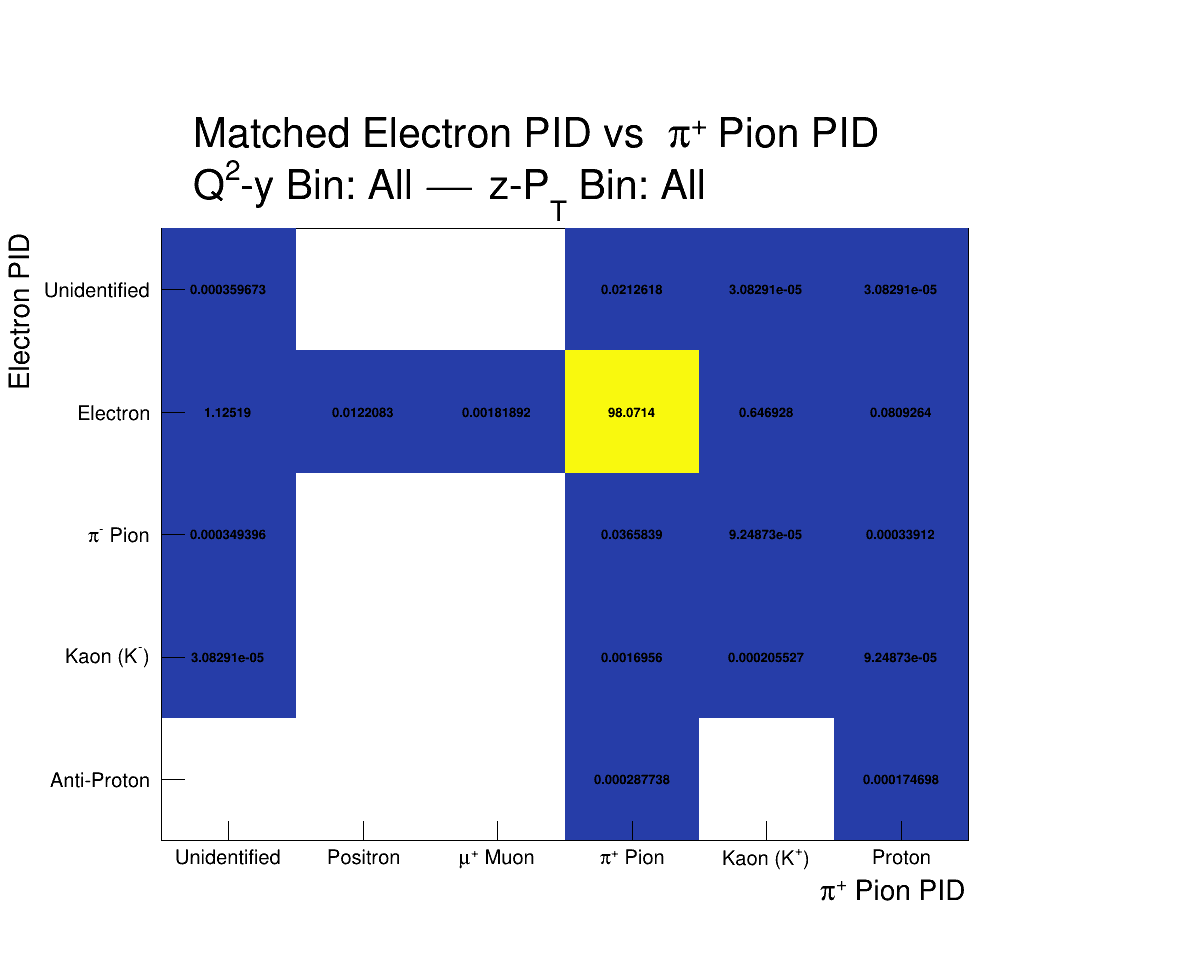

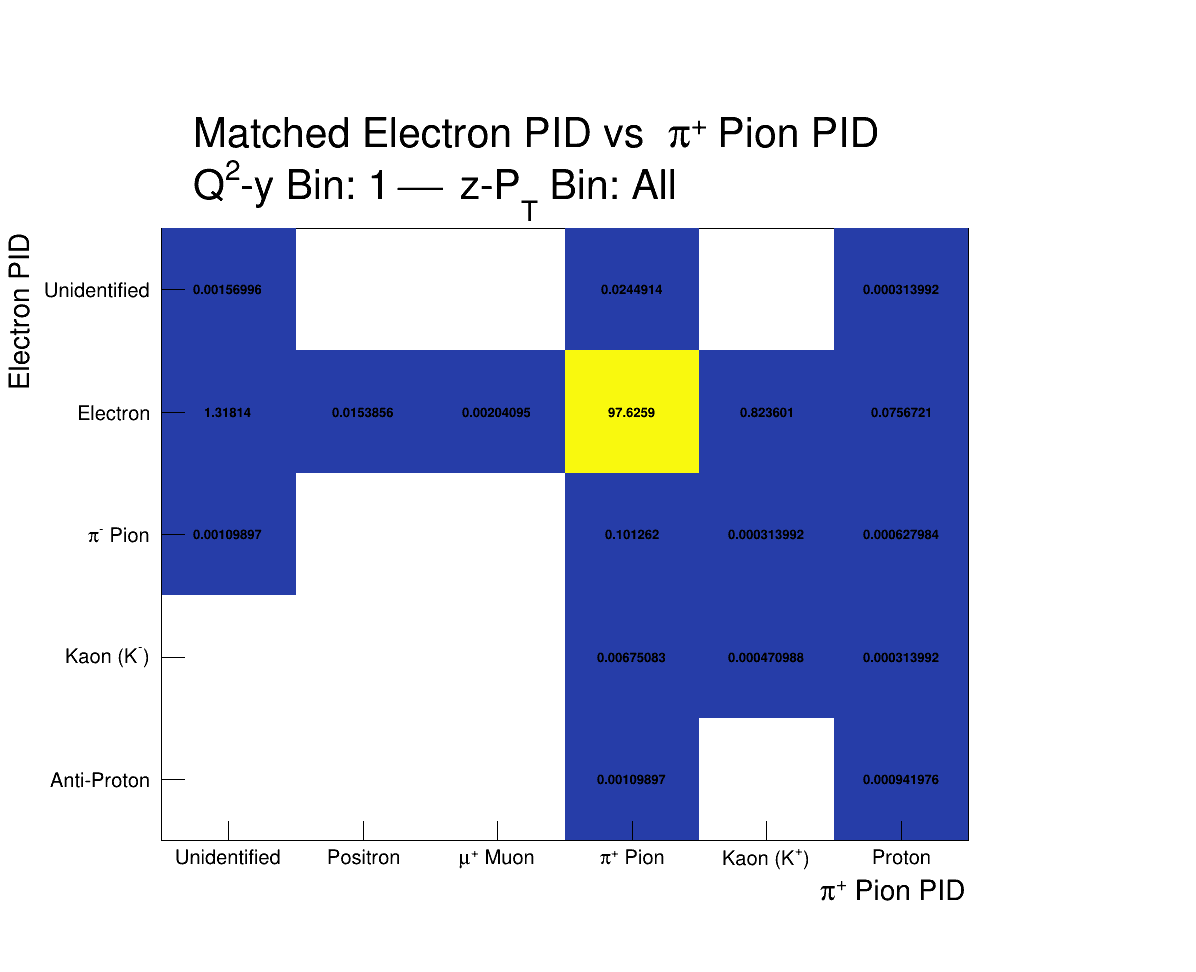

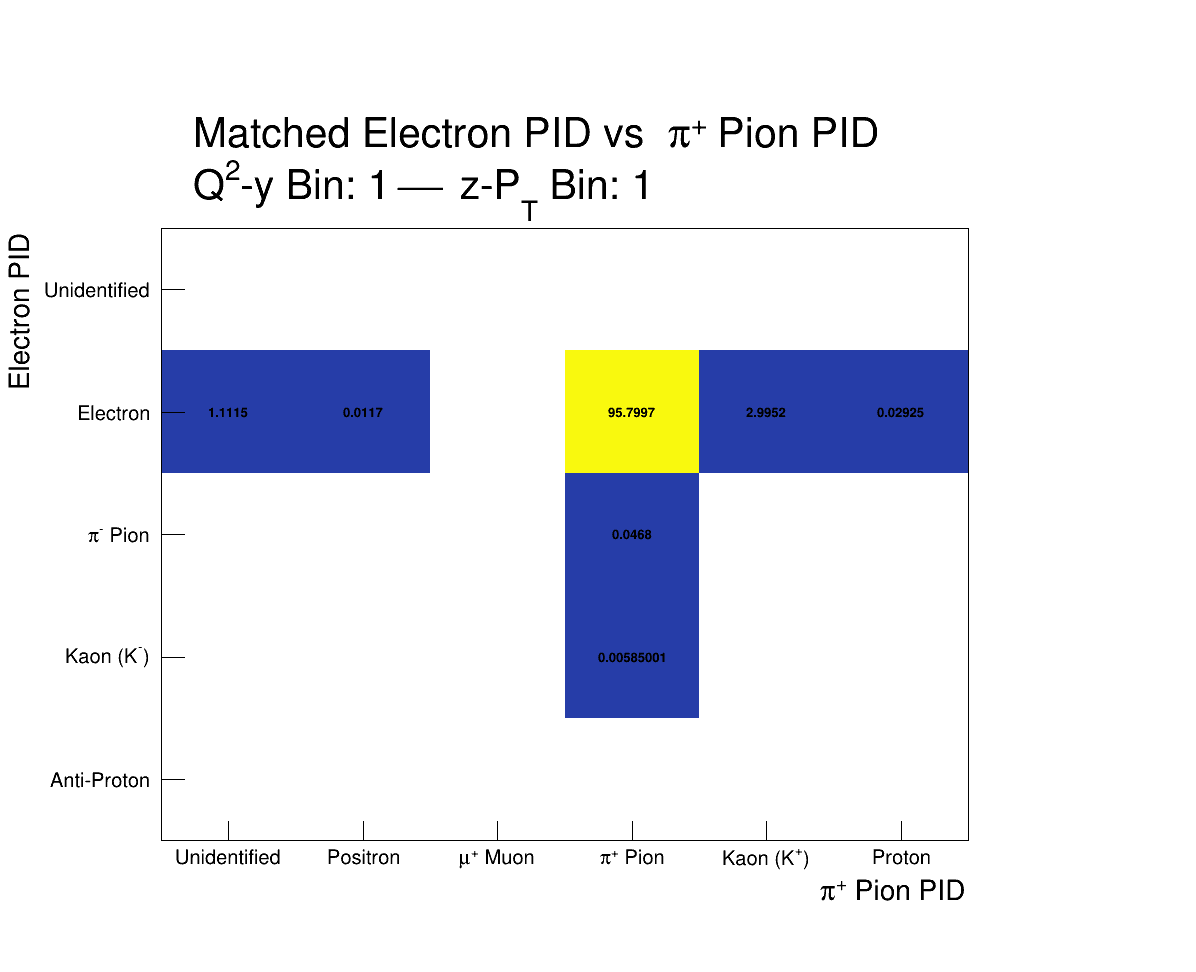

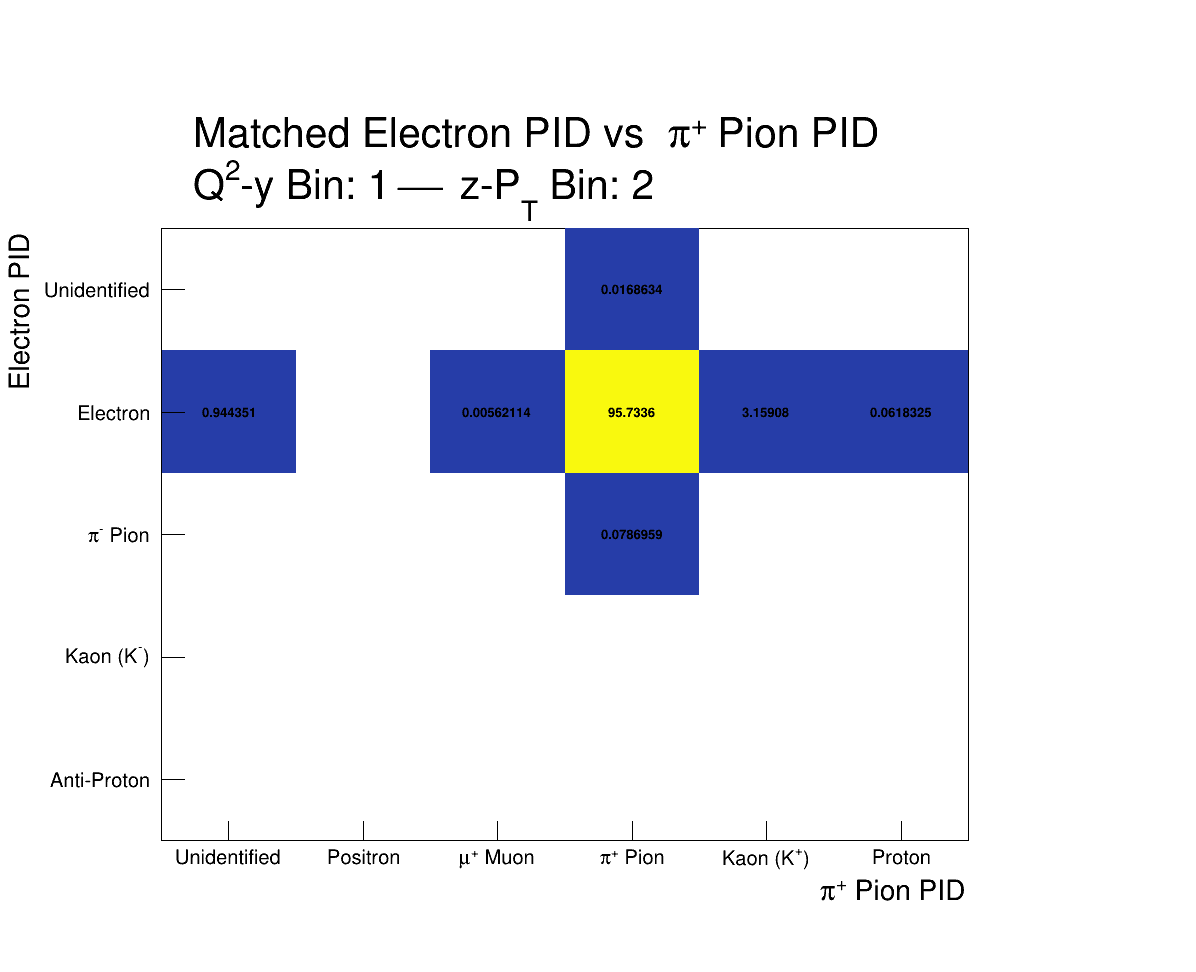

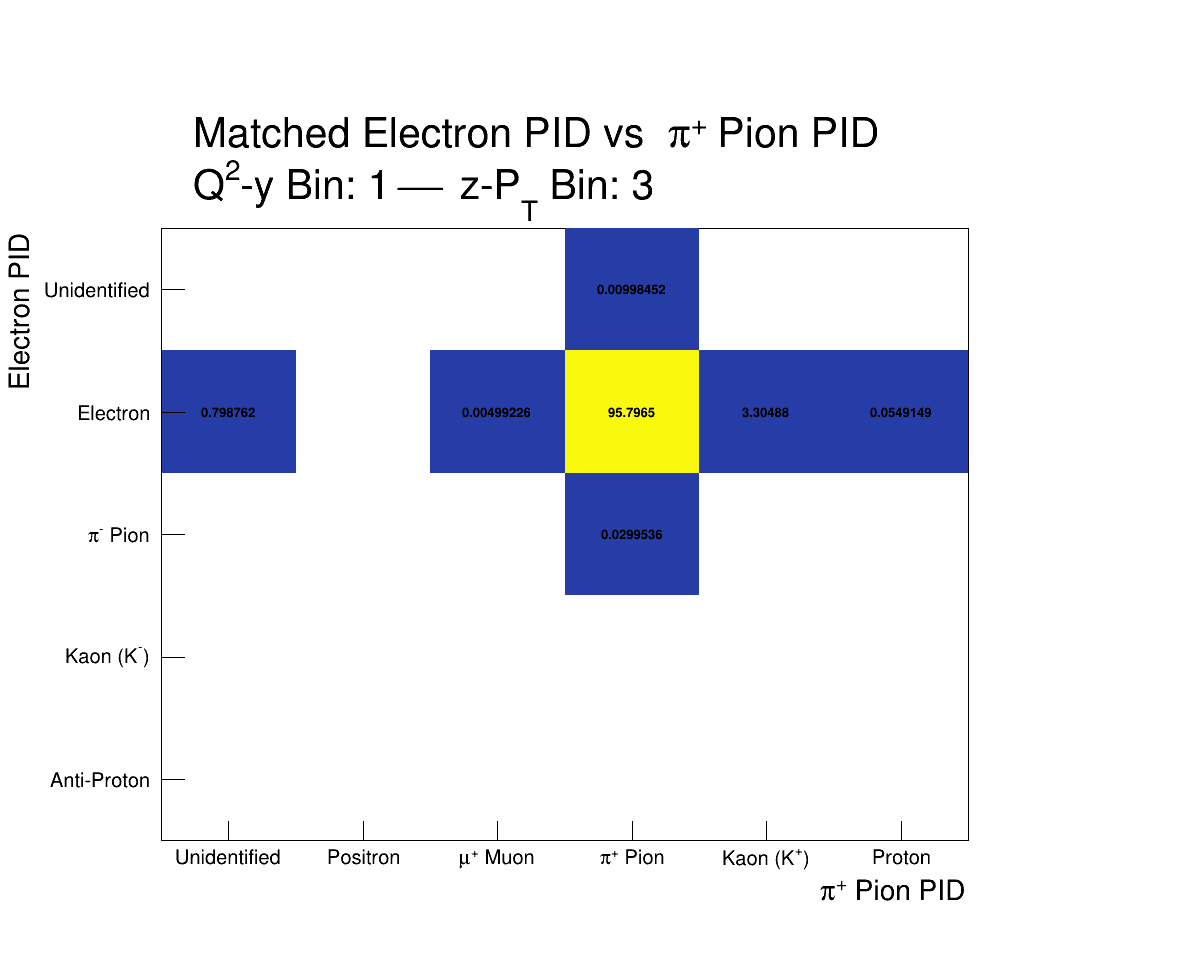

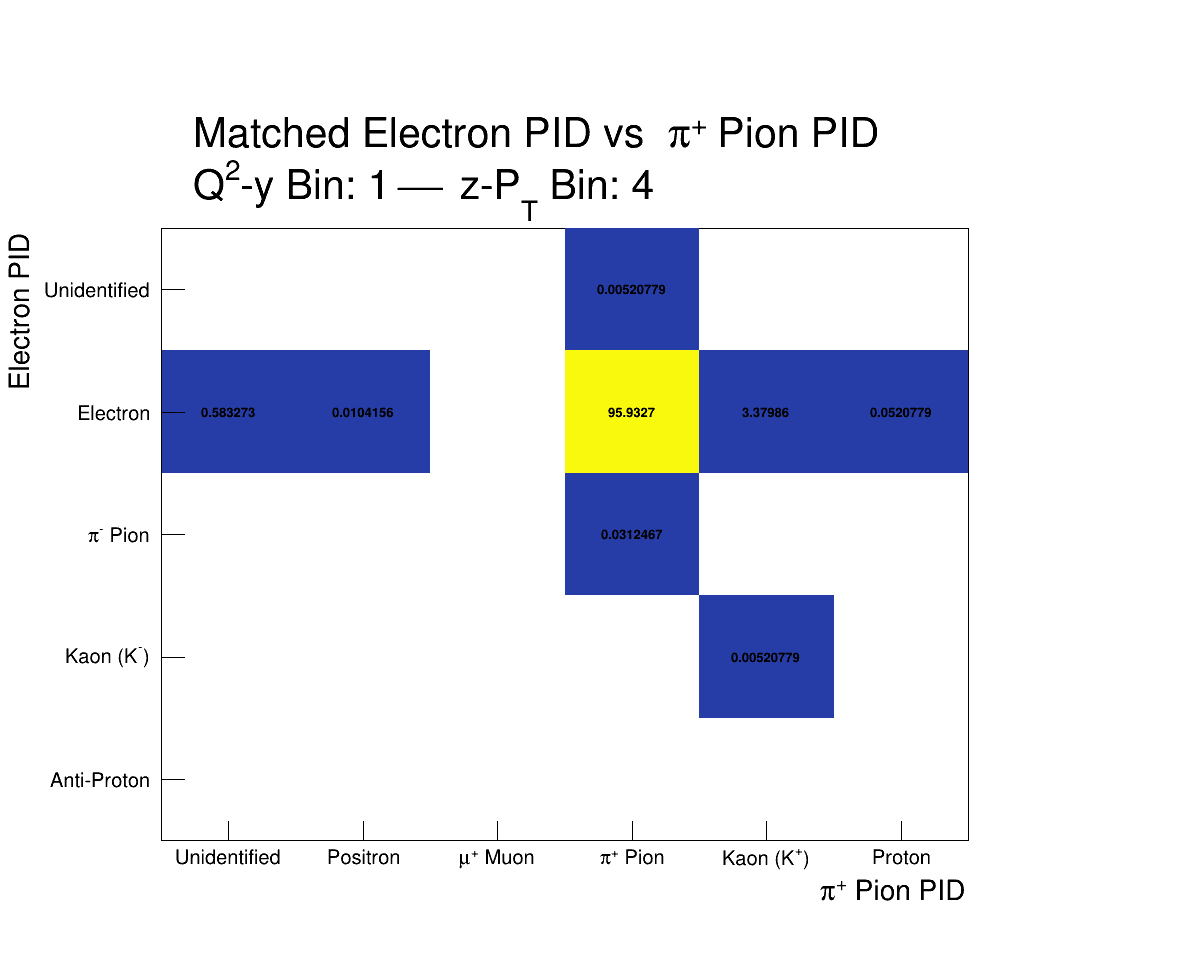

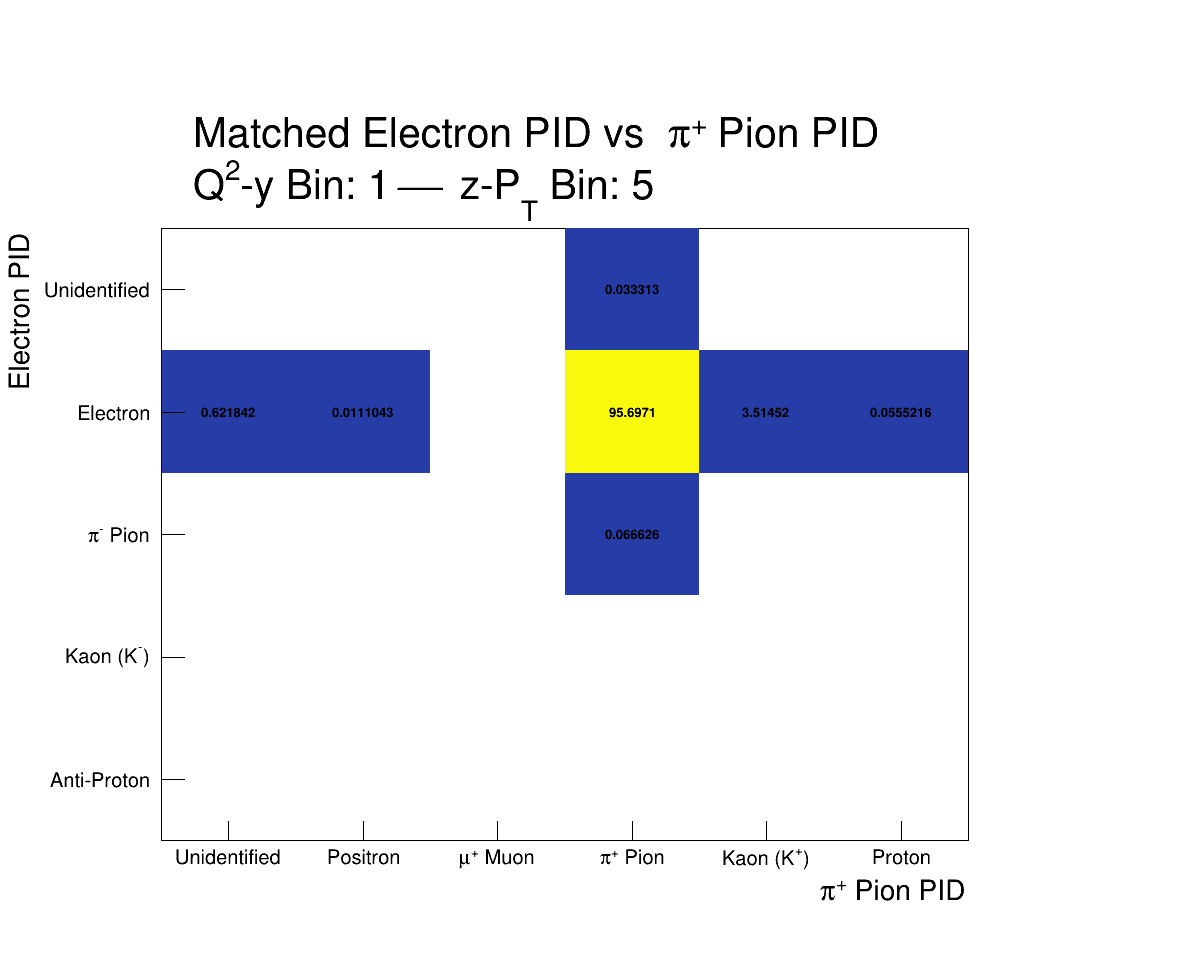

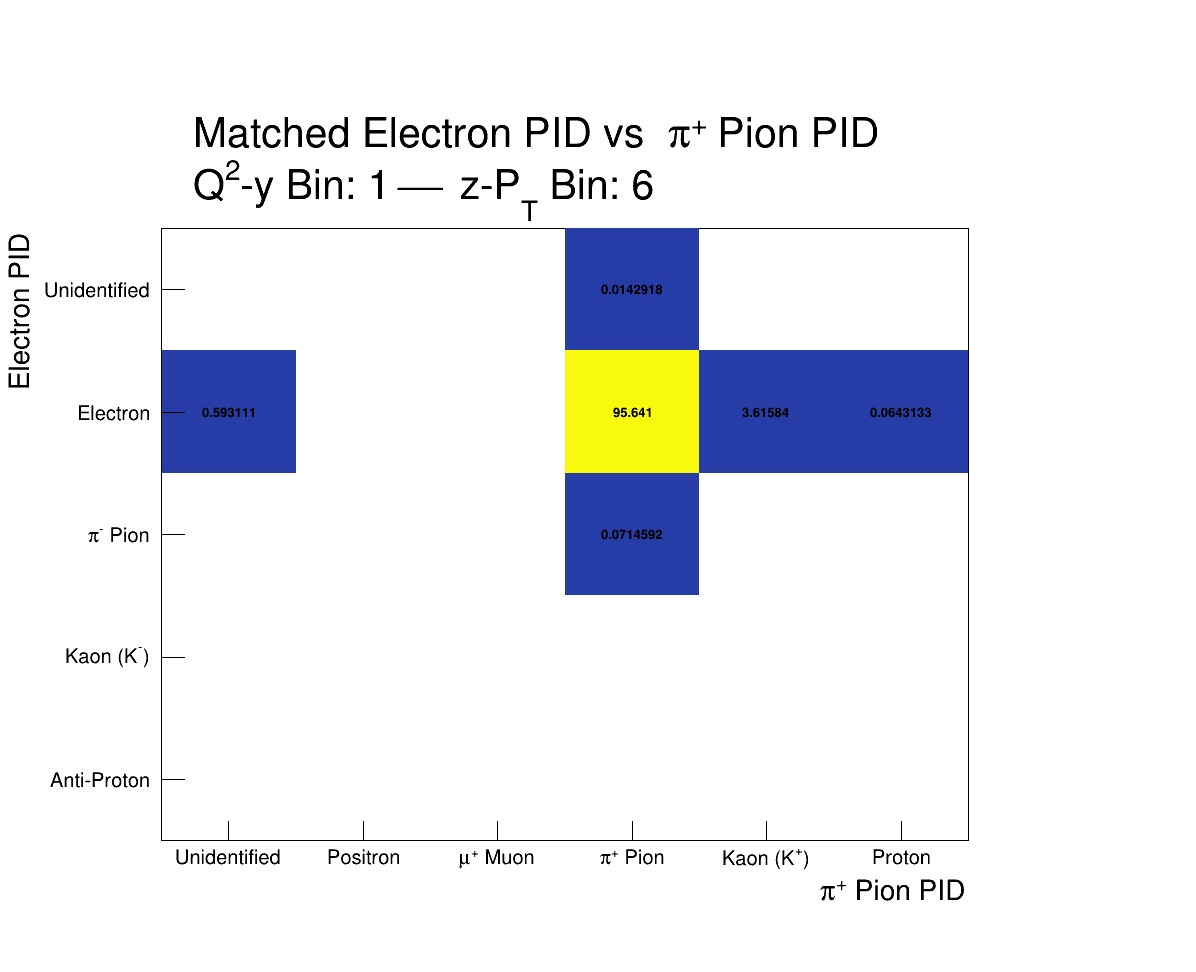

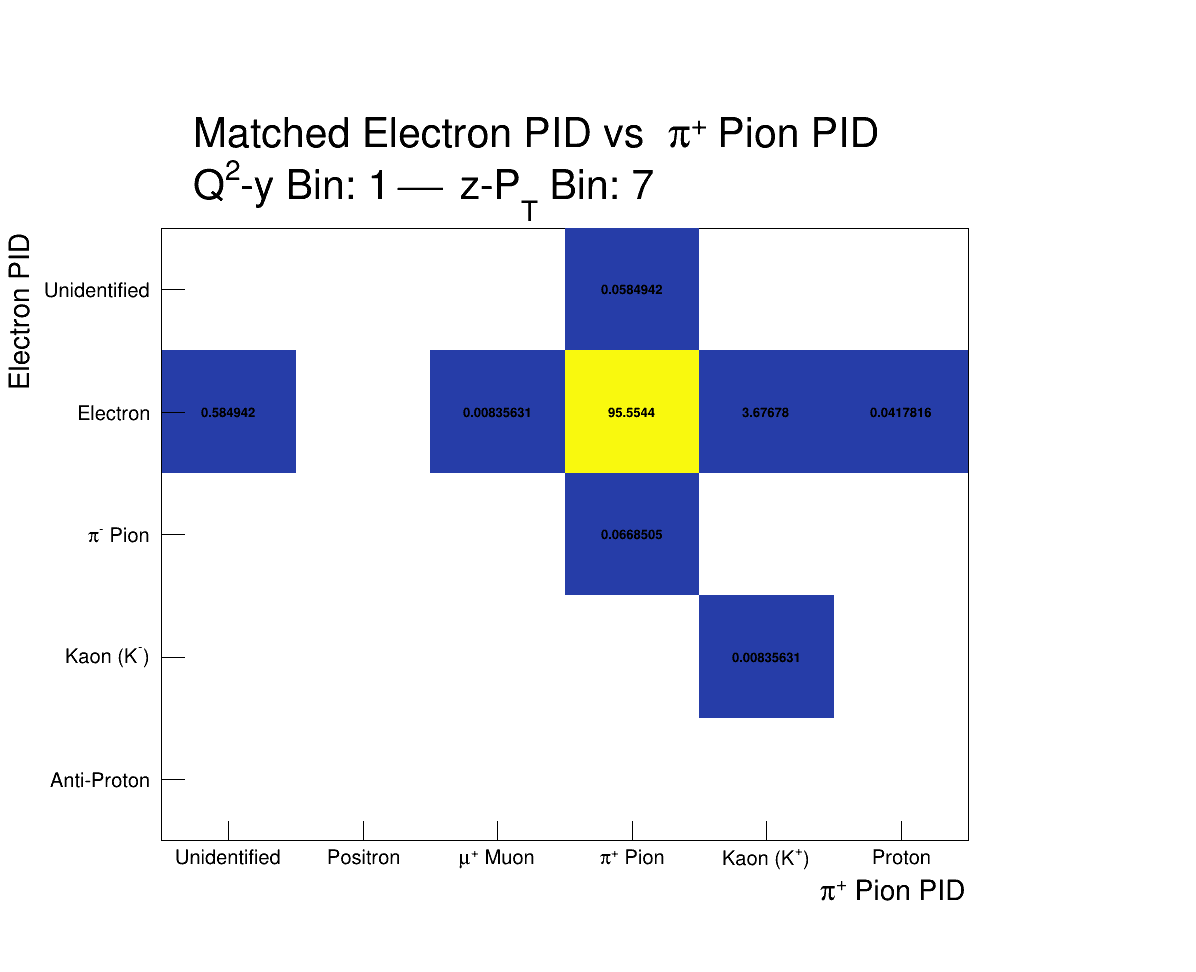

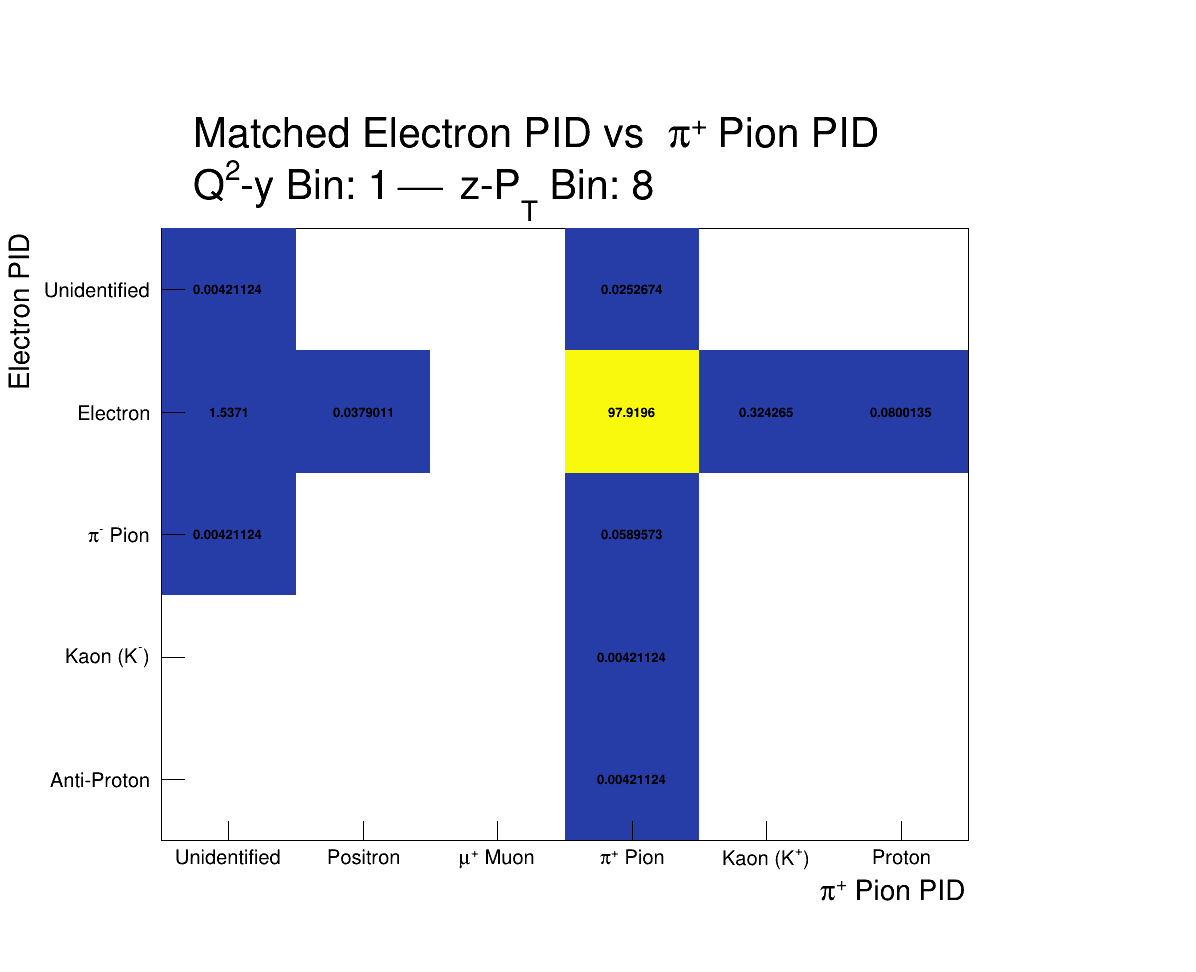

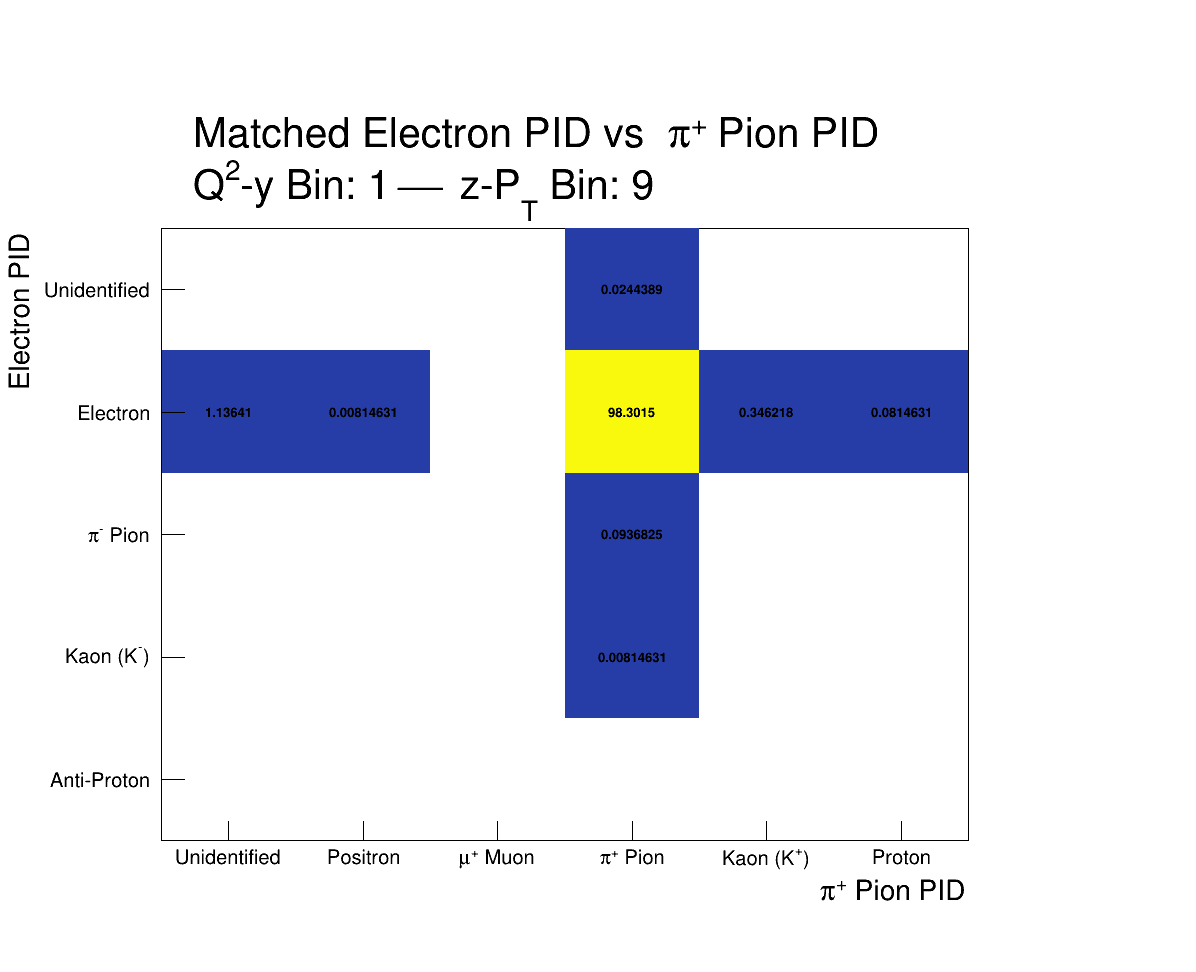

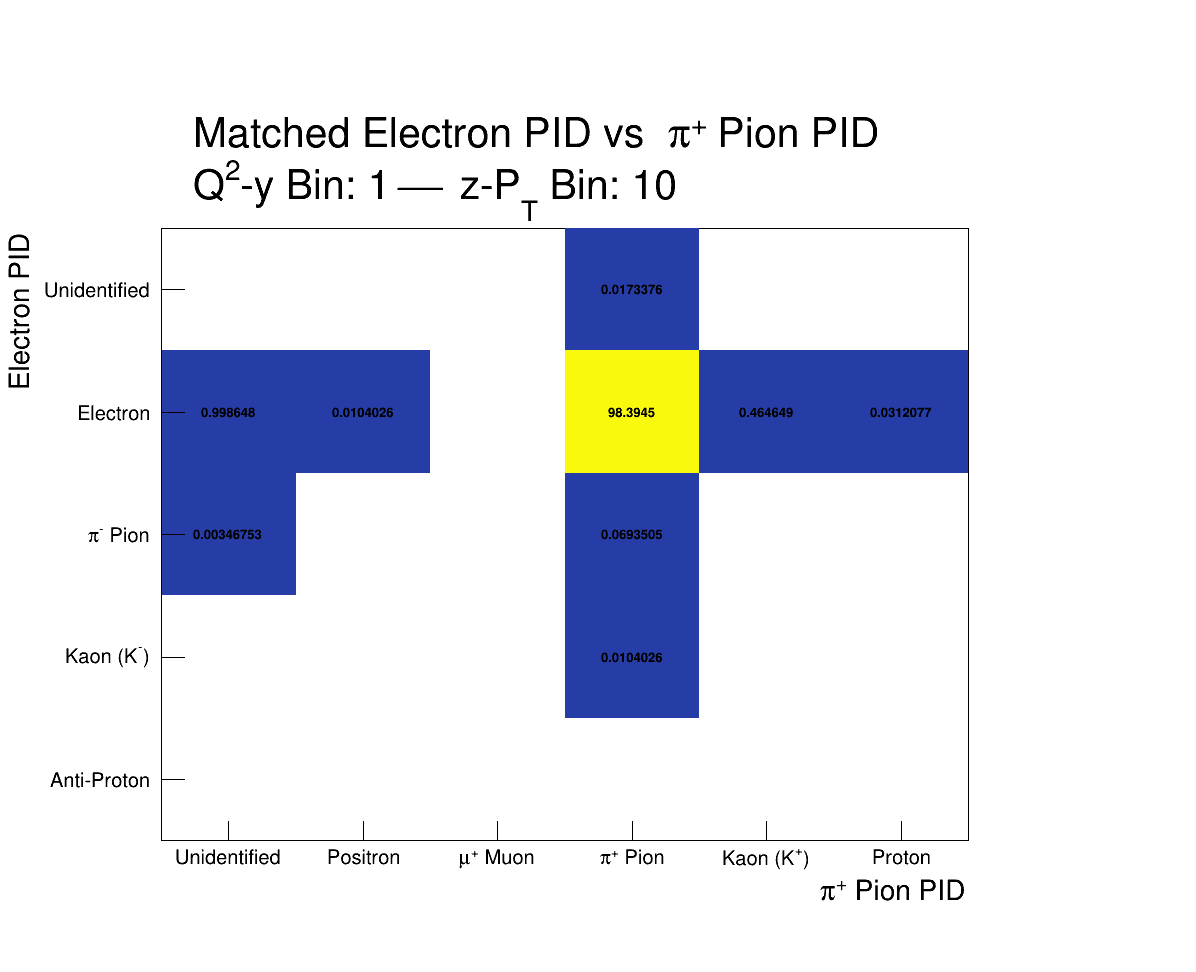

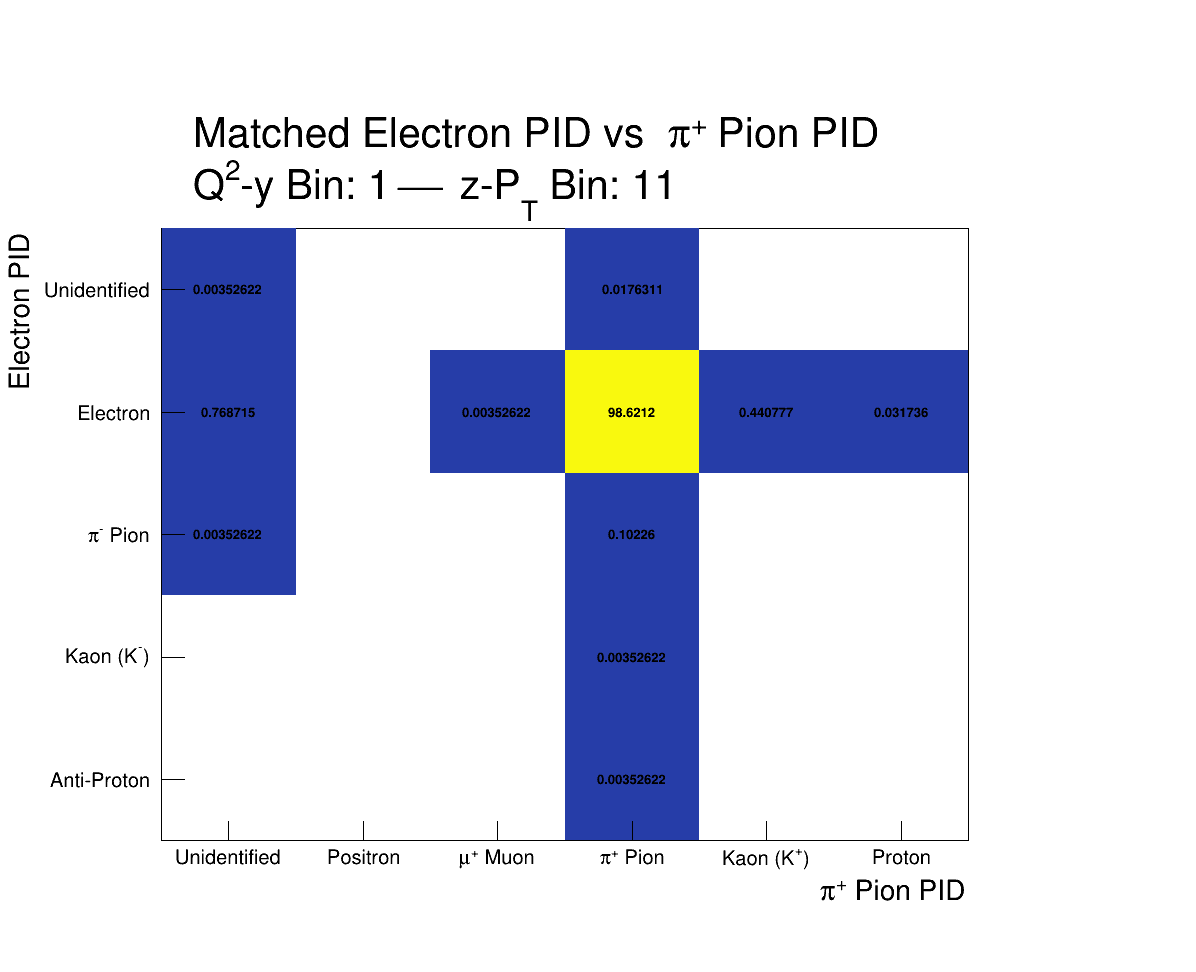

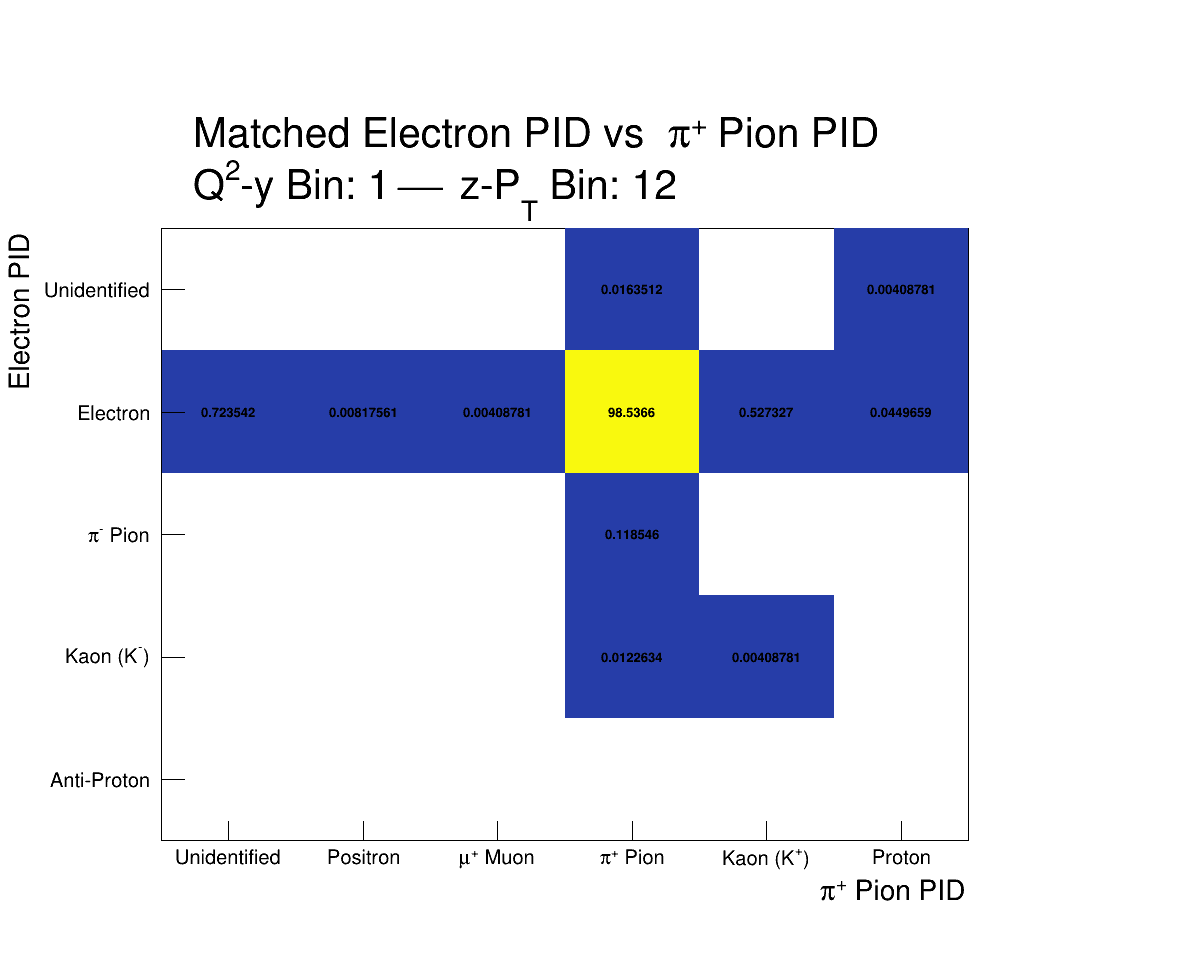

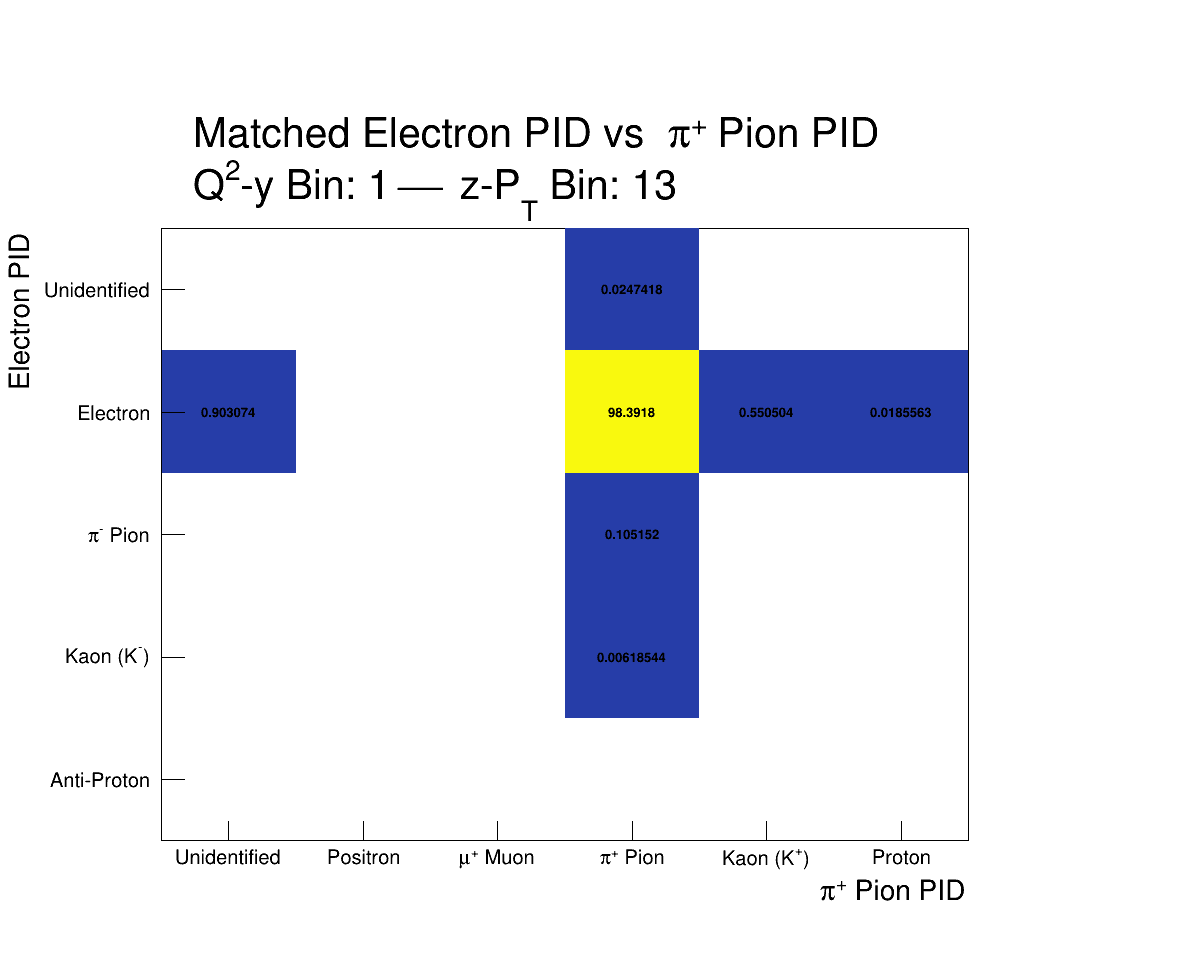

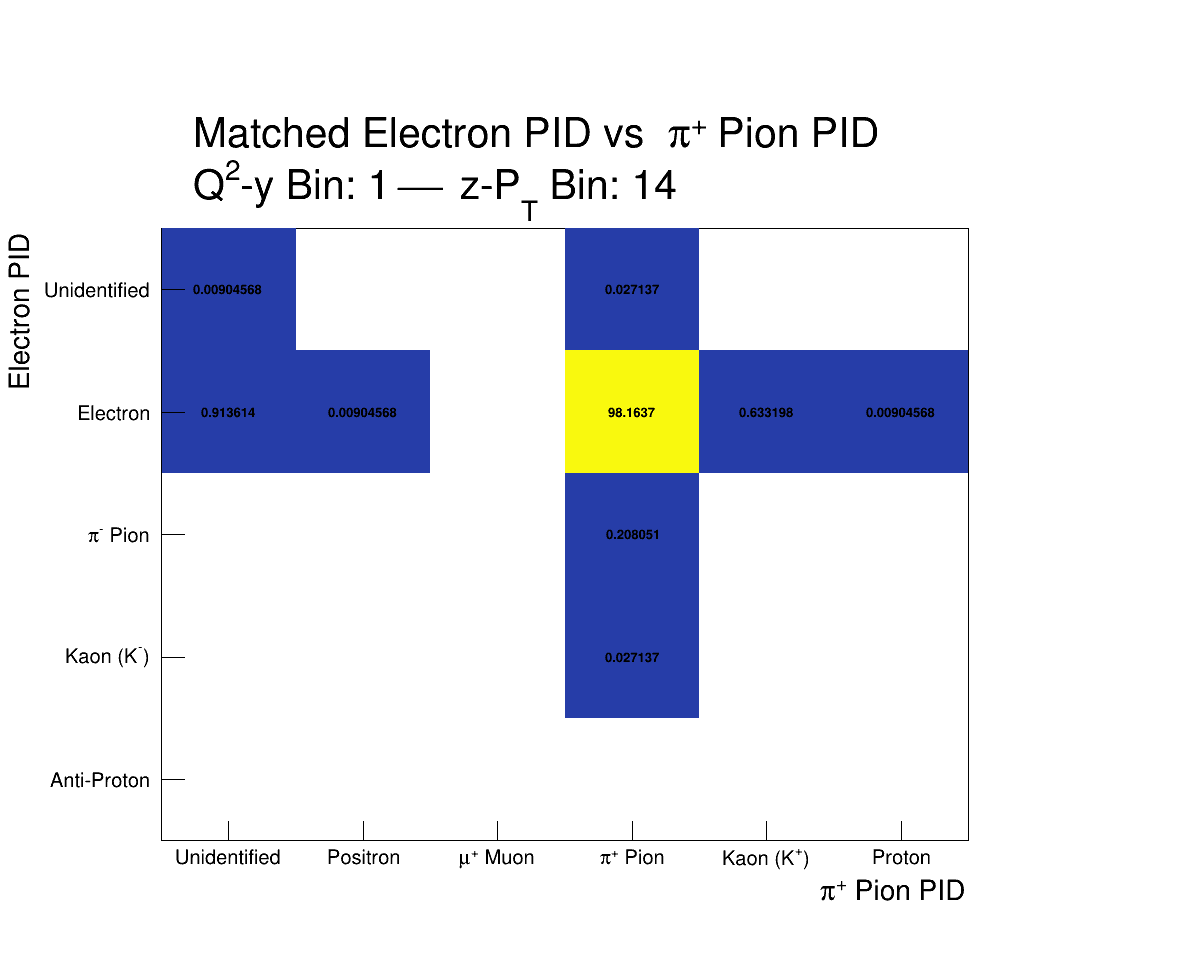

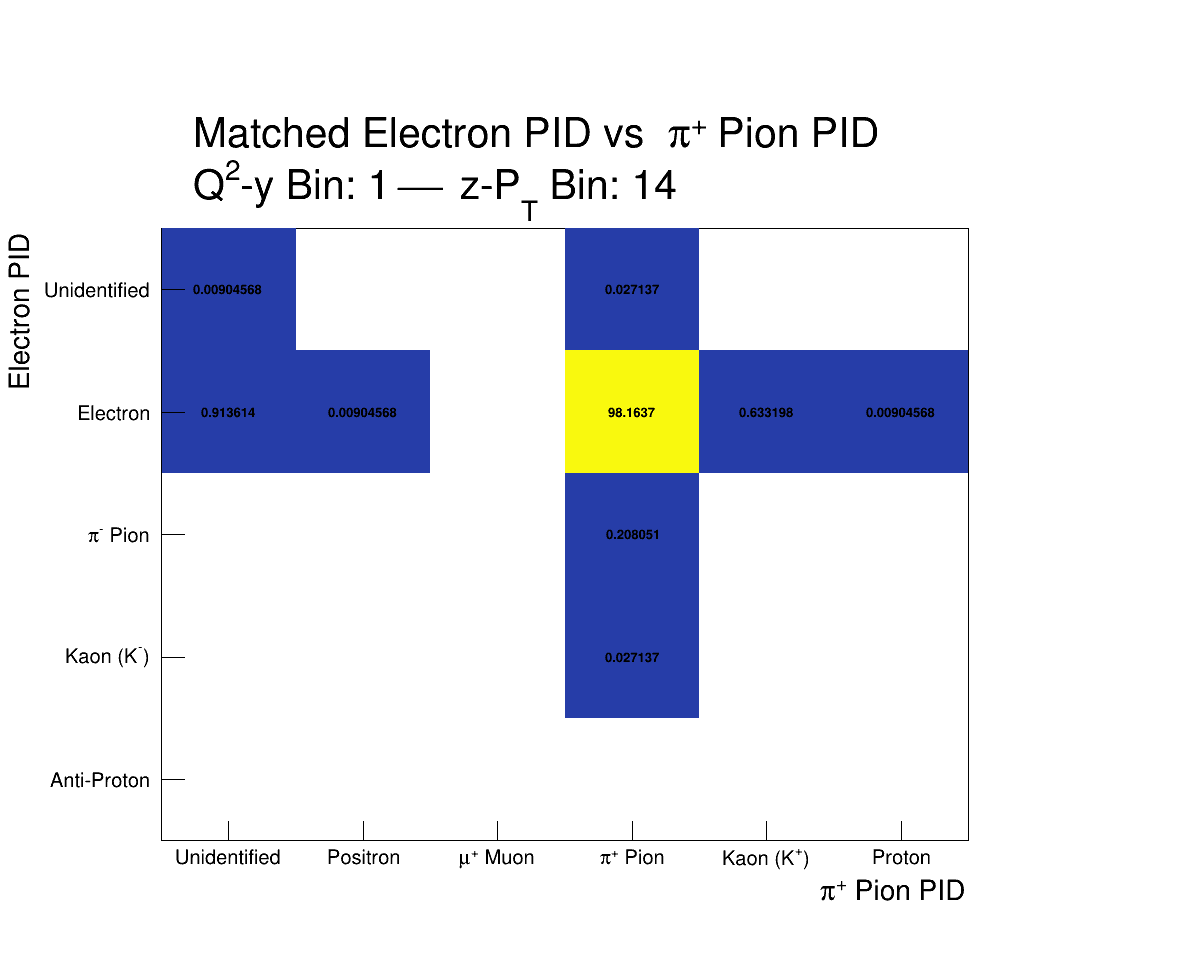

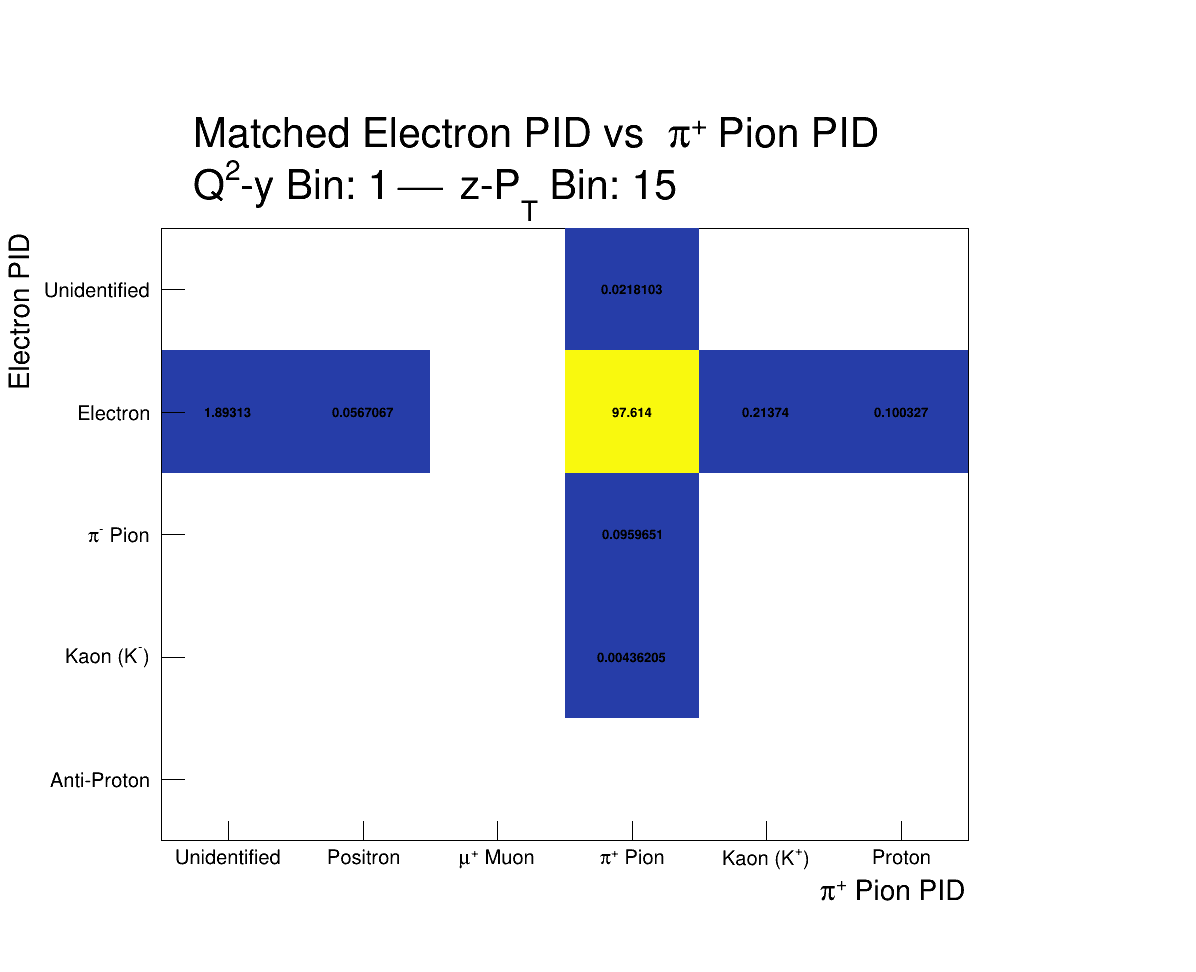

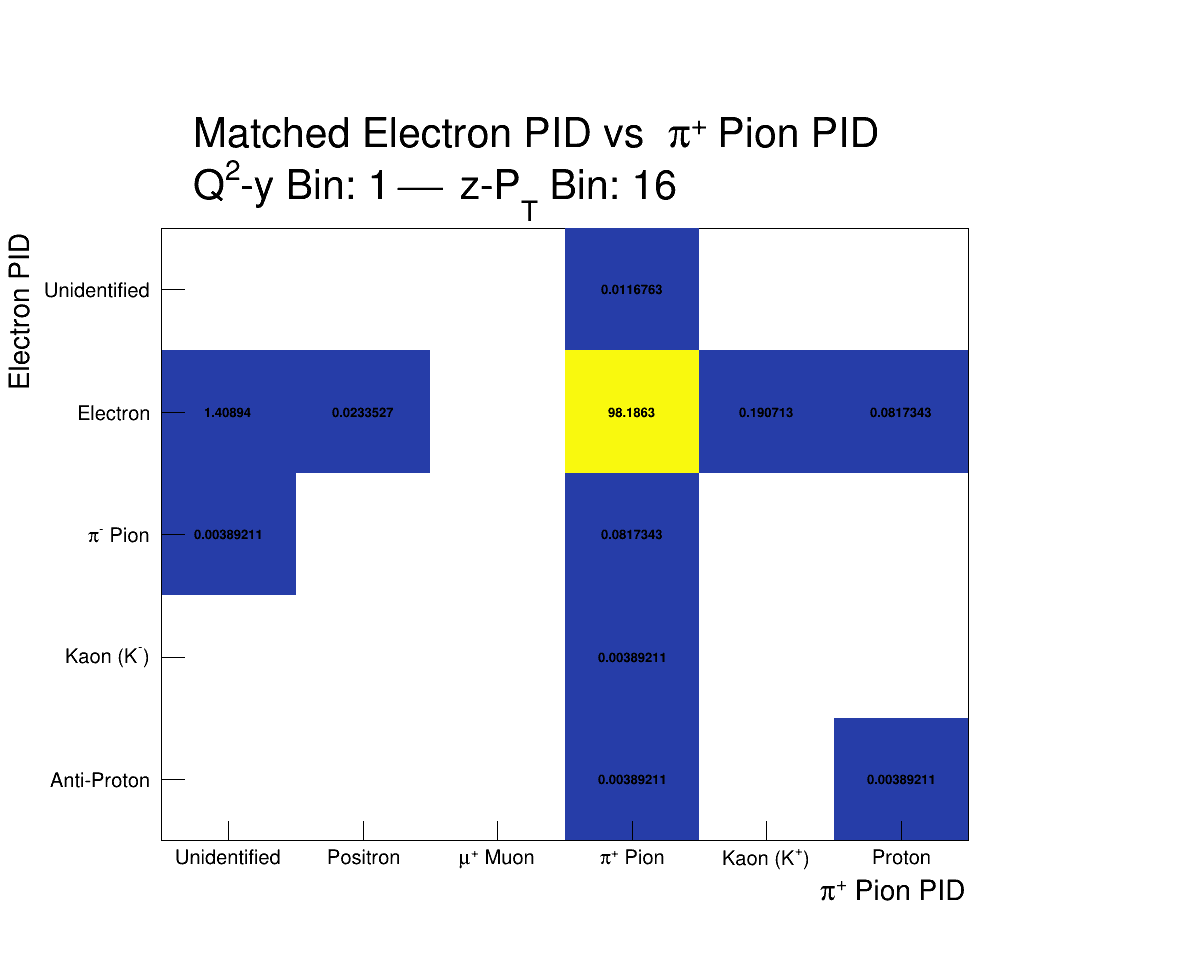

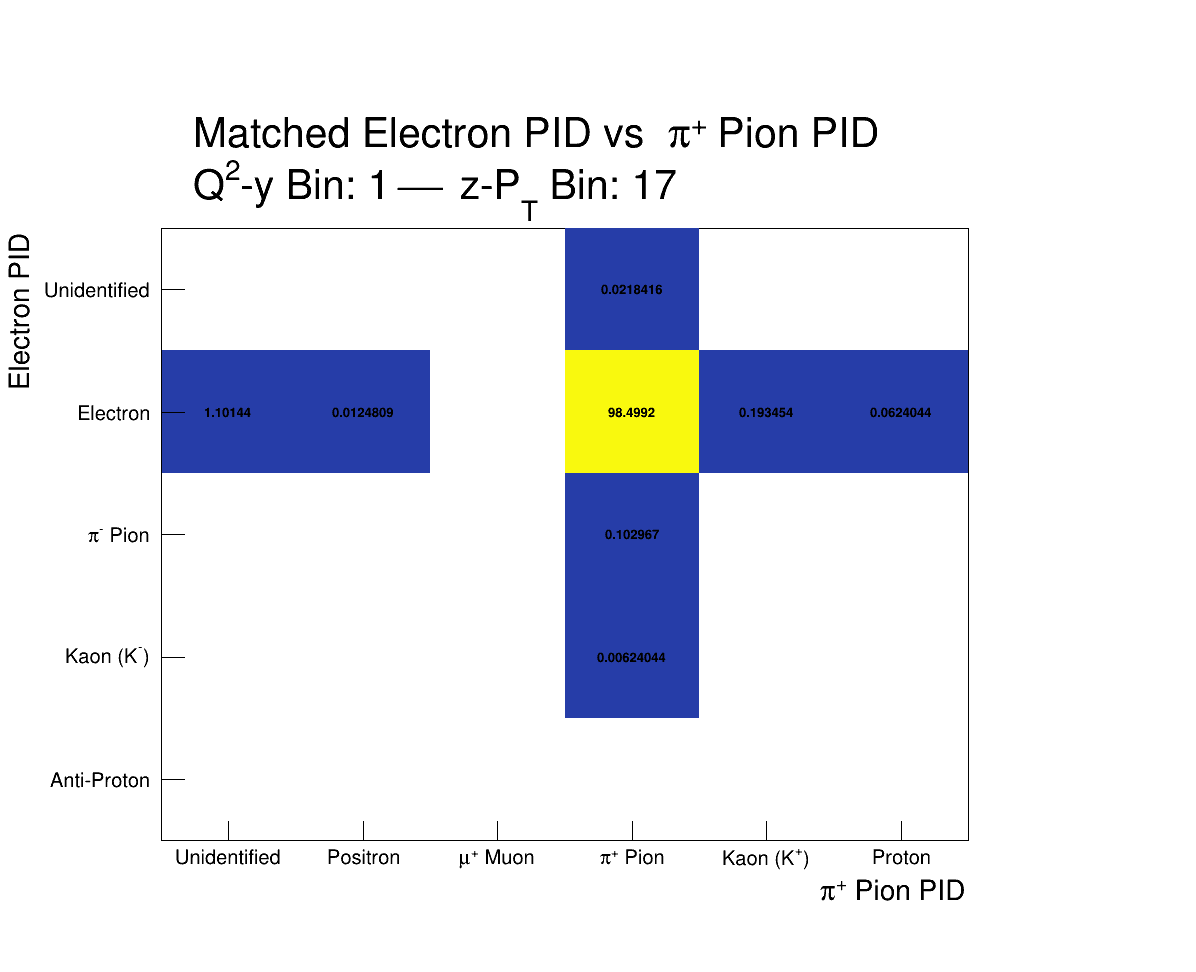

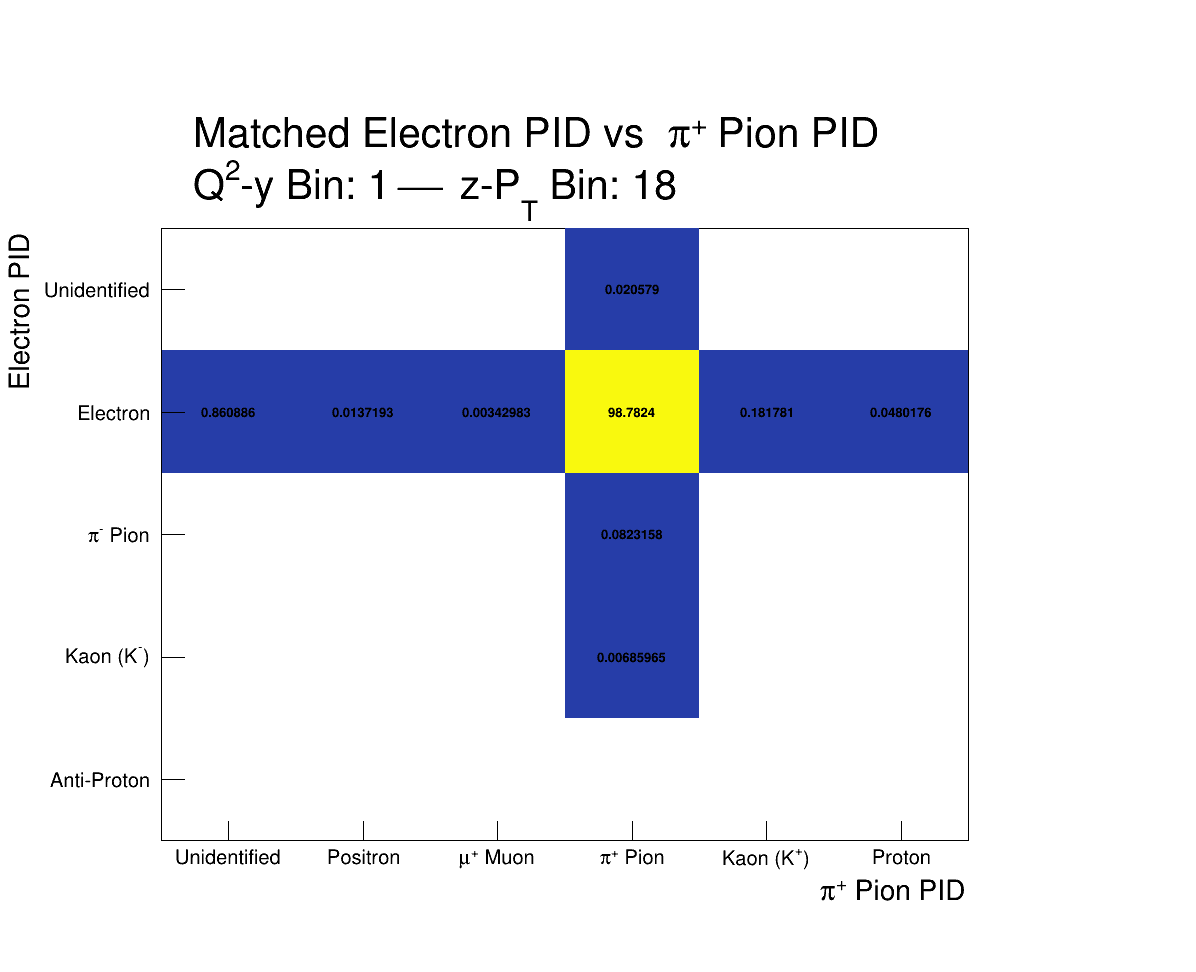

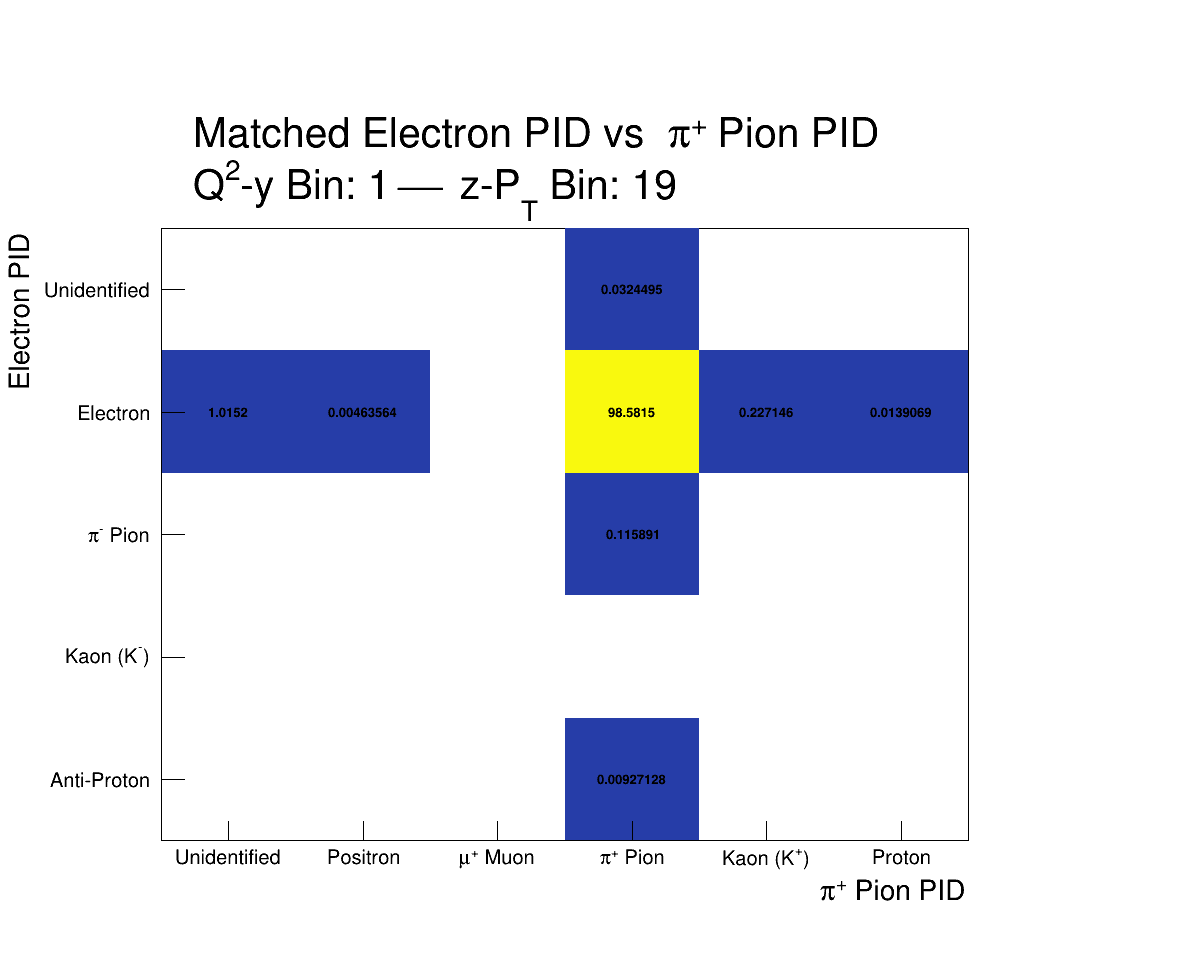

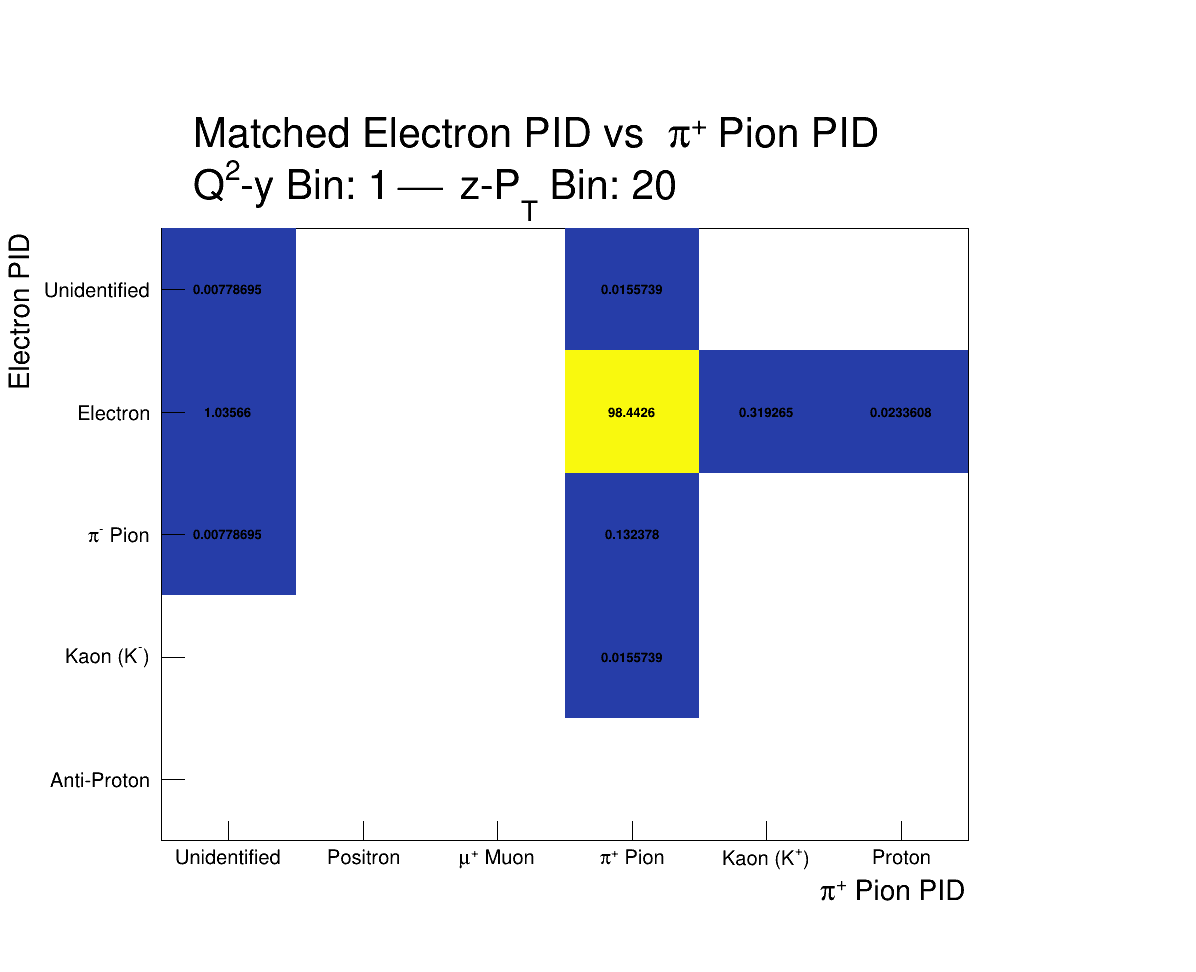

In [ ]:
cut = "cut_Complete_SIDIS_eS6o"
cut = "cut_Complete_SIDIS"
# cut = "no_cut"

Q2_y_Bin = "All"
# Q2_y_Bin = "3"

Q2_y_Bin_List = ["All", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Q2_y_Bin_List = ["All"]
# Q2_y_Bin_List = [6]
# Q2_y_Bin_List = ["All", 5, 14]

Histo_mdf_3D = {}
Histo_bdf_3D = {}
Histo_mdf_2D = {}
Histo_bdf_2D = {}
Histo_PID    = {}
canvas_main  = {}


Ave_Miss_Electron = 0
Ave_UnId_Electron = 0
Ave_Miss_Pip_Pion = 0
Ave_UnId_Pip_Pion = 0

Min_Miss_Electron = [100, "BIN"]
Min_UnId_Electron = [100, "BIN"]
Min_Miss_Pip_Pion = [100, "BIN"]
Min_UnId_Pip_Pion = [100, "BIN"]

Max_Miss_Electron = [0, "BIN"]
Max_UnId_Electron = [0, "BIN"]
Max_Miss_Pip_Pion = [0, "BIN"]
Max_UnId_Pip_Pion = [0, "BIN"]

Identified___Background = 0
Unidentified_Background = 0
Total_Background = 0

Max_Background = [0,   "BIN"]
Min_Background = [100, "BIN"]


for Q2_y_Bin in Q2_y_Bin_List:

    Histo_Name_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='PID_el_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]), (Var-D2='PID_pip_idx'-[NumBins=11, MinBin=0.5, MaxBin=11.5]))"
    Histo_Name_bdf = str(Histo_Name_mdf.replace("Normal_2D", "Normal_Background_2D"))

    # Histo_Name_Q2_y_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=280, MinBin=0, MaxBin=14]), (Var-D2='y'-[NumBins=100, MinBin=0, MaxBin=1]))"
    # Histo_Name_Q2_y_bdf = str(Histo_Name_Q2_y_mdf.replace("Normal_2D", "Normal_Background_2D"))

    # Histo_Name_z_pT_mdf = f"((Histo-Group='Normal_2D'), (Data-Type='mdf'), (Data-Cut='{cut}'), (Smear-Type=''), (Binning-Type='Y_bin'-[Q2-y-Bin={Q2_y_Bin}, z-PT-Bin=All]), (Var-D1='z'-[NumBins=120, MinBin=0, MaxBin=1.2]), (Var-D2='pT'-[NumBins=200, MinBin=0, MaxBin=2.0]))"
    # Histo_Name_z_pT_bdf = str(Histo_Name_z_pT_mdf.replace("Normal_2D", "Normal_Background_2D"))


    Histo_mdf_3D[f"{Q2_y_Bin}"]      = mdf.Get(str(Histo_Name_mdf))
    Histo_bdf_3D[f"{Q2_y_Bin}"]      = mdf.Get(str(Histo_Name_bdf))

    # Histo_mdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_mdf))
    # Histo_bdf_Q2_y_3D = mdf.Get(str(Histo_Name_Q2_y_bdf))

    # Histo_mdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_mdf))
    # Histo_bdf_z_pT_3D = mdf.Get(str(Histo_Name_z_pT_bdf))

    z_pT_Bin_Unfold = "All"
    
    z_pT_Bin_Unfold_List = ["All"]
    if(Q2_y_Bin not in ["All"]):
        z_pT_Bin_Unfold_List.extend(range(1, Get_Num_of_z_pT_Bins_w_Migrations(Q2_y_Bin_Num_In=Q2_y_Bin)[1] + 1))
#     print(z_pT_Bin_Unfold_List)
#     z_pT_Bin_Unfold_List = ["All"]
    
    for z_pT_Bin_Unfold in z_pT_Bin_Unfold_List:
        if(z_pT_Bin_Unfold in [0, "All"]):
            Histo_mdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(1, 50)
            Histo_bdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(1, 50)

            # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)
            # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(1, 50)

            # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
            # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(1, 50)
        else:
            if(skip_condition_z_pT_bins(Q2_Y_BIN=Q2_y_Bin, Z_PT_BIN=z_pT_Bin_Unfold, BINNING_METHOD="_Y_bin")):
                continue
            
            Histo_mdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            Histo_bdf_3D[f"{Q2_y_Bin}"].GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

            # Histo_mdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            # Histo_bdf_Q2_y_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)

            # Histo_mdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)
            # Histo_bdf_z_pT_3D.GetXaxis().SetRangeUser(z_pT_Bin_Unfold, z_pT_Bin_Unfold)


        Histo_mdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Histo_mdf_3D[f"{Q2_y_Bin}"] .Project3D("yz")
        Histo_bdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Histo_bdf_3D[f"{Q2_y_Bin}"] .Project3D("yz")


        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"] = Histo_mdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Clone(f"Histo_PID_Q2_y_{Q2_y_Bin}_z_pT_{z_pT_Bin_Unfold}")
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Add(Histo_bdf_2D[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"])

        Histo_PID_Title = "".join(["#splitline{Matched Electron PID vs #pi^{+} Pion PID}{Q^{2}-y Bin: ", str(Q2_y_Bin), " #topbar z-P_{T} Bin: ", str(z_pT_Bin_Unfold), "}"])

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetTitle(Histo_PID_Title)

        Histo_PID_Total = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetEntries()
        
        if(Histo_PID_Total == 0):
            print(f"{color.Error}Skipping Bin {Q2_y_Bin}_{z_pT_Bin_Unfold} (No Entries){color.END}")
            continue
        
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Scale(100/Histo_PID_Total)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetMarkerSize(0.8)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetZaxis().SetLabelSize(0.05)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetLineColor(ROOT.kBlack)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].SetLineWidth(10)

        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"] = PID_Histo_Label(Histogram=Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"])

        ROOT.gStyle.SetTitleOffset(2.95, 'y')
        ROOT.gStyle.SetGridColor(17)
        ROOT.gStyle.SetPadGridX(0)
        ROOT.gStyle.SetPadGridY(0)


        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().SetRangeUser(0.5, 5.5)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().SetRangeUser(4.5, 10.5)

        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"]  = Canvas_Create(Name=f"Canvas_{Q2_y_Bin}_{z_pT_Bin_Unfold}", Num_Columns=1, Num_Rows=1, Size_X=1200, Size_Y=1000, cd_Space=0)
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw()
        Draw_Canvas(canvas=canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"], cd_num=1, left_add=0.15, right_add=0.1, up_add=0.15, down_add=0.15)
        Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw("col text")
        # ROOT.gPad.SetLogz(1)

        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Update()
        box, count = {}, 0
        for ii in range(5, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsX()):
            for jj in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsY() - 5):
                count += 1
                x1 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinLowEdge(ii)
                x2 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinUpEdge(ii)
                y1 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinLowEdge(jj)
                y2 = Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinUpEdge(jj)
                box[count] = ROOT.TBox(x1, y1, x2, y2)
                box[count].SetFillStyle(0)
                box[count].SetLineColor(ROOT.kBlack)
                box[count].SetLineWidth(2)
                box[count].Draw("l same")
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Update()
        canvas_main[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].Draw()

        bin_num = 0
        Miss_Electron, UnId_Electron, Miss_Pip_Pion, UnId_Pip_Pion = 0, 0, 0, 0
        for ii in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsX() + 1):
            for jj in range(1, Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetNbinsY() + 1):
                X_bin_label =  Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetXaxis().GetBinLabel(ii)
                Y_bin_label =  Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetYaxis().GetBinLabel(jj)
                # print(f"Bin {bin_num}:\nX-axis: {X_bin_label}\nY-axis: {Y_bin_label}\n")
                bin_num += 1
                if(Y_bin_label not in ["Electron",     "Unidentified"]):
                    Miss_Electron += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(Y_bin_label     in ["Unidentified"]):
                    UnId_Electron += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(X_bin_label not in ["#pi^{+} Pion", "Unidentified"]):
                    Miss_Pip_Pion += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)
                if(X_bin_label     in ["Unidentified"]):
                    UnId_Pip_Pion += Histo_PID[f"{Q2_y_Bin}_{z_pT_Bin_Unfold}"].GetBinContent(ii, jj)

#             print(f"\n{color.BOLD}Q2-y Bin {Q2_y_Bin}:{color.END}")
        #     print(f"\tMiss_Electron = {round(Miss_Electron, 7)}")
        #     print(f"\tUnId_Electron = {round(UnId_Electron, 7)}")
        #     print(f"\tMiss_Pip_Pion = {round(Miss_Pip_Pion, 7)}")
        #     print(f"\tUnId_Pip_Pion = {round(UnId_Pip_Pion, 7)}")


        #     print(f"\tTotal (Identified) Background   = {round(Miss_Electron + Miss_Pip_Pion, 7)}")
        #     print(f"\tTotal (Unidentified) Background = {round(UnId_Electron + UnId_Pip_Pion, 7)}")
#             print(f"\tTotal Background                = {round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7)}")

        Ave_Miss_Electron       = round(Miss_Electron, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_Miss_Electron       + round(Miss_Electron, 7))/2)
        Ave_UnId_Electron       = round(UnId_Electron, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_UnId_Electron       + round(UnId_Electron, 7))/2)
        Ave_Miss_Pip_Pion       = round(Miss_Pip_Pion, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_Miss_Pip_Pion       + round(Miss_Pip_Pion, 7))/2)
        Ave_UnId_Pip_Pion       = round(UnId_Pip_Pion, 7)                                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Ave_UnId_Pip_Pion       + round(UnId_Pip_Pion, 7))/2)
        Identified___Background = round(Miss_Electron + Miss_Pip_Pion, 7)                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Identified___Background + round(Miss_Electron + Miss_Pip_Pion, 7))/2)
        Unidentified_Background = round(UnId_Electron + UnId_Pip_Pion, 7)                                 if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Unidentified_Background + round(UnId_Electron + UnId_Pip_Pion, 7))/2)
        Total_Background        = round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7) if(Q2_y_Bin == Q2_y_Bin_List[0]) else ((Total_Background        + round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))/2)

        if(Min_Miss_Electron[0] >= Miss_Electron):
            Min_Miss_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_Miss_Electron[0] > Miss_Electron):
            Min_Miss_Electron   = [round(Miss_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_UnId_Electron[0] >= UnId_Electron):
            Min_UnId_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_UnId_Electron[0] > UnId_Electron):
            Min_UnId_Electron   = [round(UnId_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_Miss_Pip_Pion[0] >= Miss_Pip_Pion):
            Min_Miss_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_Miss_Pip_Pion[0] > Miss_Pip_Pion):
            Min_Miss_Pip_Pion   = [round(Miss_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Min_UnId_Pip_Pion[0] >= UnId_Pip_Pion):
            Min_UnId_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Min_UnId_Pip_Pion[0] > UnId_Pip_Pion):
            Min_UnId_Pip_Pion   = [round(UnId_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]

        if(Max_Miss_Electron[0] <= Miss_Electron):
            Max_Miss_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_Miss_Electron[0] < Miss_Electron):
            Max_Miss_Electron   = [round(Miss_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_UnId_Electron[0] <= UnId_Electron):
            Max_UnId_Electron.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_UnId_Electron[0] < UnId_Electron):
            Max_UnId_Electron   = [round(UnId_Electron, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_Miss_Pip_Pion[0] <= Miss_Pip_Pion):
            Max_Miss_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_Miss_Pip_Pion[0] < Miss_Pip_Pion):
            Max_Miss_Pip_Pion   = [round(Miss_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_UnId_Pip_Pion[0] <= UnId_Pip_Pion):
            Max_UnId_Pip_Pion.append(f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}")
        if(Max_UnId_Pip_Pion[0] < UnId_Pip_Pion):
            Max_UnId_Pip_Pion   = [round(UnId_Pip_Pion, 5), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
            
        if(Min_Background[0] > (round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))):
            Min_Background   = [round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
        if(Max_Background[0] < (round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7))):
            Max_Background   = [round(Miss_Electron + UnId_Electron + Miss_Pip_Pion + UnId_Pip_Pion, 7), f"Q2-y: {Q2_y_Bin} - z-pT: {z_pT_Bin_Unfold}"]
            




print(f"\n{color.BOLD}")
print(f"Ave_Miss_Electron       = {round(Ave_Miss_Electron,       5)}")
print(f"Ave_UnId_Electron       = {round(Ave_UnId_Electron,       5)}")
print(f"Ave_Miss_Pip_Pion       = {round(Ave_Miss_Pip_Pion,       5)}")
print(f"Ave_UnId_Pip_Pion       = {round(Ave_UnId_Pip_Pion,       5)}")
print(f"Identified___Background = {round(Identified___Background, 5)}")
print(f"\t    (% of total = {round(Identified___Background/Total_Background, 6)*100}%)")
print(f"Unidentified_Background = {round(Unidentified_Background, 5)}")
print(f"\t    (% of total = {round(Unidentified_Background/Total_Background, 6)*100}%)")
print(f"Total_Background        = {round(Total_Background,        5)}")
print(f"\t(Non-Background = {100 - round(Total_Background,        5)})")
# print(f"\tRatio of Identified to Unidentified Background = {round(Identified___Background/Unidentified_Background, 5)}")
print(f"Min_Background          = {Min_Background}")
print(f"\t(Non-Background = {100 - Min_Background[0]})")
print(f"Max_Background          = {Max_Background}")
print(f"\t(Non-Background = {100 - Max_Background[0]})")
print("")
# print(f"Min_Miss_Electron       = {Min_Miss_Electron}\n\t(count = {len(Min_Miss_Electron) - 1})")
# print(f"Min_UnId_Electron       = {Min_UnId_Electron}\n\t(count = {len(Min_UnId_Electron) - 1})")
# print(f"Min_Miss_Pip_Pion       = {Min_Miss_Pip_Pion}\n\t(count = {len(Min_Miss_Pip_Pion) - 1})")
# print(f"Min_UnId_Pip_Pion       = {Min_UnId_Pip_Pion}\n\t(count = {len(Min_UnId_Pip_Pion) - 1})")
# print(f"Max_Miss_Electron       = {Max_Miss_Electron}")
# print(f"Max_UnId_Electron       = {Max_UnId_Electron}")
# print(f"Max_Miss_Pip_Pion       = {Max_Miss_Pip_Pion}")
# print(f"Max_UnId_Pip_Pion       = {Max_UnId_Pip_Pion}")
print(f"\n{color.END}")


print("Done")

Monte_CarloEvents[Q2_y_Bin_5_row_1] = [9938, 9285, 9259, 10020.0, 11310.0, 11870.0]
Monte_CarloEvents[Q2_y_Bin_5_row_2] = [15420.0, 15320.0, 15070.0, 16000.0, 17480.0, 16230.0]
Monte_CarloEvents[Q2_y_Bin_5_row_3] = [21030.0, 20940.0, 21410.0, 23260.0, 24400.0, 18680.0]
Monte_CarloEvents[Q2_y_Bin_5_row_4] = [24990.0, 25960.0, 28190.0, 29360.0, 28170.0]
Monte_CarloEvents[Q2_y_Bin_5_row_5] = [23390.0, 27310.0, 29360.0, 28480.0, 22870.0]
Monte_CarloEvents[Q2_y_Bin_5_row_6] = [24030.0, 31100.0, 31030.0, 27370.0]


Background_Events[Q2_y_Bin_5_row_1_all] = [692, 634, 620, 704, 798, 970]
Background_Events[Q2_y_Bin_5_row_2_all] = [410, 406, 349, 415, 476, 567]
Background_Events[Q2_y_Bin_5_row_3_all] = [463, 366, 345, 355, 433, 374]
Background_Events[Q2_y_Bin_5_row_4_all] = [560, 518, 468, 423, 395]
Background_Events[Q2_y_Bin_5_row_5_all] = [768, 639, 564, 478, 433]
Background_Events[Q2_y_Bin_5_row_6_all] = [968, 859, 686, 585]


Background_Events[Q2_y_Bin_5_row_1_PID] = [676, 612, 604, 681, 74

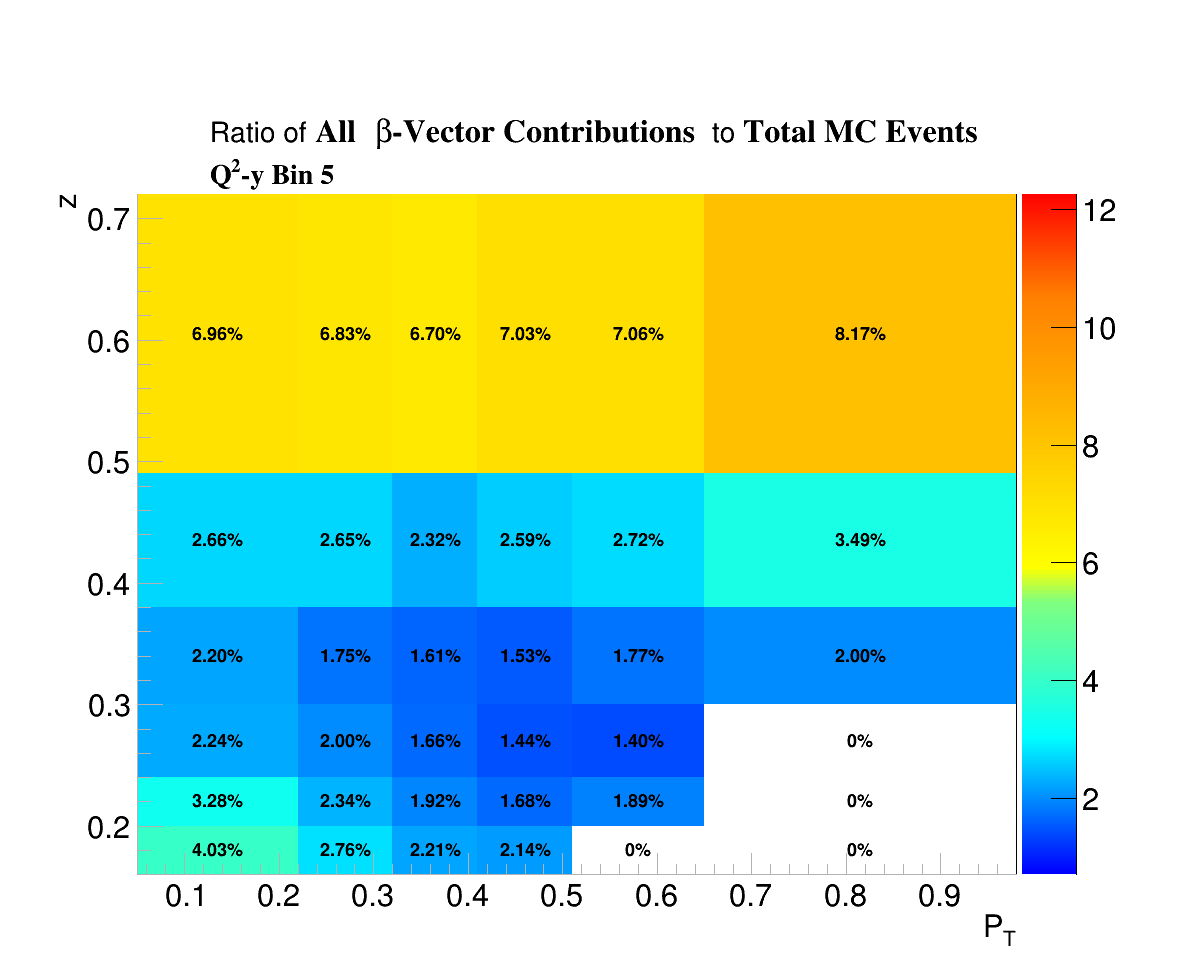

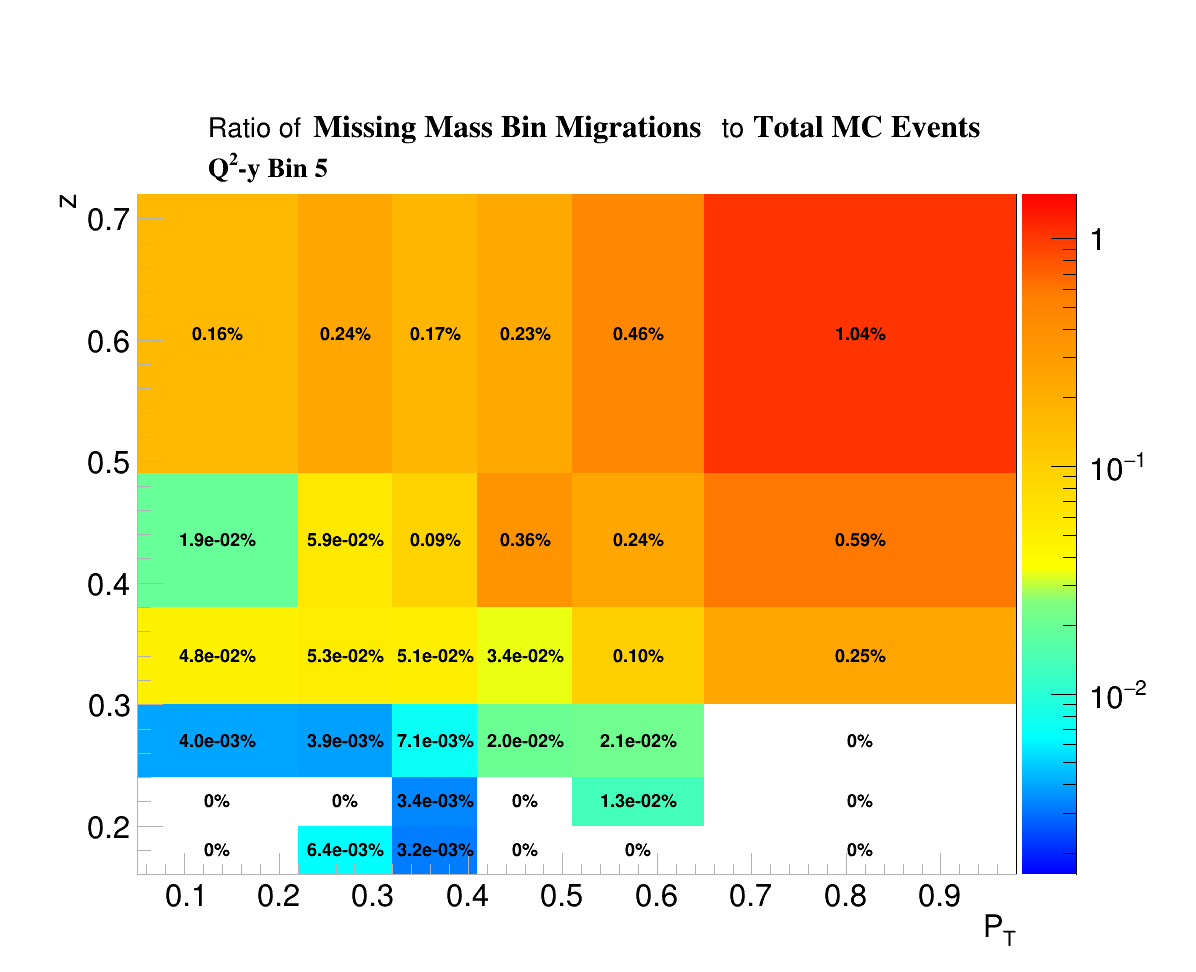

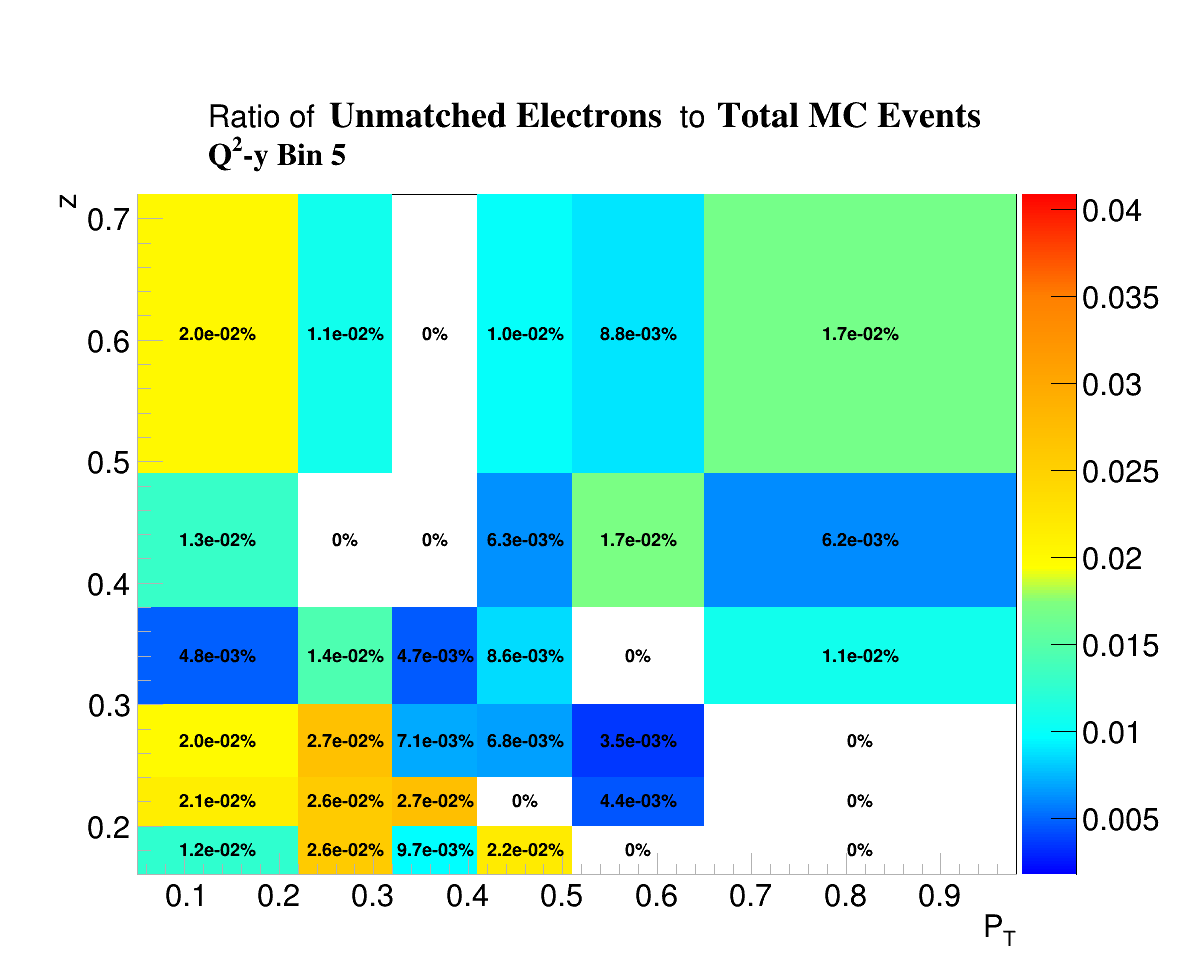

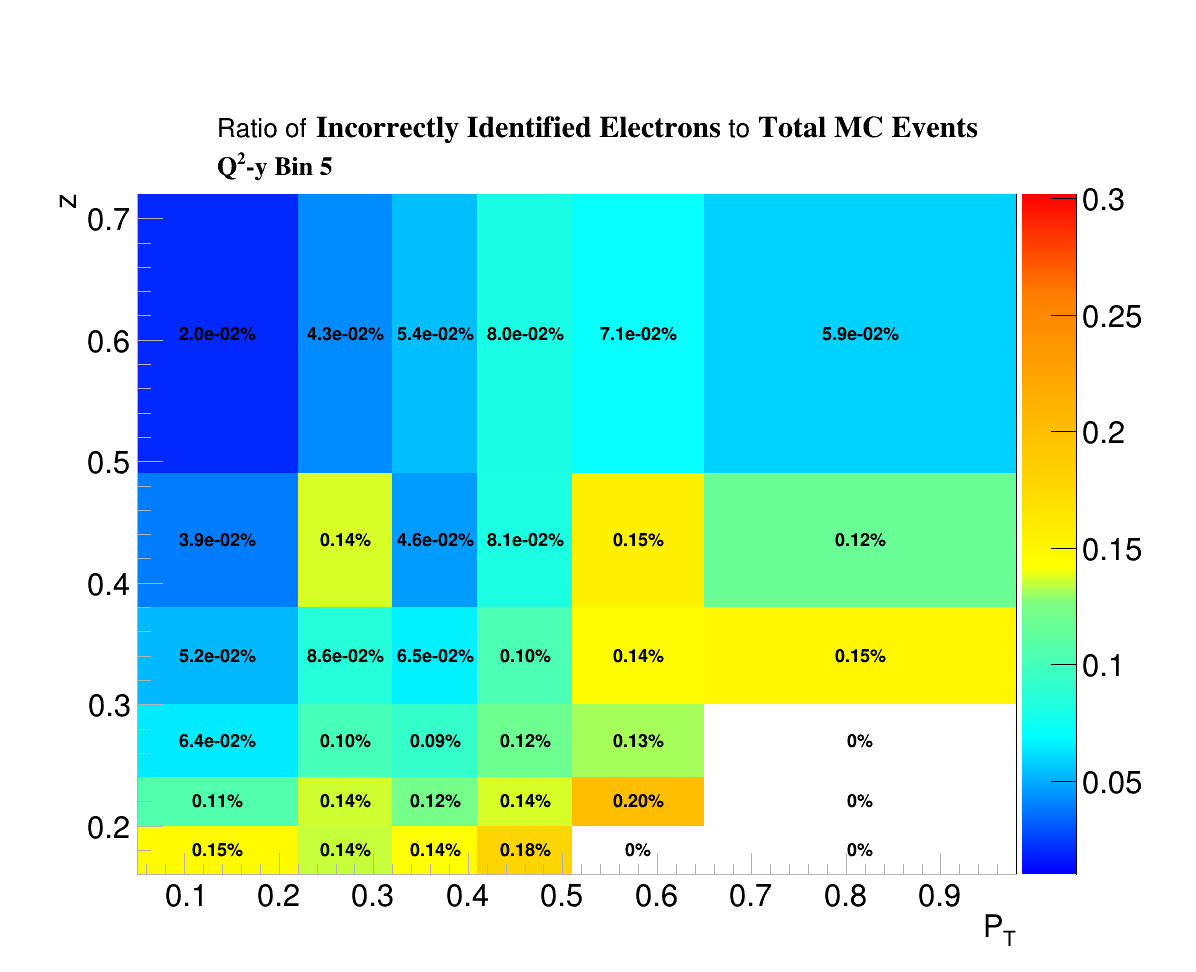

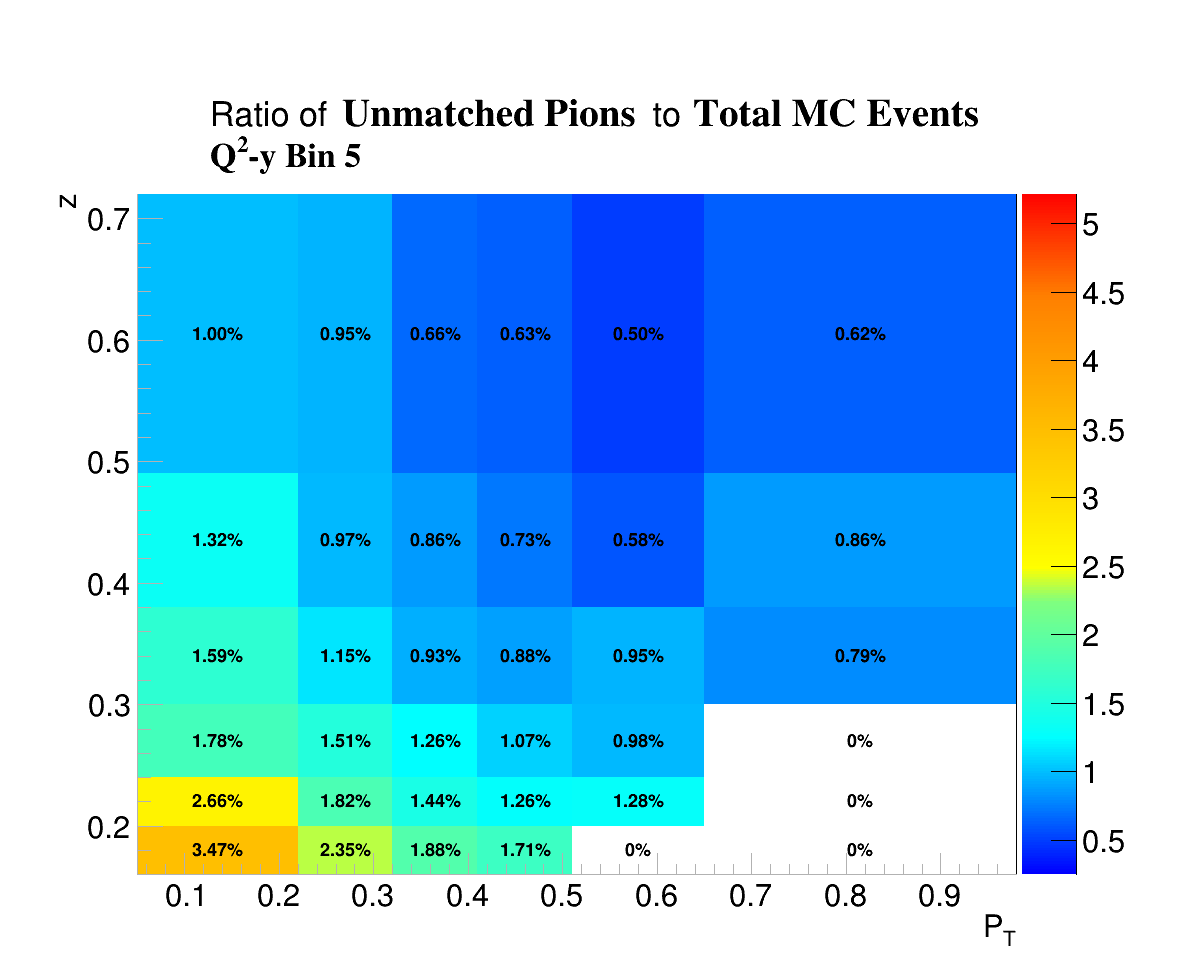

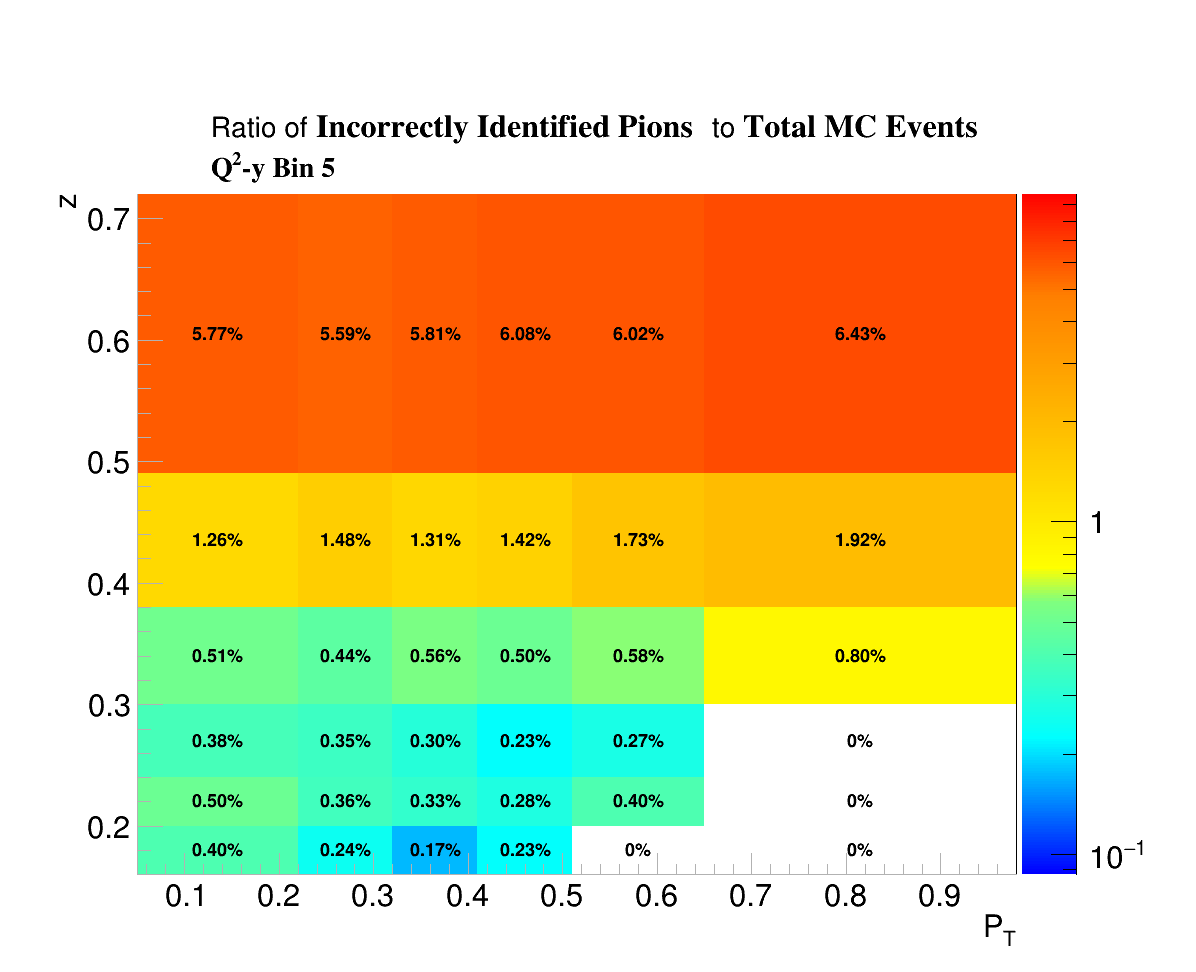

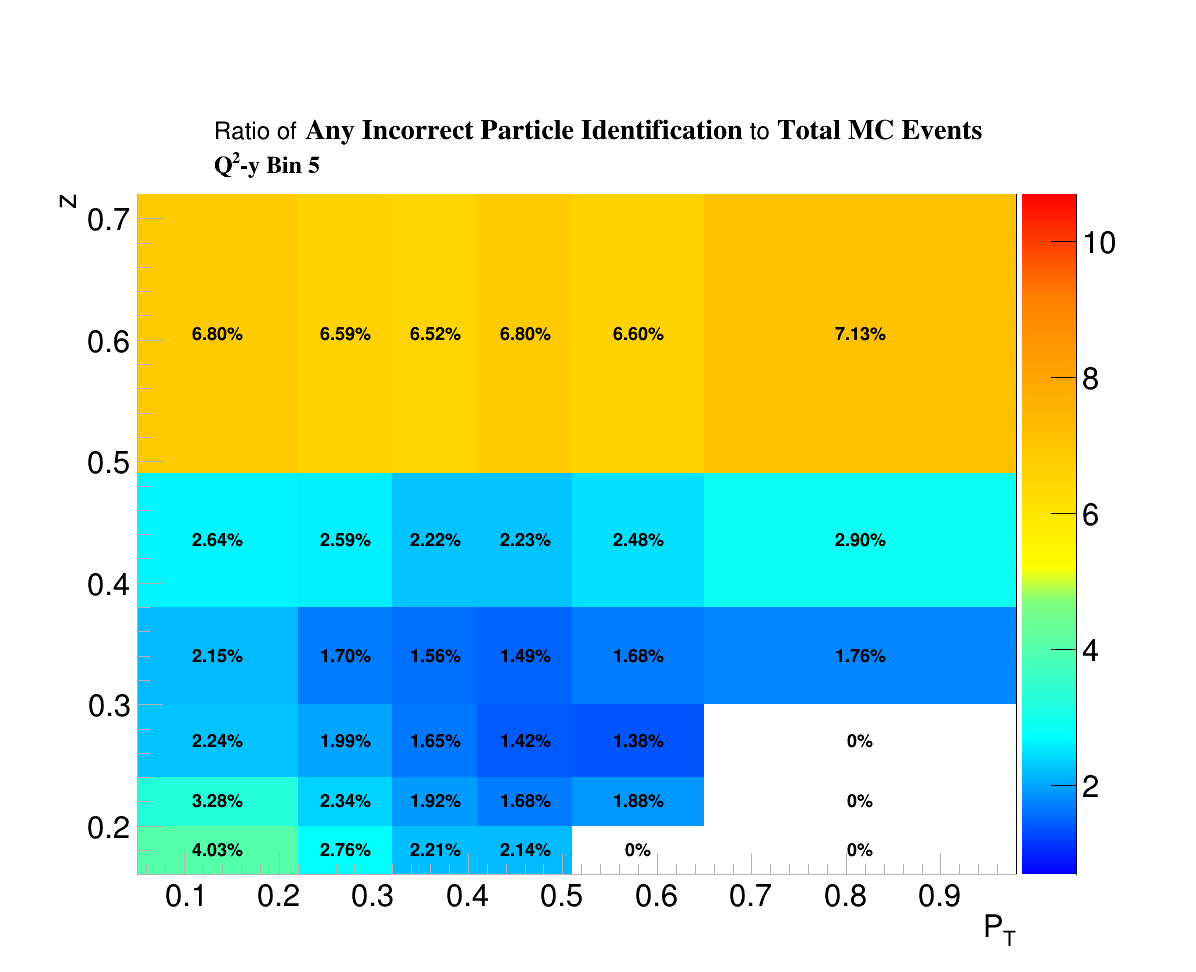

In [164]:
from array import array  # Correct import for the array
import copy
Background_Events = {}
Monte_CarloEvents = {}


# Define the positions where colors change
stops = array('d', [0.00, 0.10, 0.40, 0.50, 0.85, 1.00])
# Define the RGB components at each position
red   = array('d', [0.00, 0.00, 0.50, 1.00, 1.00, 1.00])
green = array('d', [0.00, 1.00, 1.00, 1.00, 0.70, 0.00])
blue  = array('d', [1.00, 1.00, 0.50, 0.00, 0.00, 0.00])

red   = array('d', [0.00, 0.00, 0.20, 1.00, 1.00, 1.00])
green = array('d', [0.00, 1.00, 1.50, 1.00, 0.70, 0.00])
blue  = array('d', [1.00, 1.00, 0.20, 0.00, 0.00, 0.00])

# Create the gradient
ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, 256)
ROOT.gStyle.SetNumberContours(256)

def choose_format(value):
    if((value < 0.09 or value > 100) and not (value == 0)):
        return "{:.1e}".format(value)  # Scientific notation
    else:
        return "{:.2f}".format(value)  # Fixed point notation

Monte_CarloEvents["Q2_y_Bin_5_row_1"] = [9938,           9285,      9259, 1.002e+04, 1.131e+04, 1.187e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_2"] = [1.542e+04, 1.532e+04, 1.507e+04,   1.6e+04, 1.748e+04, 1.623e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_3"] = [2.103e+04, 2.094e+04, 2.141e+04, 2.326e+04,  2.44e+04, 1.868e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_4"] = [2.499e+04, 2.596e+04, 2.819e+04, 2.936e+04, 2.817e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_5"] = [2.339e+04, 2.731e+04, 2.936e+04, 2.848e+04, 2.287e+04]
Monte_CarloEvents["Q2_y_Bin_5_row_6"] = [2.403e+04,  3.11e+04, 3.103e+04, 2.737e+04]

Background_Events["Q2_y_Bin_5_row_1_all_new_cuts"] = [585, 547, 529, 609, 689, 814]
Background_Events["Q2_y_Bin_5_row_2_all_new_cuts"] = [362, 340, 304, 366, 402, 491]
Background_Events["Q2_y_Bin_5_row_3_all_new_cuts"] = [398, 317, 308, 298, 351, 318]
Background_Events["Q2_y_Bin_5_row_4_all_new_cuts"] = [500, 447, 404, 362, 334]
Background_Events["Q2_y_Bin_5_row_5_all_new_cuts"] = [645, 544, 480, 420, 382]
Background_Events["Q2_y_Bin_5_row_6_all_new_cuts"] = [837, 733, 584, 507]

Background_Events["Q2_y_Bin_5_row_1_all"] = [692, 634, 620, 704, 798, 970]
Background_Events["Q2_y_Bin_5_row_2_all"] = [410, 406, 349, 415, 476, 567]
Background_Events["Q2_y_Bin_5_row_3_all"] = [463, 366, 345, 355, 433, 374]
Background_Events["Q2_y_Bin_5_row_4_all"] = [560, 518, 468, 423, 395]
Background_Events["Q2_y_Bin_5_row_5_all"] = [768, 639, 564, 478, 433]
Background_Events["Q2_y_Bin_5_row_6_all"] = [968, 859, 686, 585]


print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_1] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_1"])]))
print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_2] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_2"])]))
print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_3] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_3"])]))
print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_4] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_4"])]))
print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_5] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_5"])]))
print("".join(["Monte_CarloEvents[Q2_y_Bin_5_row_6] = ", str(Monte_CarloEvents["Q2_y_Bin_5_row_6"])]))

print("\n")

print("".join(["Background_Events[Q2_y_Bin_5_row_1_all] = ", str(Background_Events["Q2_y_Bin_5_row_1_all"])]))
print("".join(["Background_Events[Q2_y_Bin_5_row_2_all] = ", str(Background_Events["Q2_y_Bin_5_row_2_all"])]))
print("".join(["Background_Events[Q2_y_Bin_5_row_3_all] = ", str(Background_Events["Q2_y_Bin_5_row_3_all"])]))
print("".join(["Background_Events[Q2_y_Bin_5_row_4_all] = ", str(Background_Events["Q2_y_Bin_5_row_4_all"])]))
print("".join(["Background_Events[Q2_y_Bin_5_row_5_all] = ", str(Background_Events["Q2_y_Bin_5_row_5_all"])]))
print("".join(["Background_Events[Q2_y_Bin_5_row_6_all] = ", str(Background_Events["Q2_y_Bin_5_row_6_all"])]))

print("\n")


Background_Events["Q2_y_Bin_5_row_1_PID_ele_NoM"] = [2, 1, 0, 1, 1, 2]
Background_Events["Q2_y_Bin_5_row_2_PID_ele_NoM"] = [2, 0, 0, 1, 3, 1]
Background_Events["Q2_y_Bin_5_row_3_PID_ele_NoM"] = [1, 3, 1, 2, 0, 2]
Background_Events["Q2_y_Bin_5_row_4_PID_ele_NoM"] = [5, 7, 2, 2, 1]
Background_Events["Q2_y_Bin_5_row_5_PID_ele_NoM"] = [5, 7, 8, 0, 1]
Background_Events["Q2_y_Bin_5_row_6_PID_ele_NoM"] = [3, 8, 3, 6]


Background_Events["Q2_y_Bin_5_row_1_PID_ele_Mis"] = [2,   4,  5,  8,  8,  7]
Background_Events["Q2_y_Bin_5_row_2_PID_ele_Mis"] = [6,  21,  7, 13, 27, 19]
Background_Events["Q2_y_Bin_5_row_3_PID_ele_Mis"] = [11, 18, 14, 24, 35, 28]
Background_Events["Q2_y_Bin_5_row_4_PID_ele_Mis"] = [16, 26, 26, 35, 37]
Background_Events["Q2_y_Bin_5_row_5_PID_ele_Mis"] = [25, 37, 36, 39, 46]
Background_Events["Q2_y_Bin_5_row_6_PID_ele_Mis"] = [35, 42, 44, 49]


Background_Events["Q2_y_Bin_5_row_1_PID_pip_NoM"] = [99,   88,  61,  63,  56,  74]
Background_Events["Q2_y_Bin_5_row_2_PID_pip_NoM"] = [204, 149, 130, 116, 101, 139]
Background_Events["Q2_y_Bin_5_row_3_PID_pip_NoM"] = [334, 241, 200, 205, 232, 148]
Background_Events["Q2_y_Bin_5_row_4_PID_pip_NoM"] = [444, 393, 354, 313, 275]
Background_Events["Q2_y_Bin_5_row_5_PID_pip_NoM"] = [622, 497, 423, 360, 292]
Background_Events["Q2_y_Bin_5_row_6_PID_pip_NoM"] = [835, 731, 584, 467]

Background_Events["Q2_y_Bin_5_row_1_PID_pip_Mis"] = [573, 519, 538, 609, 681, 763]
Background_Events["Q2_y_Bin_5_row_2_PID_pip_Mis"] = [195, 227, 198, 227, 303, 312]
Background_Events["Q2_y_Bin_5_row_3_PID_pip_Mis"] = [107,  93, 119, 116, 142, 150]
Background_Events["Q2_y_Bin_5_row_4_PID_pip_Mis"] = [94,   91,  84,  67,  76]
Background_Events["Q2_y_Bin_5_row_5_PID_pip_Mis"] = [116,  98,  96,  79,  91]
Background_Events["Q2_y_Bin_5_row_6_PID_pip_Mis"] = [95,   76,  54,  63]

ROOT.gStyle.SetTitleOffset(1.05, 'y')

for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_5_row_{row}_PID"] = Background_Events[f"Q2_y_Bin_5_row_{row}_PID_ele_NoM"].copy()
    for source in ["_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis"]:
        for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])):
            Background_Events[f"Q2_y_Bin_5_row_{row}_PID"][column] += Background_Events[f"Q2_y_Bin_5_row_{row}{source}"][column]
    print("".join(["Background_Events[Q2_y_Bin_5_row_", str(row), "_PID] = ", str(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])]))
    
print("\n")
for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_5_row_{row}_MM"] = Background_Events[f"Q2_y_Bin_5_row_{row}_all"].copy()
    for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_PID"])):
        Background_Events[f"Q2_y_Bin_5_row_{row}_MM"][column] += -Background_Events[f"Q2_y_Bin_5_row_{row}_PID"][column]
    print("".join(["Background_Events[Q2_y_Bin_5_row_", str(row), "_MM] = ", str(Background_Events[f"Q2_y_Bin_5_row_{row}_MM"])]))
    

for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
    for row in range(1, 7):
        Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"] = Background_Events[f"Q2_y_Bin_5_row_{row}{BG_source}"].copy()
        for column in range(0, len(Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"])):
            Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"][column] = 100*(Background_Events[f"Q2_y_Bin_5_row_{row}_Ratio{BG_source}"][column]/Monte_CarloEvents[f"Q2_y_Bin_5_row_{row}"][column])

canvas, histo = {}, {}
t = {}
for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
# for BG_source in ["_MM"]:
    # Create a new TCanvas to draw the histogram
    canvas[f"canvas{BG_source}"] = ROOT.TCanvas(f"canvas{BG_source}", "6x6 Histogram Canvas", 1200, 1000)
    
    x_bin_edges = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 0.98]
    y_bin_edges = [0.16, 0.20, 0.24, 0.30, 0.38, 0.49, 0.72]
    
    
    Default_Title = "".join(["#scale[2]{#splitline{Ratio of #scale[1.15]{", str(root_color.Bold), "{SOURCE}} to #scale[1.15]{", str(root_color.Bold), "{Total MC Events}}}{", str(root_color.Bold), "{Q^{2}-y Bin 5}}};P_{T};z"])
    
    
    Default_Title = Default_Title.replace("SOURCE", "All #beta-Vector Contributions" if(BG_source in ["_all"]) else "Missing Mass Bin Migrations" if(BG_source in ["_MM"]) else "Any Incorrect Particle Identification" if(BG_source in ["_PID"]) else "".join(["Incorrectly Identified ", "Pions" if("pip" in BG_source) else "Electrons"]) if(BG_source in ["_PID_ele_Mis", "_PID_pip_Mis"]) else "".join(["Unmatched ", "Pions" if("pip" in BG_source) else "Electrons"]))

    Draw_Canvas(canvas=canvas[f"canvas{BG_source}"], cd_num=1, left_add=0.115, right_add=0.15, up_add=0.2, down_add=0.1)
    # Create a TH2D histogram with custom bin edges
    histo[f"histo{BG_source}"] = ROOT.TH2D(f"histo{BG_source}", Default_Title, len(x_bin_edges) - 1, array('d', x_bin_edges), len(y_bin_edges) - 1, array('d', y_bin_edges))


    min_bin_content = 100
    ave_of_BG = 0
    for ix in range(1, len(x_bin_edges)):
        for iy in range(1, len(y_bin_edges)):
            if(ix > len(Background_Events[f"Q2_y_Bin_5_row_{7-iy}_Ratio{BG_source}"])):
                continue
            x_center = 0.5 * (x_bin_edges[ix-1] + x_bin_edges[ix])
            y_center = 0.5 * (y_bin_edges[iy-1] + y_bin_edges[iy])
            # print(f"iy = {iy}\nix-1 = {ix-1}")
            value = Background_Events[f"Q2_y_Bin_5_row_{7-iy}_Ratio{BG_source}"][ix-1]
            ave_of_BG += value
            ave_of_BG *= 0.5
            if((value < min_bin_content) and (value not in [0])):
                min_bin_content = value
            histo[f"histo{BG_source}"].Fill(x_center, y_center, value)
    print(f"\n\nave_of_BG for histo{BG_source} = {round(ave_of_BG, 4)}%\n\n")
    # Draw the histogram
    histo[f"histo{BG_source}"].Draw("COLZ")  # Draw with color scale and bin values
    # Retrieve the minimum and maximum bin contents
    # min_bin_content = histo[f"histo{BG_source}"].GetMinimum()
    max_bin_content = histo[f"histo{BG_source}"].GetMaximum()

    # print(f"min_bin_content = {min_bin_content}")
    # print(f"max_bin_content/min_bin_content = {max_bin_content/min_bin_content}")
    
    # Set the range of the z-axis to the range of the data
    histo[f"histo{BG_source}"].GetZaxis().SetRangeUser(0.5*min_bin_content, 1.5*max_bin_content)
#     histo[f"histo{BG_source}"].GetZaxis().SetRangeUser(1e-10, 1e-05)
    if((max_bin_content/min_bin_content) > 10):
        ROOT.gPad.SetLogz(1)

    # Draw text manually based on the condition

    for ii in range(1, histo[f"histo{BG_source}"].GetNbinsX()+1):
        for jj in range(1, histo[f"histo{BG_source}"].GetNbinsY()+1):
            value = histo[f"histo{BG_source}"].GetBinContent(ii, jj)
            text  = choose_format(value)
            if(str(text) not in ["0.00", "0.000", "0.0000"]):
                t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), str(str(f"{text}%").replace("0e", "e")).replace(".e", ".0e"))
            else:
                t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), "0%")
            t[f"histo{BG_source}{ii}_{jj}"].SetTextAlign(22)  # Center alignment
            t[f"histo{BG_source}{ii}_{jj}"].SetTextSize(0.02)  # Set text size
            t[f"histo{BG_source}{ii}_{jj}"].Draw("same")  # Draw text on the canvas

    # Update the canvas to show the histogram
    canvas[f"canvas{BG_source}"].Update()
    canvas[f"canvas{BG_source}"].Draw()

Background_Events[Q2_y_Bin_14_row_1_all] = [732, 822, 713, 762, 886, 1018]
Background_Events[Q2_y_Bin_14_row_2_all] = [419, 492, 407, 389, 402, 481]
Background_Events[Q2_y_Bin_14_row_3_all] = [417, 356, 283, 269, 278, 301]
Background_Events[Q2_y_Bin_14_row_4_all] = [439, 417, 298, 260, 293]
Background_Events[Q2_y_Bin_14_row_5_all] = [629, 449, 393, 382, 317]
Background_Events[Q2_y_Bin_14_row_6_all] = [804, 585, 484, 483]


Background_Events[Q2_y_Bin_14_row_1_PID] = [598, 635, 527, 525, 500, 392]
Background_Events[Q2_y_Bin_14_row_2_PID] = [384, 453, 358, 333, 296, 262]
Background_Events[Q2_y_Bin_14_row_3_PID] = [412, 345, 268, 250, 231, 198]
Background_Events[Q2_y_Bin_14_row_4_PID] = [438, 416, 296, 250, 266]
Background_Events[Q2_y_Bin_14_row_5_PID] = [629, 447, 390, 371, 299]
Background_Events[Q2_y_Bin_14_row_6_PID] = [804, 584, 479, 476]


Background_Events[Q2_y_Bin_14_row_1_MM] = [134, 187, 186, 237, 386, 626]
Background_Events[Q2_y_Bin_14_row_2_MM] = [35, 39, 49, 56, 106, 219]
Backg

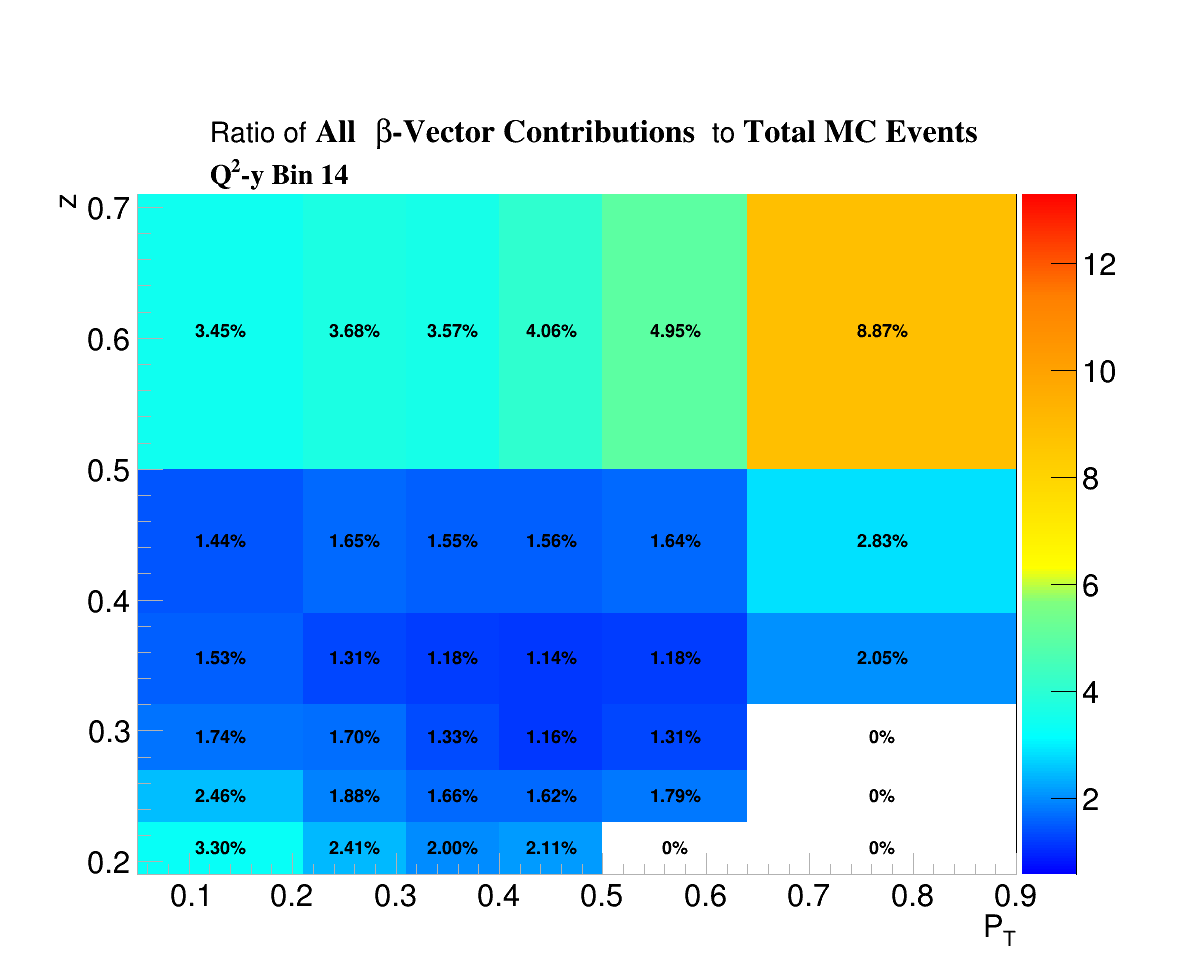

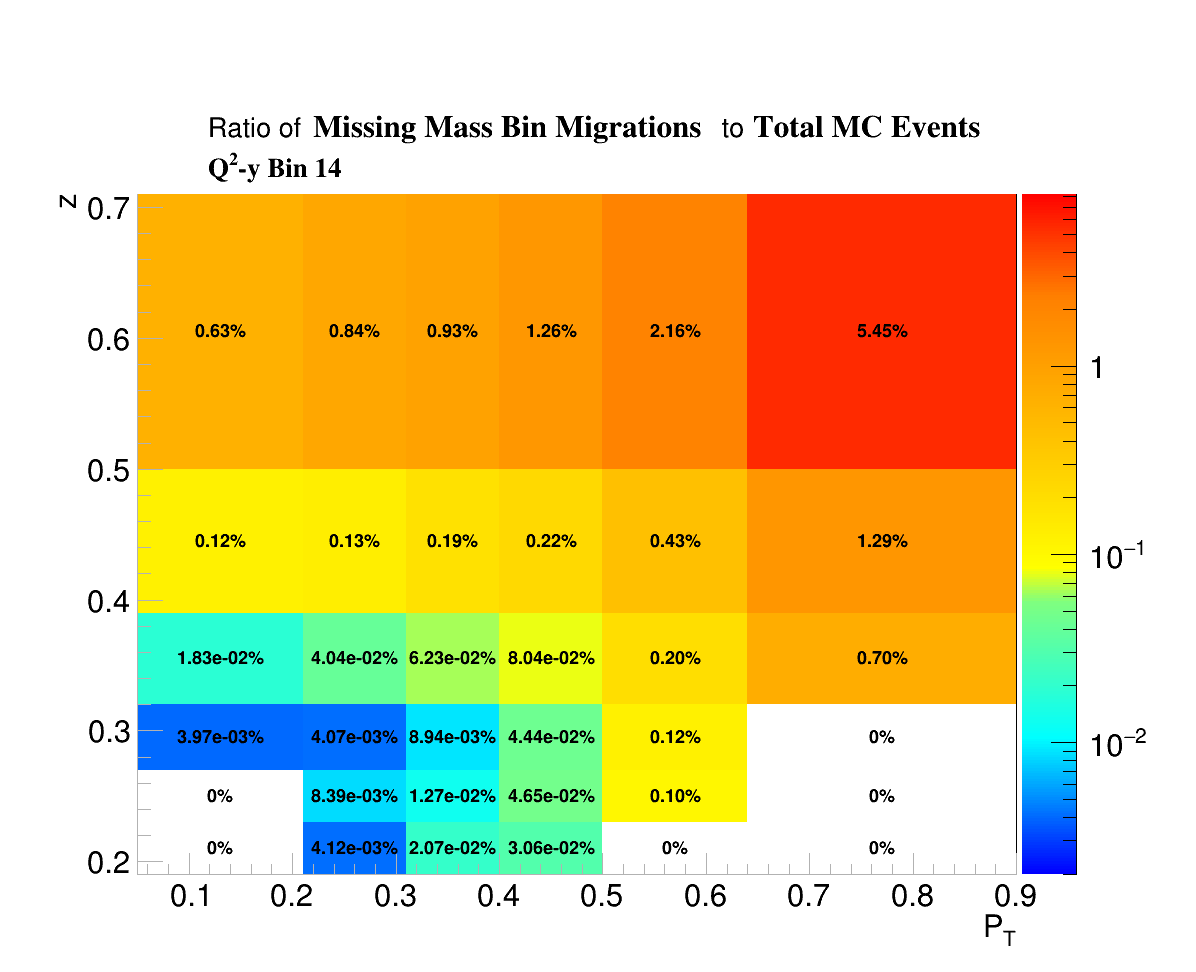

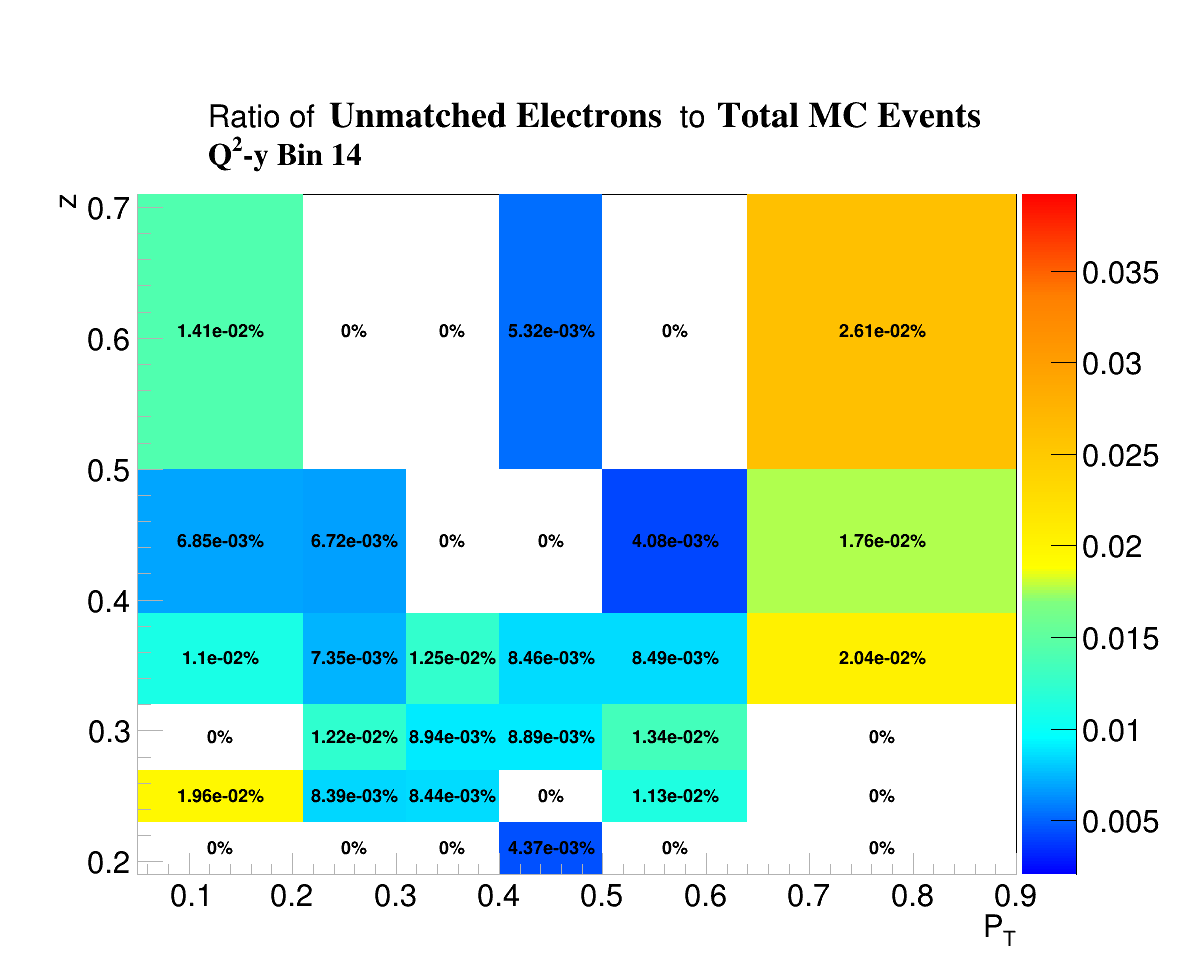

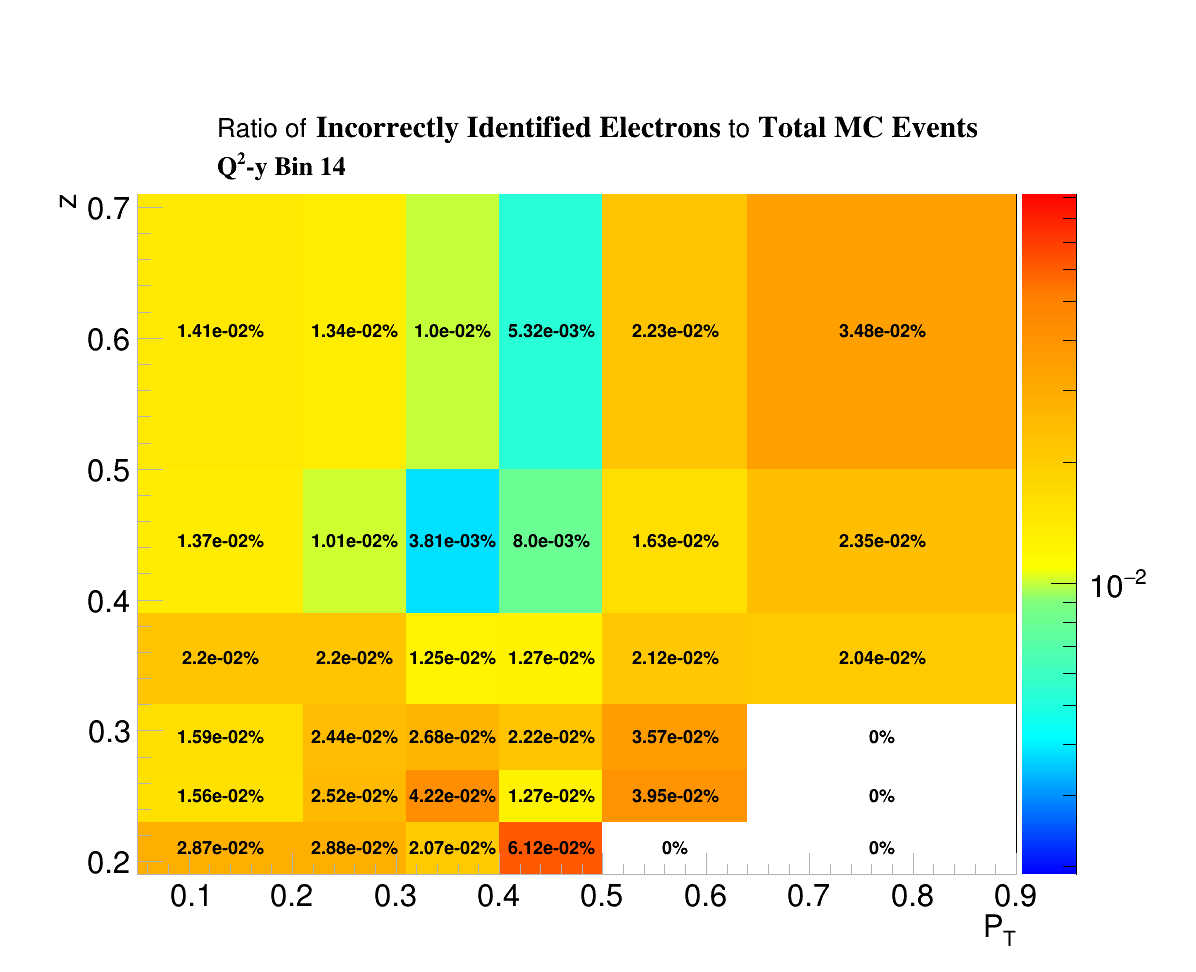

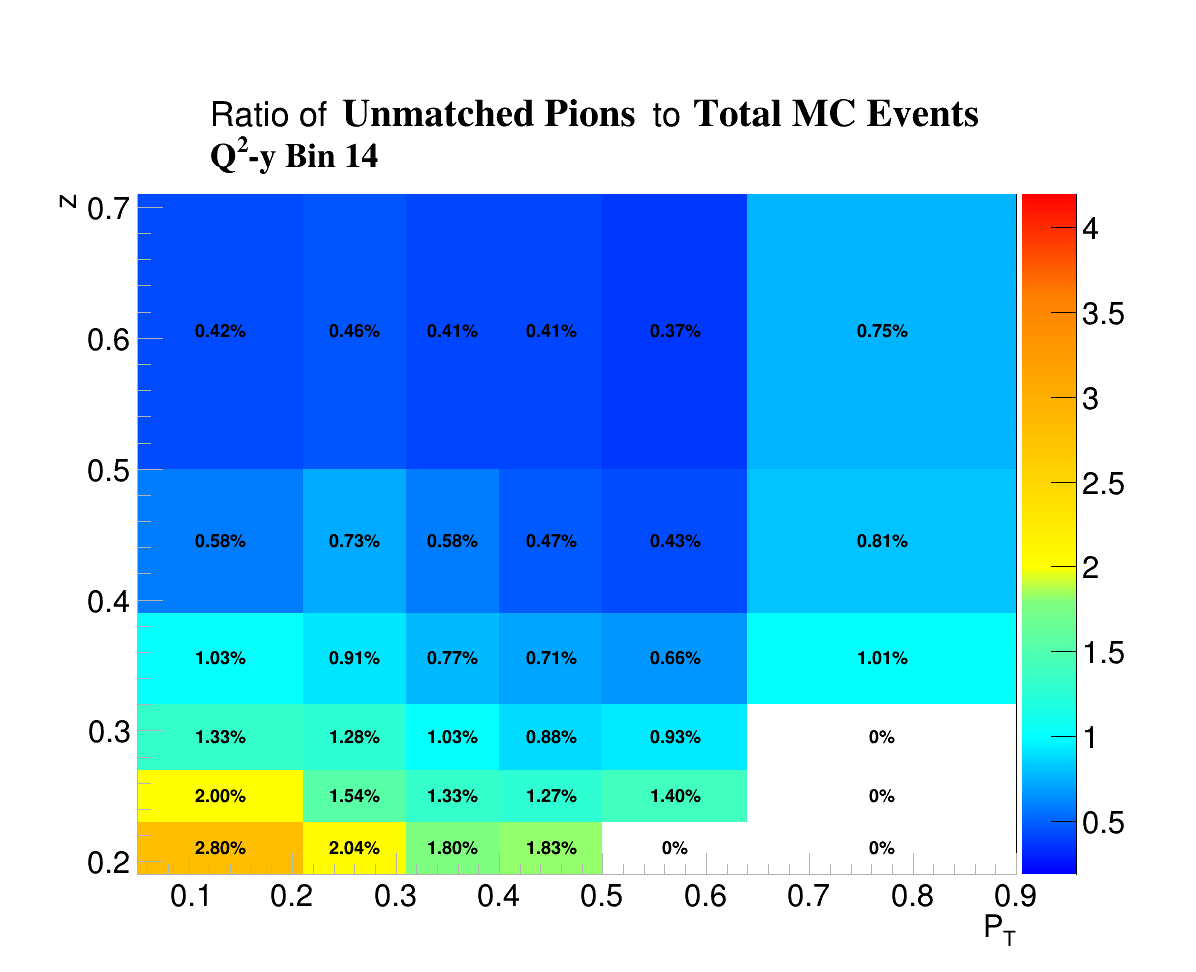

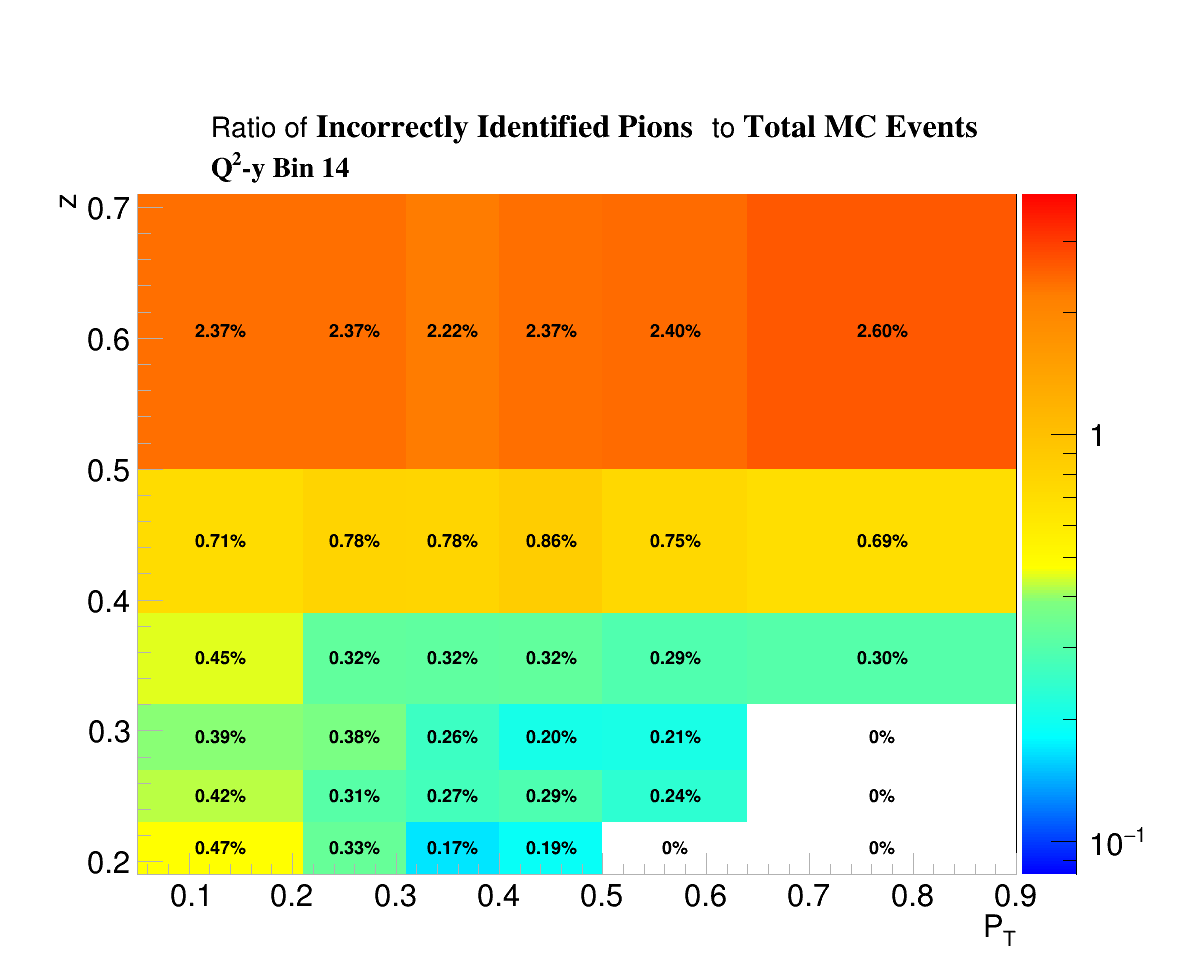

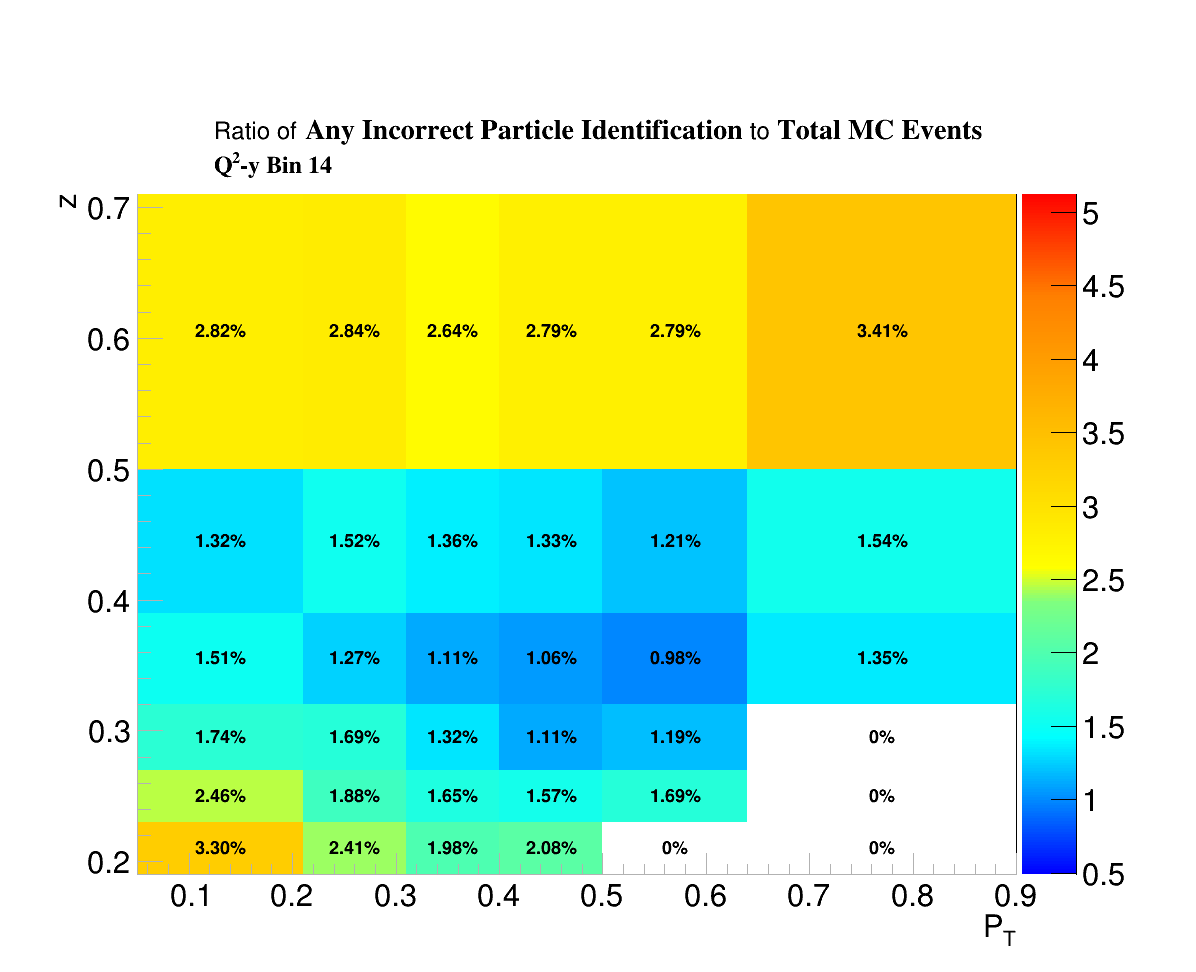

In [167]:
from array import array  # Correct import for the array
import copy

Background_Events = {}
Monte_CarloEvents = {}


# Define the positions where colors change
stops = array('d', [0.00, 0.10, 0.40, 0.50, 0.85, 1.00])
red   = array('d', [0.00, 0.00, 0.20, 1.00, 1.00, 1.00])
green = array('d', [0.00, 1.00, 1.50, 1.00, 0.70, 0.00])
blue  = array('d', [1.00, 1.00, 0.20, 0.00, 0.00, 0.00])

# Create the gradient
ROOT.TColor.CreateGradientColorTable(len(stops), stops, red, green, blue, 256)
ROOT.gStyle.SetNumberContours(256)

def choose_format(value):
    if((value < 0.09 or value > 100) and not (value == 0)):
        return "{:.2e}".format(value)  # Scientific notation
    else:
        return "{:.2f}".format(value)  # Fixed point notation

Monte_CarloEvents["Q2_y_Bin_14_row_1"]             = [2.122e+04, 2.234e+04, 1.999e+04, 1.879e+04, 1.791e+04, 1.148e+04]
Monte_CarloEvents["Q2_y_Bin_14_row_2"]             = [2.918e+04, 2.974e+04, 2.624e+04, 2.499e+04, 2.453e+04, 1.701e+04]
Monte_CarloEvents["Q2_y_Bin_14_row_3"]             = [2.725e+04, 2.722e+04, 2.406e+04, 2.364e+04, 2.357e+04, 1.468e+04]
Monte_CarloEvents["Q2_y_Bin_14_row_4"]             = [2.522e+04, 2.457e+04, 2.238e+04,  2.25e+04, 2.238e+04]
Monte_CarloEvents["Q2_y_Bin_14_row_5"]             = [2.557e+04, 2.383e+04, 2.369e+04, 2.364e+04, 1.771e+04]
Monte_CarloEvents["Q2_y_Bin_14_row_6"]             = [2.437e+04, 2.427e+04, 2.416e+04, 2.287e+04]

Background_Events["Q2_y_Bin_14_row_1_all"]         = [732, 822, 713, 762, 886, 1018]
Background_Events["Q2_y_Bin_14_row_2_all"]         = [419, 492, 407, 389, 402,  481]
Background_Events["Q2_y_Bin_14_row_3_all"]         = [417, 356, 283, 269, 278,  301]
Background_Events["Q2_y_Bin_14_row_4_all"]         = [439, 417, 298, 260, 293]
Background_Events["Q2_y_Bin_14_row_5_all"]         = [629, 449, 393, 382, 317]
Background_Events["Q2_y_Bin_14_row_6_all"]         = [804, 585, 484, 483]


print("".join(["Background_Events[Q2_y_Bin_14_row_1_all] = ", str(Background_Events["Q2_y_Bin_14_row_1_all"])]))
print("".join(["Background_Events[Q2_y_Bin_14_row_2_all] = ", str(Background_Events["Q2_y_Bin_14_row_2_all"])]))
print("".join(["Background_Events[Q2_y_Bin_14_row_3_all] = ", str(Background_Events["Q2_y_Bin_14_row_3_all"])]))
print("".join(["Background_Events[Q2_y_Bin_14_row_4_all] = ", str(Background_Events["Q2_y_Bin_14_row_4_all"])]))
print("".join(["Background_Events[Q2_y_Bin_14_row_5_all] = ", str(Background_Events["Q2_y_Bin_14_row_5_all"])]))
print("".join(["Background_Events[Q2_y_Bin_14_row_6_all] = ", str(Background_Events["Q2_y_Bin_14_row_6_all"])]))

print("\n")

Background_Events["Q2_y_Bin_14_row_1_PID_ele_NoM"] = [3, 0, 0, 1, 0, 3]
Background_Events["Q2_y_Bin_14_row_2_PID_ele_NoM"] = [2, 2, 0, 0, 1, 3]
Background_Events["Q2_y_Bin_14_row_3_PID_ele_NoM"] = [3, 2, 3, 2, 2, 3]
Background_Events["Q2_y_Bin_14_row_4_PID_ele_NoM"] = [0, 3, 2, 2, 3]
Background_Events["Q2_y_Bin_14_row_5_PID_ele_NoM"] = [5, 2, 2, 0, 2]
Background_Events["Q2_y_Bin_14_row_6_PID_ele_NoM"] = [0, 0, 0, 1]


Background_Events["Q2_y_Bin_14_row_1_PID_ele_Mis"] = [3, 3,  2,  1, 4, 4]
Background_Events["Q2_y_Bin_14_row_2_PID_ele_Mis"] = [4, 3,  1,  2, 4, 4]
Background_Events["Q2_y_Bin_14_row_3_PID_ele_Mis"] = [6, 6,  3,  3, 5, 3]
Background_Events["Q2_y_Bin_14_row_4_PID_ele_Mis"] = [4, 6,  6,  5, 8]
Background_Events["Q2_y_Bin_14_row_5_PID_ele_Mis"] = [4, 6, 10,  3, 7]
Background_Events["Q2_y_Bin_14_row_6_PID_ele_Mis"] = [7, 7,  5, 14]


Background_Events["Q2_y_Bin_14_row_1_PID_pip_NoM"] = [89,  103,  81,  77,  66,  86]
Background_Events["Q2_y_Bin_14_row_2_PID_pip_NoM"] = [170, 216, 153, 117, 106, 137]
Background_Events["Q2_y_Bin_14_row_3_PID_pip_NoM"] = [280, 249, 185, 169, 155, 148]
Background_Events["Q2_y_Bin_14_row_4_PID_pip_NoM"] = [335, 314, 230, 197, 208]
Background_Events["Q2_y_Bin_14_row_5_PID_pip_NoM"] = [512, 366, 314, 300, 248]
Background_Events["Q2_y_Bin_14_row_6_PID_pip_NoM"] = [682, 496, 434, 418]

Background_Events["Q2_y_Bin_14_row_1_PID_pip_Mis"] = [503, 529, 444, 446, 430, 299]
Background_Events["Q2_y_Bin_14_row_2_PID_pip_Mis"] = [208, 232, 204, 214, 185, 118]
Background_Events["Q2_y_Bin_14_row_3_PID_pip_Mis"] = [123,  88,  77,  76,  69,  44]
Background_Events["Q2_y_Bin_14_row_4_PID_pip_Mis"] = [99,   93,  58,  46,  47]
Background_Events["Q2_y_Bin_14_row_5_PID_pip_Mis"] = [108,  73,  64,  68,  42]
Background_Events["Q2_y_Bin_14_row_6_PID_pip_Mis"] = [115,  81,  40,  43]

ROOT.gStyle.SetTitleOffset(1.05, 'y')

for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_14_row_{row}_PID"] = Background_Events[f"Q2_y_Bin_14_row_{row}_PID_ele_NoM"].copy()
    for source in ["_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis"]:
        for column in range(0, len(Background_Events[f"Q2_y_Bin_14_row_{row}_PID"])):
            Background_Events[f"Q2_y_Bin_14_row_{row}_PID"][column] += Background_Events[f"Q2_y_Bin_14_row_{row}{source}"][column]
    print("".join(["Background_Events[Q2_y_Bin_14_row_", str(row), "_PID] = ", str(Background_Events[f"Q2_y_Bin_14_row_{row}_PID"])]))
    
print("\n")
for row in range(1, 7):
    Background_Events[f"Q2_y_Bin_14_row_{row}_MM"] = Background_Events[f"Q2_y_Bin_14_row_{row}_all"].copy()
    for column in range(0, len(Background_Events[f"Q2_y_Bin_14_row_{row}_PID"])):
        Background_Events[f"Q2_y_Bin_14_row_{row}_MM"][column] += -Background_Events[f"Q2_y_Bin_14_row_{row}_PID"][column]
    print("".join(["Background_Events[Q2_y_Bin_14_row_", str(row), "_MM] = ", str(Background_Events[f"Q2_y_Bin_14_row_{row}_MM"])]))
    
            
for BG_source in ["_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
    for row in range(1, 7):
        Background_Events[f"Q2_y_Bin_14_row_{row}_%BG{BG_source}"] = Background_Events[f"Q2_y_Bin_14_row_{row}{BG_source}"].copy()
        for column in range(0, len(Background_Events[f"Q2_y_Bin_14_row_{row}_%BG{BG_source}"])):
            if(Background_Events[f"Q2_y_Bin_14_row_{row}_all"][column] != 0):
                Background_Events[f"Q2_y_Bin_14_row_{row}_%BG{BG_source}"][column] = 100*(Background_Events[f"Q2_y_Bin_14_row_{row}_%BG{BG_source}"][column]/Background_Events[f"Q2_y_Bin_14_row_{row}_all"][column])
            else:
                Background_Events[f"Q2_y_Bin_14_row_{row}_%BG{BG_source}"][column] = 0

for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
    for row in range(1, 7):
        Background_Events[f"Q2_y_Bin_14_row_{row}_Ratio{BG_source}"] = Background_Events[f"Q2_y_Bin_14_row_{row}{BG_source}"].copy()
        for column in range(0, len(Background_Events[f"Q2_y_Bin_14_row_{row}_Ratio{BG_source}"])):
            Background_Events[f"Q2_y_Bin_14_row_{row}_Ratio{BG_source}"][column] = 100*(Background_Events[f"Q2_y_Bin_14_row_{row}_Ratio{BG_source}"][column]/Monte_CarloEvents[f"Q2_y_Bin_14_row_{row}"][column])
            

canvas, histo = {}, {}
t = {}
for BG_source in ["_all", "_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
# for BG_source in ["_MM"]:
    # Create a new TCanvas to draw the histogram
    canvas[f"canvas_tot{BG_source}"] = ROOT.TCanvas(f"canvas{BG_source}", "6x6 Histogram Canvas", 1200, 1000)
    
    x_bin_edges = [0.05, 0.21, 0.31, 0.40, 0.50, 0.64, 0.90]
    y_bin_edges = [0.19, 0.23, 0.27, 0.32, 0.39, 0.50, 0.71]
    
    # Default_Title = "".join(["#scale[2]{#splitline{Ratio of ", str(root_color.Bold), "{SOURCE} to Total MC Events}{Q^{2}-y Bin 14}};P_{T};z"])
    
    Default_Title = "".join(["#scale[2]{#splitline{Ratio of #scale[1.15]{", str(root_color.Bold), "{SOURCE}} to #scale[1.15]{", str(root_color.Bold), "{Total MC Events}}}{", str(root_color.Bold), "{Q^{2}-y Bin 14}}};P_{T};z"])
    
    Default_Title = Default_Title.replace("SOURCE", "All #beta-Vector Contributions" if(BG_source in ["_all"]) else "Missing Mass Bin Migrations" if(BG_source in ["_MM"]) else "Any Incorrect Particle Identification" if(BG_source in ["_PID"]) else "".join(["Incorrectly Identified ", "Pions" if("pip" in BG_source) else "Electrons"]) if(BG_source in ["_PID_ele_Mis", "_PID_pip_Mis"]) else "".join(["Unmatched ", "Pions" if("pip" in BG_source) else "Electrons"]))

    Draw_Canvas(canvas=canvas[f"canvas_tot{BG_source}"], cd_num=1, left_add=0.115, right_add=0.15, up_add=0.2, down_add=0.1)
    # Create a TH2D histogram with custom bin edges
    histo[f"histo_tot{BG_source}"] = ROOT.TH2D(f"histo_tot{BG_source}", Default_Title, len(x_bin_edges) - 1, array('d', x_bin_edges), len(y_bin_edges) - 1, array('d', y_bin_edges))


    min_bin_content = 100
    ave_of_BG = 0
    for ix in range(1, len(x_bin_edges)):
        for iy in range(1, len(y_bin_edges)):
            if(ix > len(Background_Events[f"Q2_y_Bin_14_row_{7-iy}_Ratio{BG_source}"])):
                continue
            x_center = 0.5 * (x_bin_edges[ix-1] + x_bin_edges[ix])
            y_center = 0.5 * (y_bin_edges[iy-1] + y_bin_edges[iy])
            # print(f"iy = {iy}\nix-1 = {ix-1}")
            value = Background_Events[f"Q2_y_Bin_14_row_{7-iy}_Ratio{BG_source}"][ix-1]
            ave_of_BG += value
            ave_of_BG *= 0.5
            if((value < min_bin_content) and (value not in [0])):
                min_bin_content = value
            histo[f"histo_tot{BG_source}"].Fill(x_center, y_center, value)
    print(f"\n\nave_of_BG for histo_tot{BG_source} = {round(ave_of_BG, 4)}%\n\n")
    # Draw the histogram
    histo[f"histo_tot{BG_source}"].Draw("COLZ")  # Draw with color scale and bin values
    # Retrieve the minimum and maximum bin contents
    # min_bin_content = histo[f"histo{BG_source}"].GetMinimum()
    max_bin_content = histo[f"histo_tot{BG_source}"].GetMaximum()

    # print(f"min_bin_content = {min_bin_content}")
    # print(f"max_bin_content/min_bin_content = {max_bin_content/min_bin_content}")
    
    # Set the range of the z-axis to the range of the data
    histo[f"histo_tot{BG_source}"].GetZaxis().SetRangeUser(0.5*min_bin_content, 1.5*max_bin_content)
#     histo[f"histo{BG_source}"].GetZaxis().SetRangeUser(1e-10, 1e-05)
    if((max_bin_content/min_bin_content) > 10):
        ROOT.gPad.SetLogz(1)

    # Draw text manually based on the condition

    for ii in range(1, histo[f"histo_tot{BG_source}"].GetNbinsX()+1):
        for jj in range(1, histo[f"histo_tot{BG_source}"].GetNbinsY()+1):
            value = histo[f"histo_tot{BG_source}"].GetBinContent(ii, jj)
            text  = choose_format(value)
            if(str(text) not in ["0.00", "0.000", "0.0000"]):
                t[f"histo_tot{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo_tot{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo_tot{BG_source}"].GetYaxis().GetBinCenter(jj), str(f"{text}%").replace("0e", "e"))
            else:
                t[f"histo_tot{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo_tot{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo_tot{BG_source}"].GetYaxis().GetBinCenter(jj), "0%")
            t[f"histo_tot{BG_source}{ii}_{jj}"].SetTextAlign(22)  # Center alignment
            t[f"histo_tot{BG_source}{ii}_{jj}"].SetTextSize(0.02)  # Set text size
            t[f"histo_tot{BG_source}{ii}_{jj}"].Draw("same")  # Draw text on the canvas

    # Update the canvas to show the histogram
    canvas[f"canvas_tot{BG_source}"].Update()
    canvas[f"canvas_tot{BG_source}"].Draw()
    
    
# for BG_source in ["_MM", "_PID_ele_NoM", "_PID_ele_Mis", "_PID_pip_NoM", "_PID_pip_Mis", "_PID"]:
#     canvas[f"canvas{BG_source}"] = ROOT.TCanvas(f"canvas{BG_source}", "6x6 Histogram Canvas", 1200, 1000)
#     x_bin_edges = [0.05, 0.21, 0.31, 0.40, 0.50, 0.64, 0.90]
#     y_bin_edges = [0.19, 0.23, 0.27, 0.32, 0.39, 0.50, 0.71]
#     Default_Title = "".join(["#scale[2]{#splitline{Ratio of ", str(root_color.Bold), "{SOURCE} to All #beta-Vector Contributions}{Q^{2}-y Bin 14}};P_{T};z"])
#     Default_Title = Default_Title.replace("SOURCE", "All #beta-Vector Contributions" if(BG_source in ["_all"]) else "Missing Mass Bin Migrations" if(BG_source in ["_MM"]) else "Any Incorrect Particle Identification" if(BG_source in ["_PID"]) else "".join(["Incorrectly Identified ", "Pions" if("pip" in BG_source) else "Electrons"]) if(BG_source in ["_PID_ele_Mis", "_PID_pip_Mis"]) else "".join(["Unmatched ", "Pions" if("pip" in BG_source) else "Electrons"]))
#     Draw_Canvas(canvas=canvas[f"canvas{BG_source}"], cd_num=1, left_add=0.115, right_add=0.15, up_add=0.2, down_add=0.1)
#     histo[f"histo{BG_source}"] = ROOT.TH2D(f"histo{BG_source}", Default_Title, len(x_bin_edges) - 1, array('d', x_bin_edges), len(y_bin_edges) - 1, array('d', y_bin_edges))
#     min_bin_content = 100
#     for ix in range(1, len(x_bin_edges)):
#         for iy in range(1, len(y_bin_edges)):
#             if(ix > len(Background_Events[f"Q2_y_Bin_14_row_{7-iy}_%BG{BG_source}"])):
#                 continue
#             x_center = 0.5 * (x_bin_edges[ix-1] + x_bin_edges[ix])
#             y_center = 0.5 * (y_bin_edges[iy-1] + y_bin_edges[iy])
#             value = Background_Events[f"Q2_y_Bin_14_row_{7-iy}_%BG{BG_source}"][ix-1]
#             if((value < min_bin_content) and (value not in [0])):
#                 min_bin_content = value
#             histo[f"histo{BG_source}"].Fill(x_center, y_center, value)
#     histo[f"histo{BG_source}"].Draw("COLZ")
#     max_bin_content = histo[f"histo{BG_source}"].GetMaximum()
#     histo[f"histo{BG_source}"].GetZaxis().SetRangeUser(0.5*min_bin_content, 1.5*max_bin_content)
#     if((max_bin_content/min_bin_content) > 10):
#         ROOT.gPad.SetLogz(1)
#     for ii in range(1, histo[f"histo{BG_source}"].GetNbinsX()+1):
#         for jj in range(1, histo[f"histo{BG_source}"].GetNbinsY()+1):
#             value = histo[f"histo{BG_source}"].GetBinContent(ii, jj)
#             text  = choose_format(value)
#             if(str(text) not in ["0.00", "0.000", "0.0000"]):
#                 t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), str(f"{text}%").replace("0e", "e"))
#             else:
#                 t[f"histo{BG_source}{ii}_{jj}"] = ROOT.TText(histo[f"histo{BG_source}"].GetXaxis().GetBinCenter(ii), histo[f"histo{BG_source}"].GetYaxis().GetBinCenter(jj), "0%")
#             t[f"histo{BG_source}{ii}_{jj}"].SetTextAlign(22)  # Center alignment
#             t[f"histo{BG_source}{ii}_{jj}"].SetTextSize(0.02)  # Set text size
#             t[f"histo{BG_source}{ii}_{jj}"].Draw("same")  # Draw text on the canvas
#     canvas[f"canvas{BG_source}"].Update()
#     canvas[f"canvas{BG_source}"].Draw()

.

.

.

.

.

# Sector Plots

In [3]:
BIN_NUM = 3
z_pT_Bin = 21
Z_BIN_VALUE_Title   = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][0][1], 3)
PT_BIN_VALUE_Title  = round(Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][1][1], 3)

# Z_BIN_VALUE_Title   = Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)
PT_BIN_VALUE_Title  = Find_Q2_y_z_pT_Bin_Stats(BIN_NUM, z_pT_Bin)[1][1]

print(f"Z_BIN_VALUE_Title = {Z_BIN_VALUE_Title}")
print(f"PT_BIN_VALUE_Title = {PT_BIN_VALUE_Title}")

Z_BIN_VALUE_Title = 0.305
PT_BIN_VALUE_Title = [0.3, 0.345, 0.39]


(current_max_val = -inf)  > (val = -0.344555899)
(current_max_val = -0.344555899)  > (val = -0.340380436)
(current_max_val = -0.340380436)  > (val = -0.313124546)
(current_max_val = -0.313124546)  > (val = -0.161805158)
(current_max_val = -inf)  > (val = -0.168982134)
(current_max_val = -inf)  > (val = -0.112389297)
(current_max_val = -inf)  > (val = -0.168198803)
(current_max_val = -0.168198803)  > (val = -0.167651827)
(current_max_val = -0.167651827)  > (val = -0.163211582)
(current_max_val = -inf)  > (val = -0.133371021)
(current_max_val = -inf)  > (val = -0.183929155)
(current_max_val = -0.183929155)  > (val = -0.132517514)
(current_max_val = -0.132517514)  > (val = -0.108769163)
Done


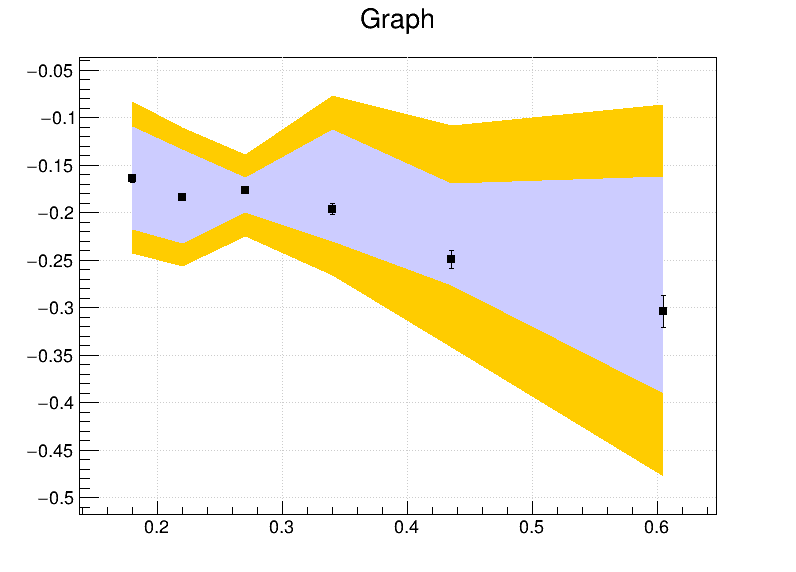

In [4]:
import ROOT
from array import array

sec_row_1 = [[-0.344555899, 0.05764255], [-0.39000778, 0.087570473], [-0.340380436, 0.078628067], [-0.313124546, 0.212872105], [-0.161805158, 0.075166423], [-0.327999056, 0.071595151]]
sec_row_2 = [[-0.168982134, 0.061178731], [-0.20090516, 0.046584174], [-0.276044312, 0.065567889], [-0.258925593, 0.047684522], [-0.243782771, 0.064520364], [-0.199594319, 0.060883046]]
sec_row_3 = [[-0.112389297, 0.035916794], [-0.165810776, 0.032811634], [-0.198804297, 0.036204591], [-0.145661209, 0.03969091], [-0.230208316, 0.035317671], [-0.191947555, 0.035919613]]
sec_row_4 = [[-0.168198803, 0.024304207], [-0.167651827, 0.024534972], [-0.186159388, 0.024573288], [-0.199991662, 0.025040797], [-0.163211582, 0.024215136], [-0.164250958, 0.025381046]]
sec_row_5 = [[-0.133371021, 0.023437075], [-0.197904118, 0.023945006], [-0.157839658, 0.024736965], [-0.184875982, 0.02431671], [-0.179047909, 0.02435955], [-0.232240853, 0.024690438]]
sec_row_6 = [[-0.183929155, 0.024058545], [-0.132517514, 0.025026459], [-0.108769163, 0.025406521], [-0.146692136, 0.024163906], [-0.167626211, 0.025510698], [-0.217534161, 0.025015711]]

y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = [], [], [], []

for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
    current_max_val = -float("inf")
    current_max_err = -float("inf")
    current_min_val =  float("inf")
    current_min_err =  float("inf")
    for val, err in row:
        if(current_max_val  < val):
            print(f"(current_max_val = {current_max_val})  > (val = {val})")
            current_max_val = val
            current_max_err = err
        if(current_min_val  > val):
            current_min_val = val
            current_min_err = err
    y_maxs_collect.append(current_max_val)
    y_max_errs_collect.append(current_max_err)
    y_mins_collect.append(current_min_val)
    y_min_errs_collect.append(current_min_err)
    
print("Done")

# Example data
# x_values = array('d', [round(Find_Q2_y_z_pT_Bin_Stats(3, 19)[1][1][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(3, 20)[1][1][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(3, 21)[1][1][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(3, 22)[1][1][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(3, 23)[1][1][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(3, 24)[1][1][1], 3)])

x_values = array('d', [round(Find_Q2_y_z_pT_Bin_Stats(5, 4)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 10)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 16)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 22)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 28)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 34)[1][0][1], 3)])
y_values = array('d', [-0.304084241, -0.249028999, -0.196325842, -0.176373477, -0.184120127, -0.164100447])
y_errs = array('d', [0.017112764, 0.009424743, 0.005753685, 0.00411877, 0.004002167, 0.004227009])
# y_mins = y_values # array('d', [9, 18, 27, 38, 47])
# y_maxs = y_values # array('d', [11, 22, 33, 42, 53])
# y_min_errs = y_errs # array('d', [0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
# y_max_errs = y_errs # array('d', [0.5, 0.5, 0.5, 0.5, 0.5, 0.5])


y_maxs     = array('d', y_maxs_collect)
y_max_errs = array('d', y_max_errs_collect)
y_mins     = array('d', y_mins_collect)
y_min_errs = array('d', y_min_errs_collect)


# Calculate asymmetric errors
y_err_low = array('d', [y - min_val for y, min_val in zip(y_values, y_mins)])
y_err_high = array('d', [max_val - y for y, max_val in zip(y_values, y_maxs)])
ext_err_low = array('d', [err + min_err for err, min_err in zip(y_err_low, y_min_errs)])
ext_err_high = array('d', [err + max_err for err, max_err in zip(y_err_high, y_max_errs)])

n_points = len(x_values)

# Create the graphs
tgraph_ext_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
tgraph_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low, y_err_high)
tgraph_errors = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_errs, y_errs)

# Configure canvas and drawing options
canvas = ROOT.TCanvas("canvas", "Graph with Extended Shaded Regions", 800, 600)

# Draw the extended shaded regions first
tgraph_ext_shaded.SetFillColor(ROOT.kOrange)
tgraph_ext_shaded.Draw("A3")

# Draw the initial shaded regions
tgraph_shaded.SetFillColor(ROOT.kBlue-10)
tgraph_shaded.Draw("3")

# Draw the central points with error bars
tgraph_errors.SetMarkerStyle(21)
tgraph_errors.SetMarkerSize(1)
tgraph_errors.SetLineColor(ROOT.kBlack)
tgraph_errors.SetMarkerColor(ROOT.kBlack)
tgraph_errors.Draw("P")

canvas.Draw()


# n_points = len(x_values)

# # Extend the x-range for the plot
# x_min = min(x_values) - 1
# x_max = max(x_values) + 1

# # Create a frame for drawing
# # canvas = ROOT.TCanvas("canvas", "Graph with Extended Shaded Regions", 800, 600)
# # frame = canvas.DrawFrame(x_min, 0, x_max, max(y_values) + 10)  # Adjust y-range as needed
# canvas = ROOT.TCanvas("canvas", "Graph with Extended Shaded Regions", 800, 600)

# canvas.Draw()
# # Create the graphs
# tgraph_ext_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
# tgraph_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low, y_err_high)
# tgraph_errors = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_errs, y_errs)

# # Draw the extended shaded regions first
# tgraph_ext_shaded.SetFillColor(ROOT.kOrange)
# tgraph_ext_shaded.Draw("3")

# # Draw the initial shaded regions
# tgraph_shaded.SetFillColor(ROOT.kBlue-10)
# tgraph_shaded.Draw("3 same")

# # Draw the central points with error bars
# tgraph_errors.SetMarkerStyle(21)
# tgraph_errors.SetMarkerSize(1)
# tgraph_errors.SetLineColor(ROOT.kBlack)
# tgraph_errors.SetMarkerColor(ROOT.kBlack)
# tgraph_errors.Draw("P same")

# canvas.Update()




In [5]:
print(str("""
sec_row_1 = [[-0.344555899	0.05764255]	[-0.39000778	0.087570473]	[-0.340380436	0.078628067]	[-0.313124546	0.212872105]	[-0.161805158	0.075166423]	[-0.327999056	0.071595151]]
sec_row_2 = [[-0.168982134	0.061178731]	[-0.20090516	0.046584174]	[-0.276044312	0.065567889]	[-0.258925593	0.047684522]	[-0.243782771	0.064520364]	[-0.199594319	0.060883046]]
sec_row_3 = [[-0.112389297	0.035916794]	[-0.165810776	0.032811634]	[-0.198804297	0.036204591]	[-0.145661209	0.03969091]	[-0.230208316	0.035317671]	[-0.191947555	0.035919613]]
sec_row_4 = [[-0.168198803	0.024304207]	[-0.167651827	0.024534972]	[-0.186159388	0.024573288]	[-0.199991662	0.025040797]	[-0.163211582	0.024215136]	[-0.164250958	0.025381046]]
sec_row_5 = [[-0.133371021	0.023437075]	[-0.197904118	0.023945006]	[-0.157839658	0.024736965]	[-0.184875982	0.02431671]	[-0.179047909	0.02435955]	[-0.232240853	0.024690438]]
sec_row_6 = [[-0.183929155	0.024058545]	[-0.132517514	0.025026459]	[-0.108769163	0.025406521]	[-0.146692136	0.024163906]	[-0.167626211	0.025510698]	[-0.217534161	0.025015711]]
""".replace("\t", ", ")))#.replace("\n", """
# ==================================================================================================================================\n"""))


sec_row_1 = [[-0.344555899, 0.05764255], [-0.39000778, 0.087570473], [-0.340380436, 0.078628067], [-0.313124546, 0.212872105], [-0.161805158, 0.075166423], [-0.327999056, 0.071595151]]
sec_row_2 = [[-0.168982134, 0.061178731], [-0.20090516, 0.046584174], [-0.276044312, 0.065567889], [-0.258925593, 0.047684522], [-0.243782771, 0.064520364], [-0.199594319, 0.060883046]]
sec_row_3 = [[-0.112389297, 0.035916794], [-0.165810776, 0.032811634], [-0.198804297, 0.036204591], [-0.145661209, 0.03969091], [-0.230208316, 0.035317671], [-0.191947555, 0.035919613]]
sec_row_4 = [[-0.168198803, 0.024304207], [-0.167651827, 0.024534972], [-0.186159388, 0.024573288], [-0.199991662, 0.025040797], [-0.163211582, 0.024215136], [-0.164250958, 0.025381046]]
sec_row_5 = [[-0.133371021, 0.023437075], [-0.197904118, 0.023945006], [-0.157839658, 0.024736965], [-0.184875982, 0.02431671], [-0.179047909, 0.02435955], [-0.232240853, 0.024690438]]
sec_row_6 = [[-0.183929155, 0.024058545], [-0.132517514, 0.025026459],

In [55]:
current_max_val = -float("inf")

print(current_max_val < -2)

True


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


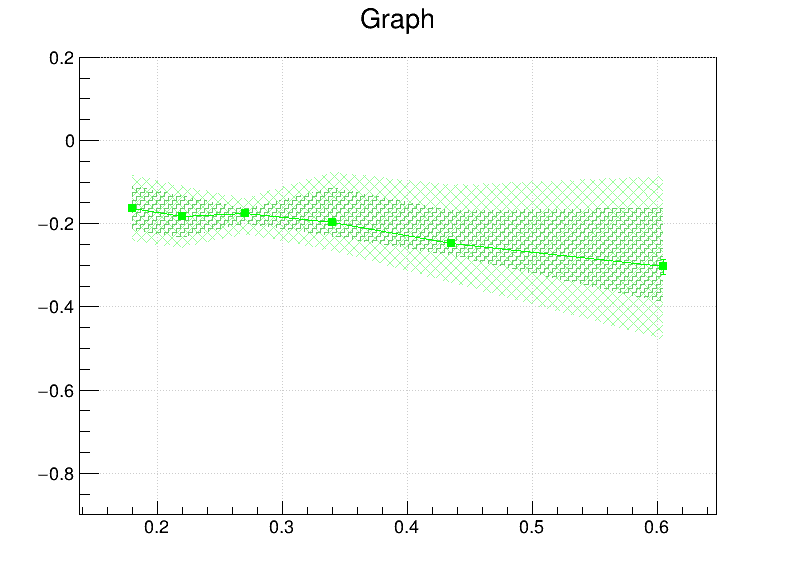

In [6]:
import ROOT
from array import array

# x_values = array('d', [round(Find_Q2_y_z_pT_Bin_Stats(5, 4)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 10)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 16)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 22)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 28)[1][0][1], 3), round(Find_Q2_y_z_pT_Bin_Stats(5, 34)[1][0][1], 3)])

# sec_row_1 = [[-0.344555899, 0.05764255],  [-0.39000778,  0.087570473], [-0.340380436, 0.078628067], [-0.313124546, 0.212872105], [-0.161805158, 0.075166423], [-0.327999056, 0.071595151]]
# sec_row_2 = [[-0.168982134, 0.061178731], [-0.20090516,  0.046584174], [-0.276044312, 0.065567889], [-0.258925593, 0.047684522], [-0.243782771, 0.064520364], [-0.199594319, 0.060883046]]
# sec_row_3 = [[-0.112389297, 0.035916794], [-0.165810776, 0.032811634], [-0.198804297, 0.036204591], [-0.145661209, 0.03969091],  [-0.230208316, 0.035317671], [-0.191947555, 0.035919613]]
# sec_row_4 = [[-0.168198803, 0.024304207], [-0.167651827, 0.024534972], [-0.186159388, 0.024573288], [-0.199991662, 0.025040797], [-0.163211582, 0.024215136], [-0.164250958, 0.025381046]]
# sec_row_5 = [[-0.133371021, 0.023437075], [-0.197904118, 0.023945006], [-0.157839658, 0.024736965], [-0.184875982, 0.02431671],  [-0.179047909, 0.02435955],  [-0.232240853, 0.024690438]]
# sec_row_6 = [[-0.183929155, 0.024058545], [-0.132517514, 0.025026459], [-0.108769163, 0.025406521], [-0.146692136, 0.024163906], [-0.167626211, 0.025510698], [-0.217534161, 0.025015711]]
# y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = [], [], [], []
# for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
#     current_max_val = -float("inf")
#     current_max_err = -float("inf")
#     current_min_val =  float("inf")
#     current_min_err =  float("inf")
#     for val, err in row:
#         if(current_max_val  < val):
#             current_max_val = val
#             current_max_err = err
#         if(current_min_val  > val):
#             current_min_val = val
#             current_min_err = err
#     y_maxs_collect.append(current_max_val)
#     y_max_errs_collect.append(current_max_err)
#     y_mins_collect.append(current_min_val)
#     y_min_errs_collect.append(current_min_err)
x_values     = array('d', [0.605, 0.435, 0.34, 0.27, 0.22, 0.18])
y_values     = array('d', [-0.304084241, -0.249028999, -0.196325842, -0.176373477, -0.184120127, -0.164100447])
y_errs       = array('d', [0.017112764,   0.009424743,  0.005753685,  0.00411877,   0.004002167,  0.004227009])
y_maxs       = array('d', y_maxs_collect)
y_max_errs   = array('d', y_max_errs_collect)
y_mins       = array('d', y_mins_collect)
y_min_errs   = array('d', y_min_errs_collect)
y_err_low    = array('d', [y - min_val   for y,   min_val in zip(y_values,   y_mins)])
y_err_high   = array('d', [max_val - y   for y,   max_val in zip(y_values,   y_maxs)])
ext_err_low  = array('d', [err + min_err for err, min_err in zip(y_err_low,  y_min_errs)])
ext_err_high = array('d', [err + max_err for err, max_err in zip(y_err_high, y_max_errs)])
n_points = len(x_values)
tgraph_ext_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
tgraph_shaded = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low, y_err_high)
tgraph_errors = ROOT.TGraphAsymmErrors(n_points, x_values, y_values, array('d', [0]*n_points), array('d', [0]*n_points), y_errs, y_errs)
canvas = ROOT.TCanvas("canvas", "Graph with Extended Shaded Regions", 800, 600)
# tgraph_ext_shaded.SetFillColor(ROOT.kOrange)
tgraph_ext_shaded.SetFillColor(ROOT.kGreen-9)
tgraph_ext_shaded.SetFillStyle(3344)
tgraph_ext_shaded.Draw("A3")
tgraph_ext_shaded.GetYaxis().SetRangeUser(-0.9, 0.2)
# tgraph_shaded.SetFillColor(ROOT.kBlue-10)
tgraph_shaded.SetFillStyle(3021)
tgraph_shaded.SetFillColor(ROOT.kGreen-6)
tgraph_shaded.Draw("3")
tgraph_errors.SetMarkerStyle(21)
tgraph_errors.SetMarkerSize(1)
tgraph_errors.SetLineColor(3)
tgraph_errors.SetMarkerColor(3)
tgraph_errors.Draw("PL")
canvas.Draw()

In [7]:
print(Find_Q2_y_z_pT_Bin_Stats(5, z_pT_Bin))
print(round(Find_Q2_y_z_pT_Bin_Stats(5, z_pT_Bin)[1][1][0], 3))

[[[2.4, 2.65, 2.9], [0.65, 0.7, 0.75]], [[0.24, 0.27, 0.3], [0.32, 0.365, 0.41]]]
0.32


In [8]:
bin_parameters = """
Fit_Parameters["(Bin 5-1)_(Parameter B)"] = [	-0.122784766	0.009950215	-2.60E-07	2.70E-07	-0.110385127	0.08232764	-0.093859625	0.070064939	-0.108249186	0.044048136	-0.096732917	0.046540774	-0.119436407	0.089505951]
Fit_Parameters["(Bin 5-1)_(Parameter C)"] = [	-0.012358374	9.21E-03	-4.00E-09	8.00E-09	-2.83E-12	5.30E-12	-4.57E-10	7.88E-10	-5.12E-12	3.75E-12	-0.080688188	0.03600326	-0.002899628	0.001882553]
Fit_Parameters["(Bin 5-2)_(Parameter B)"] = [	-0.2194483	0.012115446	-0.273008572	0.110805588	-0.221884609	0.073682438	-2.00E-09	4.00E-09	-0.043575304	0.024767655	-0.257770229	0.121037138	-0.148636568	0.102103675]
Fit_Parameters["(Bin 5-2)_(Parameter C)"] = [	0.00322851	0.005097444	-0.013002136	0.008282393	-0.011112363	0.007406839	0.100107083	0.037191121	0.092822785	0.069322745	0.02529296	0.036293506	0.055168595	0.032351863]
Fit_Parameters["(Bin 5-3)_(Parameter B)"] = [	-0.234731622	0.011753168	-0.221651425	0.061602855	-0.29561155	0.061433243	-0.118579658	0.101452058	-0.281086368	0.066541626	-0.229024219	0.154221931	-0.169299309	0.072285653]
Fit_Parameters["(Bin 5-3)_(Parameter C)"] = [	-0.010763847	0.006179969	-0.074999999	0.045434704	-0.019048898	0.012656183	0.029999999	0.019491084	0.029999999	0.019330631	-0.026163562	0.012658678	0.029999989	0.018105958]
Fit_Parameters["(Bin 5-4)_(Parameter B)"] = [	-0.304084241	0.017112764	-0.344555899	0.05764255	-0.39000778	0.087570473	-0.340380436	0.078628067	-0.313124546	0.212872105	-0.161805158	0.075166423	-0.327999056	0.071595151]
Fit_Parameters["(Bin 5-4)_(Parameter C)"] = [	-0.012260963	0.005842549	-0.075	0.041854697	0.025550662	0.018928736	0.010573364	0.016081971	-0.031011723	0.021186157	0.052499989	0.033100717	-0.038159372	0.019246041]
Fit_Parameters["(Bin 5-5)_(Parameter B)"] = [	-0.309180457	0.012067257	-0.173967263	0.07652863	-0.372261101	0.053041783	-0.24837014	0.056128401	-0.294088251	0.081878746	-0.263773225	0.079095915	-0.276946038	0.073890208]
Fit_Parameters["(Bin 5-5)_(Parameter C)"] = [	-0.02177138	0.008212516	-0.038942669	0.022394058	0.003513285	0.004960157	-0.044999996	0.029876289	0.004477558	0.002732896	0.072831949	0.054509847	-0.006454868	0.003683472]
Fit_Parameters["(Bin 5-6)_(Parameter B)"] = [	-0.379373371	0.007159575	-0.34371824	0.046989946	-0.240979766	0.055014961	-0.297051753	0.05223815	-0.382200767	0.056130947	-0.333833133	0.046133262	-0.320153061	0.058418096]
Fit_Parameters["(Bin 5-6)_(Parameter C)"] = [	0.022039542	0.006232225	0.005000001	0.00725154	0.148582056	0.04204928	0.069843692	0.051641369	0.041970357	0.027938462	0.005	0.008281613	0.049652298	0.035337232]
Fit_Parameters["(Bin 5-7)_(Parameter B)"] = [	-0.133947294	0.011158058	-0.029963626	0.019118999	-0.092087112	0.067373519	-0.102292738	0.073052193	-0.149193406	0.097204492	-0.136716063	0.112149636	-0.112080498	0.046659933]
Fit_Parameters["(Bin 5-7)_(Parameter C)"] = [	-0.036703672	0.008426144	-0.050159439	0.0330332	-5.08E-12	6.67E-12	-1.33E-11	2.13E-11	-0.104787087	0.069186992	-0.03988112	0.062066254	-1.30E-11	1.39E-11]
Fit_Parameters["(Bin 5-8)_(Parameter B)"] = [	-0.230389062	0.015756777	-0.195007106	0.11373011	-0.197351003	0.080501149	-0.05521464	0.040161138	-0.245665354	0.050362253	-0.026671853	0.036841195	-0.246200875	0.051318977]
Fit_Parameters["(Bin 5-8)_(Parameter C)"] = [	-0.051500374	0.028342923	-0.073072012	0.02577663	-0.052771964	0.028861507	-0.019222545	0.014399353	-0.061480208	0.039060647	0.120801	0.030996583	-0.004517395	0.001521867]
Fit_Parameters["(Bin 5-9)_(Parameter B)"] = [	-0.186377302	0.014109241	-0.248720058	0.079834274	-0.169220613	0.12111708	-0.219352272	0.053647753	-0.129874248	0.096549316	-0.168364037	0.052218401	-0.158725729	0.065666228]
Fit_Parameters["(Bin 5-9)_(Parameter C)"] = [	-0.009922203	0.007229192	-6.06E-02	4.15E-02	-0.031810608	0.021212077	0.029999945	0.019991434	-0.019977563	0.010263169	0.03	0.015502702	0.021121142	0.012888739]
Fit_Parameters["(Bin 5-10)_(Parameter B)"] = [	-0.249028999	0.009424743	-0.168982134	0.061178731	-0.20090516	0.046584174	-0.276044312	0.065567889	-0.258925593	0.047684522	-0.243782771	0.064520364	-0.199594319	0.060883046]
Fit_Parameters["(Bin 5-10)_(Parameter C)"] = [	-0.040305639	0.007606523	-0.037084393	0.04310831	0.052499999	0.034970642	-0.063068175	0.030890182	-0.024999975	0.048666521	-0.041134284	0.040866936	-0.028382132	0.035126953]
Fit_Parameters["(Bin 5-11)_(Parameter B)"] = [	-0.286641831	0.006630969	-0.179874303	0.039957882	-0.287997039	0.036619173	-0.20655492	0.040978063	-0.361036709	0.041633778	-0.242779977	0.043274844	-0.297327048	0.041487893]
Fit_Parameters["(Bin 5-11)_(Parameter C)"] = [	-0.03410467	0.006023571	0.001565954	0.000971727	-0.044999999	0.024800104	0.060009006	0.04461985	-0.032732126	0.01837285	-0.0261102	0.013165136	-0.034356455	0.018369571]
Fit_Parameters["(Bin 5-12)_(Parameter B)"] = [	-0.391475615	0.005311826	-0.373245479	0.029339482	-0.391272844	0.035858505	-0.371340608	0.033083393	-0.375515586	0.033595996	-0.408487323	0.031444083	-0.393505052	0.03249088]
Fit_Parameters["(Bin 5-12)_(Parameter C)"] = [	0.082336425	0.005161721	0.005000003	0.005330585	0.182595663	0.031462405	0.048453147	0.036197731	0.078277308	0.028798073	0.057125663	0.041390347	0.106527222	0.029829971]
Fit_Parameters["(Bin 5-13)_(Parameter B)"] = [	-0.116755884	0.011567395	-6.00E-09	1.20E-08	-0.140529641	0.105221319	-0.165052937	0.102938751	-0.149163932	0.110848164	-0.139981938	0.101632385	-0.198326823	0.041257595]
Fit_Parameters["(Bin 5-13)_(Parameter C)"] = [	-0.038135784	0.008268323	-0.047906685	0.035372244	-0.006894508	0.003856629	-0.049669742	0.026824307	-0.044633516	0.02427437	-0.060491458	0.04474814	-0.104999963	0.052484607]
Fit_Parameters["(Bin 5-14)_(Parameter B)"] = [	-0.150423578	0.01302987	-0.094854263	0.063586065	-0.279838388	0.045215518	-0.087485454	0.056109375	-0.203921196	0.047165337	-0.201506699	0.050161018	-0.153880435	0.114715645]
Fit_Parameters["(Bin 5-14)_(Parameter C)"] = [	-0.042025616	0.008615293	-0.066715008	0.045740716	0.022929699	0.035674271	-0.026650129	0.019731784	-0.074999998	0.045180593	-0.074999997	0.04695479	-0.024985283	0.017648854]
Fit_Parameters["(Bin 5-15)_(Parameter B)"] = [	-0.117548956	0.008081244	-0.154646738	0.058093319	-0.127742633	0.039925851	-0.161999321	0.041145663	-0.152013272	0.055163224	-0.193612449	0.052987098	-0.091227069	0.035592756]
Fit_Parameters["(Bin 5-15)_(Parameter C)"] = [	-0.007083038	0.005231802	-0.040177781	0.042310273	-0.003348423	0.006452759	-0.024999997	0.035707528	-0.036473679	0.04414678	-0.066487057	0.033452493	-0.00378229	0.006217353]
Fit_Parameters["(Bin 5-16)_(Parameter B)"] = [	-0.196325842	0.005753685	-0.112389297	0.035916794	-0.165810776	0.032811634	-0.198804297	0.036204591	-0.145661209	0.03969091	-0.230208316	0.035317671	-0.191947555	0.035919613]
Fit_Parameters["(Bin 5-16)_(Parameter C)"] = [	-0.030610191	5.35E-03	0.005786884	0.003451237	0.052499986	0.023604104	-0.038217422	0.028070091	-0.01080198	0.006821966	-0.043303637	0.032463255	-0.069312437	0.035651712]
Fit_Parameters["(Bin 5-17)_(Parameter B)"] = [	-0.232891417	0.004581572	-0.182435618	0.027641276	-0.262703184	0.02820838	-0.208338226	0.026611986	-0.292807252	0.026537101	-0.298241711	0.025982835	-0.155301984	0.028480178]
Fit_Parameters["(Bin 5-17)_(Parameter C)"] = [	0.029695396	0.00445177	0.052178938	0.03728156	0.053914778	0.038445385	-0.012489948	0.009296196	0.012574428	0.009117849	0.021328668	0.013674788	0.049371595	0.035193148]
Fit_Parameters["(Bin 5-18)_(Parameter B)"] = [	-0.37844766	0.005048642	-0.363222511	0.030025544	-0.368197834	0.031185222	-0.377204067	0.030334409	-0.352104679	0.029745328	-0.443136925	0.029331723	-0.351548539	0.030814023]
Fit_Parameters["(Bin 5-18)_(Parameter C)"] = [	0.112595051	0.004912075	1.12E-01	2.90E-02	0.153179676	0.028479443	0.124307523	0.027712726	0.045647969	0.033852804	0.108587793	0.02804772	0.120777718	0.028429941]
Fit_Parameters["(Bin 5-19)_(Parameter B)"] = [	-0.170993732	0.011942676	-0.162505387	0.060460661	-0.158654101	0.041263214	-0.174747281	0.077268135	-0.202595411	0.040628579	-0.184275008	0.092885153	-0.083466943	0.094447871]
Fit_Parameters["(Bin 5-19)_(Parameter C)"] = [	-0.073877984	0.008348911	-0.105	0.048876963	-1.60E-13	9.90E-14	-0.096752343	0.056792698	-0.104999987	0.059463138	-0.078904284	0.044330726	-0.034999987	0.035276388]
Fit_Parameters["(Bin 5-20)_(Parameter B)"] = [	-0.102727079	0.007908231	-3.00E-09	4.00E-09	-0.124874889	0.088893724	-0.229493959	0.03760226	-0.170528345	0.049897242	-0.138678356	0.048422439	-0.001652645	0.00107311]
Fit_Parameters["(Bin 5-20)_(Parameter C)"] = [	-0.018035459	0.005763146	-0.002436858	0.001516887	0.003981227	0.00257107	-0.075	0.041448732	-0.043310994	0.031932784	-0.047017006	0.035014522	0.047521825	0.035547493]
Fit_Parameters["(Bin 5-21)_(Parameter B)"] = [	-0.142421971	0.005268439	-0.073543751	0.027817384	-0.144885453	0.032508418	-0.120840374	0.032977074	-0.139794358	0.034012819	-0.16237149	0.02876754	-0.088123048	0.02851162]
Fit_Parameters["(Bin 5-21)_(Parameter C)"] = [	-0.043355586	0.005047804	-0.008571446	0.013342612	-0.011977221	0.00741922	-0.055384662	0.034804637	-0.016030729	0.011226233	-0.075	0.029178186	-0.003623883	0.004536996]
Fit_Parameters["(Bin 5-22)_(Parameter B)"] = [	-0.176373477	0.00411877	-0.168198803	0.024304207	-0.167651827	0.024534972	-0.186159388	0.024573288	-0.199991662	0.025040797	-0.163211582	0.024215136	-0.164250958	0.025381046]
Fit_Parameters["(Bin 5-22)_(Parameter C)"] = [	0.008476963	0.003466893	0.00371215	0.002396943	0.002002584	0.001328559	0.003357004	0.002172727	0.002119271	0.001453714	-0.002987776	0.002162023	0.04986406	0.033573284]
Fit_Parameters["(Bin 5-23)_(Parameter B)"] = [	-0.238126039	0.004134672	-0.210279834	0.024292552	-0.240299783	0.024819523	-0.243426483	0.025085999	-0.220990741	0.025058536	-0.289791298	0.024193699	-0.223851669	0.025659238]
Fit_Parameters["(Bin 5-23)_(Parameter C)"] = [	0.040817286	0.004068837	0.012358868	0.008738284	0.028539615	0.021283305	0.042346189	0.03091272	0.043847411	0.031766546	0.033054439	0.024770766	0.097312038	0.022326175]
Fit_Parameters["(Bin 5-25)_(Parameter B)"] = [	-0.180669331	0.007421719	-0.142894357	0.087682798	-0.10912124	0.042498872	-0.116549362	0.075203272	-0.223520722	0.14921974	-0.20752268	0.038209681	-0.123277887	0.089378362]
Fit_Parameters["(Bin 5-25)_(Parameter C)"] = [	-0.104999999	0.002950779	-0.104999978	0.045015149	-3.89E-10	3.92E-10	-0.10499998	0.043212284	-0.09892488	0.054723287	-0.104999992	0.047796284	-0.071777223	0.050892753]
Fit_Parameters["(Bin 5-26)_(Parameter B)"] = [	-0.113022546	0.005864943	-0.044931776	0.033692399	-0.205243421	0.029495053	-0.089997778	0.031448782	-0.026218982	0.015320484	-0.151341772	0.033831548	-0.085860025	0.032210534]
Fit_Parameters["(Bin 5-26)_(Parameter C)"] = [	-0.041474994	0.005399077	-0.042655279	0.031994231	-0.074999999	0.043240972	-0.032263296	0.023397895	0.047371893	0.035296398	-0.057469971	0.033550934	-0.038564922	0.028759968]
Fit_Parameters["(Bin 5-27)_(Parameter B)"] = [	-0.148342517	0.004070139	-0.092239142	0.023970348	-0.155733735	0.024727504	-0.114815539	0.024075818	-0.135083863	0.024361108	-0.168306542	0.022968171	-0.200314732	0.024856009]
Fit_Parameters["(Bin 5-27)_(Parameter C)"] = [	-0.014770494	0.003895867	-0.003489041	0.002368396	0.012556641	0.008645455	-0.027891617	0.020655365	-0.015389175	0.007980555	-0.075	0.045228753	0.019744148	0.012441845]
Fit_Parameters["(Bin 5-28)_(Parameter B)"] = [	-0.184120127	0.004002167	-0.133371021	0.023437075	-0.197904118	0.023945006	-0.157839658	0.024736965	-0.184875982	0.02431671	-0.179047909	0.02435955	-0.232240853	0.024690438]
Fit_Parameters["(Bin 5-28)_(Parameter C)"] = [	0.008560373	0.003444382	-0.02379238	0.016965432	-0.002372507	0.001749186	0.049687367	0.033593674	-0.009965728	0.007422884	0.02128822	0.014593654	0.027717782	0.020605285]
Fit_Parameters["(Bin 5-29)_(Parameter B)"] = [	-0.227238516	0.004715808	-0.182281446	0.027811637	-0.249398017	0.028179907	-0.217067507	0.027886406	-0.201901401	0.027904396	-0.222014837	0.027486089	-0.268451362	0.028624751]
Fit_Parameters["(Bin 5-29)_(Parameter C)"] = [	0.067776373	0.0045514	0.070007057	0.024589344	0.084895494	0.025389093	0.063880844	0.024312267	0.04041301	0.030015806	0.033768794	0.025321915	0.091578175	0.025202575]
Fit_Parameters["(Bin 5-31)_(Parameter B)"] = [	-0.133008641	0.010446763	-0.141603086	0.094711834	-0.172028148	0.0456371	-3.04E-11	4.35E-11	-0.120964223	0.090385971	-0.225	0.093556116	-0.204287638	0.042383432]
Fit_Parameters["(Bin 5-31)_(Parameter C)"] = [	-0.062779428	0.007572911	-0.105	0.057566936	-0.032812135	0.017026564	-0.008513886	0.004625692	-0.067463935	0.049511606	-0.105	0.047482315	-0.044959841	0.026141994]
Fit_Parameters["(Bin 5-32)_(Parameter B)"] = [	-0.105277785	0.004322859	-0.115739115	0.026482611	-0.066317543	0.04830322	-0.083499425	0.029921814	-0.056046099	0.041728772	-0.080569306	0.02924558	-0.149631229	0.031378752]
Fit_Parameters["(Bin 5-32)_(Parameter C)"] = [	-0.031361891	0.004201983	-0.075	0.030787655	0.019339995	0.011471875	-0.050621554	0.036724307	0.01828681	0.010982638	-0.056041977	0.034478096	0.047176919	0.034968498]
Fit_Parameters["(Bin 5-33)_(Parameter B)"] = [	-0.133274503	0.003795212	-0.094466334	0.022191757	-0.112474349	0.022942701	-0.128649301	0.02251471	-0.139627877	0.023531836	-0.113465673	0.021789187	-0.207028535	0.022941969]
Fit_Parameters["(Bin 5-33)_(Parameter C)"] = [	-0.00580963	0.004312984	-0.02163218	0.014479245	0.029999981	0.01926778	-0.031190654	0.023400207	0.03	0.013986628	-0.05411126	0.020299982	-0.010509017	0.007786664]
Fit_Parameters["(Bin 5-34)_(Parameter B)"] = [	-0.164100447	0.004227009	-0.183929155	0.024058545	-0.132517514	0.025026459	-0.108769163	0.025406521	-0.146692136	0.024163906	-0.167626211	0.025510698	-0.217534161	0.025015711]
Fit_Parameters["(Bin 5-34)_(Parameter C)"] = [	0.024001261	0.004025706	0.001470259	0.001090422	0.044247978	0.0299222	0.044717718	0.030297659	-0.013731043	0.008286142	0.052499999	0.024933578	0.007592337	0.004285778]
"""


bin_parameters = bin_parameters.replace("\n", "\n\n")

print(bin_parameters)



Fit_Parameters["(Bin 5-1)_(Parameter B)"] = [	-0.122784766	0.009950215	-2.60E-07	2.70E-07	-0.110385127	0.08232764	-0.093859625	0.070064939	-0.108249186	0.044048136	-0.096732917	0.046540774	-0.119436407	0.089505951]

Fit_Parameters["(Bin 5-1)_(Parameter C)"] = [	-0.012358374	9.21E-03	-4.00E-09	8.00E-09	-2.83E-12	5.30E-12	-4.57E-10	7.88E-10	-5.12E-12	3.75E-12	-0.080688188	0.03600326	-0.002899628	0.001882553]

Fit_Parameters["(Bin 5-2)_(Parameter B)"] = [	-0.2194483	0.012115446	-0.273008572	0.110805588	-0.221884609	0.073682438	-2.00E-09	4.00E-09	-0.043575304	0.024767655	-0.257770229	0.121037138	-0.148636568	0.102103675]

Fit_Parameters["(Bin 5-2)_(Parameter C)"] = [	0.00322851	0.005097444	-0.013002136	0.008282393	-0.011112363	0.007406839	0.100107083	0.037191121	0.092822785	0.069322745	0.02529296	0.036293506	0.055168595	0.032351863]

Fit_Parameters["(Bin 5-3)_(Parameter B)"] = [	-0.234731622	0.011753168	-0.221651425	0.061602855	-0.29561155	0.061433243	-0.118579658	0.101452058	-0.28108636


Saved: Sector_Dependence_Plot_Q2_y_Bin_5_CosPhi.pdf


Saved: Sector_Dependence_Plot_Q2_y_Bin_5_Cos2Phi.pdf

Done


Info in <TCanvas::Print>: pdf file Sector_Dependence_Plot_Q2_y_Bin_5_CosPhi.pdf has been created
Info in <TCanvas::Print>: pdf file Sector_Dependence_Plot_Q2_y_Bin_5_Cos2Phi.pdf has been created


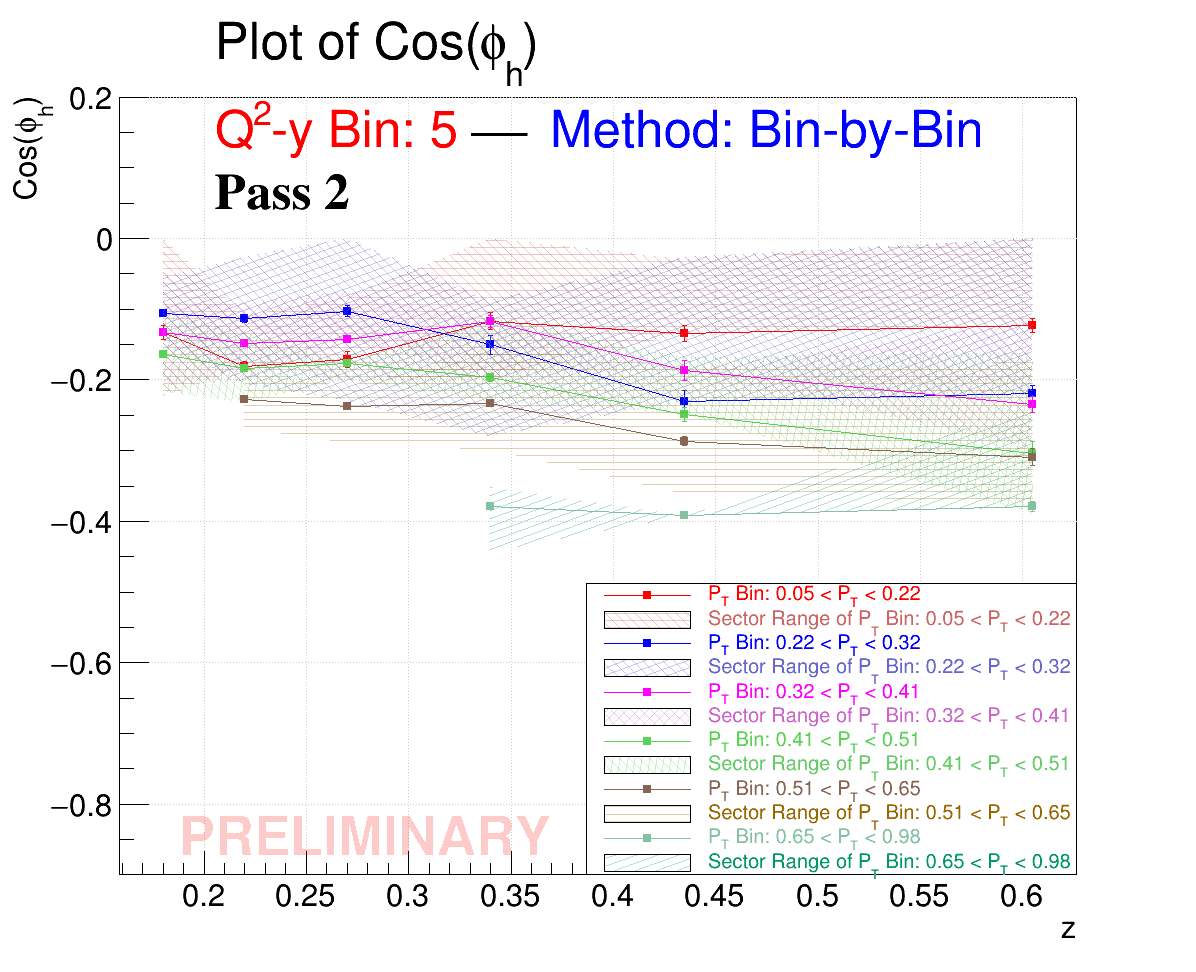

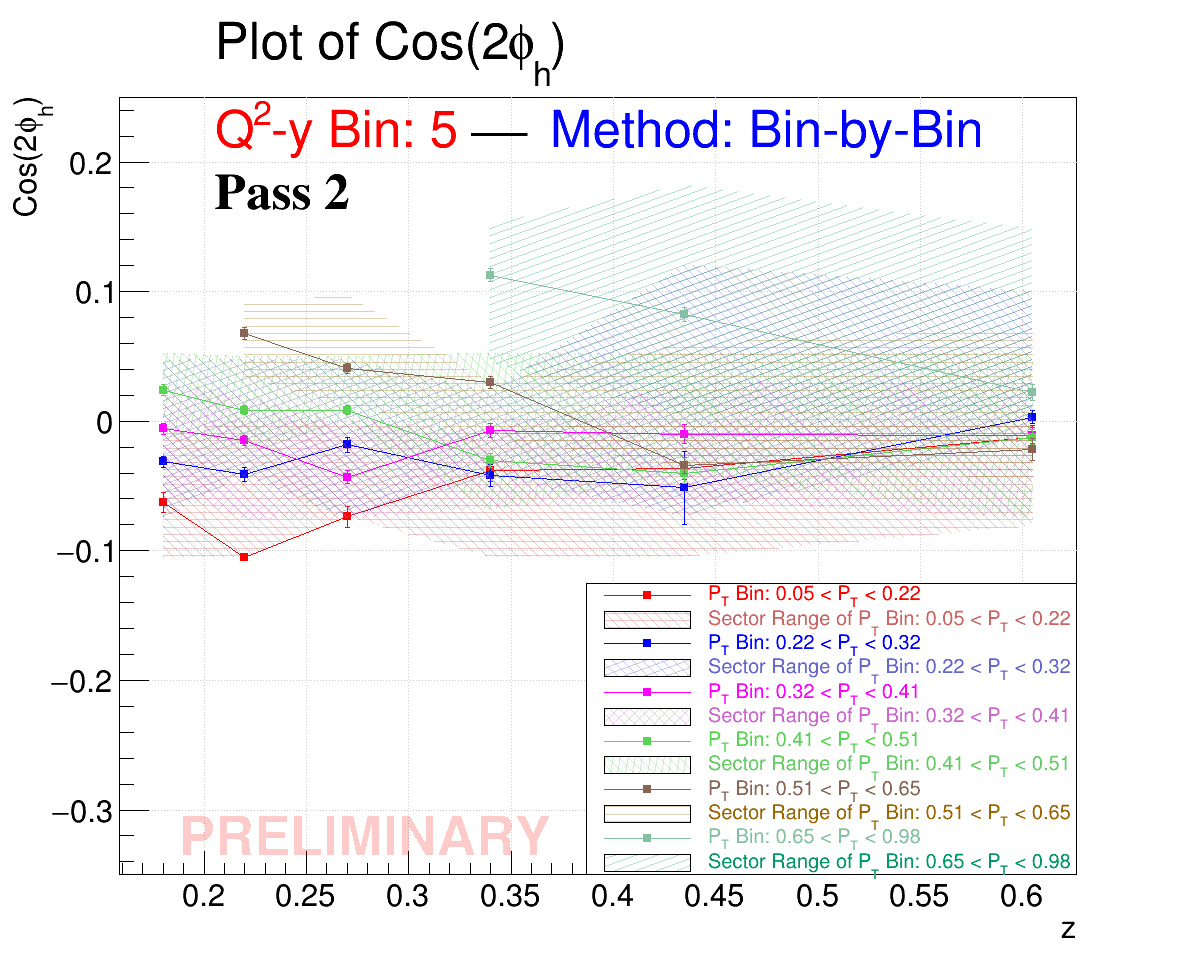

In [16]:
import ROOT
from array import array
Fit_Parameters = {}   
Fit_Parameters["(Bin 5-1)_(Parameter B)"]  = [[-0.122784766, 0.009950215], [-2.60E-07,    2.70E-07],    [-0.110385127, 0.08232764],  [-0.093859625, 0.070064939], [-0.108249186, 0.044048136], [-0.096732917, 0.046540774], [-0.119436407, 0.089505951]]
Fit_Parameters["(Bin 5-1)_(Parameter C)"]  = [[-0.012358374, 9.21E-03],    [-4.00E-09,    8.00E-09],    [-2.83E-12,    5.30E-12],    [-4.57E-10,    7.88E-10],    [-5.12E-12,    3.75E-12],    [-0.080688188, 0.03600326],  [-0.002899628, 0.001882553]]
Fit_Parameters["(Bin 5-2)_(Parameter B)"]  = [[-0.2194483,   0.012115446], [-0.273008572, 0.110805588], [-0.221884609, 0.073682438], [-2.00E-09,    4.00E-09],    [-0.043575304, 0.024767655], [-0.257770229, 0.121037138], [-0.148636568, 0.102103675]]
Fit_Parameters["(Bin 5-2)_(Parameter C)"]  = [[0.00322851,   0.005097444], [-0.013002136, 0.008282393], [-0.011112363, 0.007406839], [0.100107083,  0.037191121], [0.092822785,  0.069322745], [0.02529296,   0.036293506], [0.055168595,  0.032351863]]
Fit_Parameters["(Bin 5-3)_(Parameter B)"]  = [[-0.234731622, 0.011753168], [-0.221651425, 0.061602855], [-0.29561155,  0.061433243], [-0.118579658, 0.101452058], [-0.281086368, 0.066541626], [-0.229024219, 0.154221931], [-0.169299309, 0.072285653]]
Fit_Parameters["(Bin 5-3)_(Parameter C)"]  = [[-0.010763847, 0.006179969], [-0.074999999, 0.045434704], [-0.019048898, 0.012656183], [0.029999999,  0.019491084], [0.029999999,  0.019330631], [-0.026163562, 0.012658678], [0.029999989,  0.018105958]]
Fit_Parameters["(Bin 5-4)_(Parameter B)"]  = [[-0.304084241, 0.017112764], [-0.344555899, 0.05764255],  [-0.39000778,  0.087570473], [-0.340380436, 0.078628067], [-0.313124546, 0.212872105], [-0.161805158, 0.075166423], [-0.327999056, 0.071595151]]
Fit_Parameters["(Bin 5-4)_(Parameter C)"]  = [[-0.012260963, 0.005842549], [-0.075,       0.041854697], [0.025550662,  0.018928736], [0.010573364,  0.016081971], [-0.031011723, 0.021186157], [0.052499989,  0.033100717], [-0.038159372, 0.019246041]]
Fit_Parameters["(Bin 5-5)_(Parameter B)"]  = [[-0.309180457, 0.012067257], [-0.173967263, 0.07652863],  [-0.372261101, 0.053041783], [-0.24837014,  0.056128401], [-0.294088251, 0.081878746], [-0.263773225, 0.079095915], [-0.276946038, 0.073890208]]
Fit_Parameters["(Bin 5-5)_(Parameter C)"]  = [[-0.02177138,  0.008212516], [-0.038942669, 0.022394058], [0.003513285,  0.004960157], [-0.044999996, 0.029876289], [0.004477558,  0.002732896], [0.072831949,  0.054509847], [-0.006454868, 0.003683472]]
Fit_Parameters["(Bin 5-6)_(Parameter B)"]  = [[-0.379373371, 0.007159575], [-0.34371824,  0.046989946], [-0.240979766, 0.055014961], [-0.297051753, 0.05223815],  [-0.382200767, 0.056130947], [-0.333833133, 0.046133262], [-0.320153061, 0.058418096]]
Fit_Parameters["(Bin 5-6)_(Parameter C)"]  = [[0.022039542,  0.006232225], [0.005000001,  0.00725154],  [0.148582056,  0.04204928],  [0.069843692,  0.051641369], [0.041970357,  0.027938462], [0.005,        0.008281613], [0.049652298,  0.035337232]]
Fit_Parameters["(Bin 5-7)_(Parameter B)"]  = [[-0.133947294, 0.011158058], [-0.029963626, 0.019118999], [-0.092087112, 0.067373519], [-0.102292738, 0.073052193], [-0.149193406, 0.097204492], [-0.136716063, 0.112149636], [-0.112080498, 0.046659933]]
Fit_Parameters["(Bin 5-7)_(Parameter C)"]  = [[-0.036703672, 0.008426144], [-0.050159439, 0.0330332],   [-5.08E-12,    6.67E-12],    [-1.33E-11,    2.13E-11],    [-0.104787087, 0.069186992], [-0.03988112,  0.062066254], [-1.30E-11,    1.39E-11]]
Fit_Parameters["(Bin 5-8)_(Parameter B)"]  = [[-0.230389062, 0.015756777], [-0.195007106, 0.11373011],  [-0.197351003, 0.080501149], [-0.05521464,  0.040161138], [-0.245665354, 0.050362253], [-0.026671853, 0.036841195], [-0.246200875, 0.051318977]]
Fit_Parameters["(Bin 5-8)_(Parameter C)"]  = [[-0.051500374, 0.028342923], [-0.073072012, 0.02577663],  [-0.052771964, 0.028861507], [-0.019222545, 0.014399353], [-0.061480208, 0.039060647], [0.120801,     0.030996583], [-0.004517395, 0.001521867]]
Fit_Parameters["(Bin 5-9)_(Parameter B)"]  = [[-0.186377302, 0.014109241], [-0.248720058, 0.079834274], [-0.169220613, 0.12111708],  [-0.219352272, 0.053647753], [-0.129874248, 0.096549316], [-0.168364037, 0.052218401], [-0.158725729, 0.065666228]]
Fit_Parameters["(Bin 5-9)_(Parameter C)"]  = [[-0.009922203, 0.007229192], [-6.06E-02,    4.15E-02],    [-0.031810608, 0.021212077], [0.029999945,  0.019991434], [-0.019977563, 0.010263169], [0.03,         0.015502702], [0.021121142,  0.012888739]]
Fit_Parameters["(Bin 5-10)_(Parameter B)"] = [[-0.249028999, 0.009424743], [-0.168982134, 0.061178731], [-0.20090516,  0.046584174], [-0.276044312, 0.065567889], [-0.258925593, 0.047684522], [-0.243782771, 0.064520364], [-0.199594319, 0.060883046]]
Fit_Parameters["(Bin 5-10)_(Parameter C)"] = [[-0.040305639, 0.007606523], [-0.037084393, 0.04310831],  [0.052499999,  0.034970642], [-0.063068175, 0.030890182], [-0.024999975, 0.048666521], [-0.041134284, 0.040866936], [-0.028382132, 0.035126953]]
Fit_Parameters["(Bin 5-11)_(Parameter B)"] = [[-0.286641831, 0.006630969], [-0.179874303, 0.039957882], [-0.287997039, 0.036619173], [-0.20655492,  0.040978063], [-0.361036709, 0.041633778], [-0.242779977, 0.043274844], [-0.297327048, 0.041487893]]
Fit_Parameters["(Bin 5-11)_(Parameter C)"] = [[-0.03410467,  0.006023571], [0.001565954,  0.000971727], [-0.044999999, 0.024800104], [0.060009006,  0.04461985],  [-0.032732126, 0.01837285],  [-0.0261102,   0.013165136], [-0.034356455, 0.018369571]]
Fit_Parameters["(Bin 5-12)_(Parameter B)"] = [[-0.391475615, 0.005311826], [-0.373245479, 0.029339482], [-0.391272844, 0.035858505], [-0.371340608, 0.033083393], [-0.375515586, 0.033595996], [-0.408487323, 0.031444083], [-0.393505052, 0.03249088]]
Fit_Parameters["(Bin 5-12)_(Parameter C)"] = [[0.082336425,  0.005161721], [0.005000003,  0.005330585], [0.182595663,  0.031462405], [0.048453147,  0.036197731], [0.078277308,  0.028798073], [0.057125663,  0.041390347], [0.106527222,  0.029829971]]
Fit_Parameters["(Bin 5-13)_(Parameter B)"] = [[-0.116755884, 0.011567395], [-6.00E-09,    1.20E-08],    [-0.140529641, 0.105221319], [-0.165052937, 0.102938751], [-0.149163932, 0.110848164], [-0.139981938, 0.101632385], [-0.198326823, 0.041257595]]
Fit_Parameters["(Bin 5-13)_(Parameter C)"] = [[-0.038135784, 0.008268323], [-0.047906685, 0.035372244], [-0.006894508, 0.003856629], [-0.049669742, 0.026824307], [-0.044633516, 0.02427437],  [-0.060491458, 0.04474814],  [-0.104999963, 0.052484607]]
Fit_Parameters["(Bin 5-14)_(Parameter B)"] = [[-0.150423578, 0.01302987],  [-0.094854263, 0.063586065], [-0.279838388, 0.045215518], [-0.087485454, 0.056109375], [-0.203921196, 0.047165337], [-0.201506699, 0.050161018], [-0.153880435, 0.114715645]]
Fit_Parameters["(Bin 5-14)_(Parameter C)"] = [[-0.042025616, 0.008615293], [-0.066715008, 0.045740716], [0.022929699,  0.035674271], [-0.026650129, 0.019731784], [-0.074999998, 0.045180593], [-0.074999997, 0.04695479],  [-0.024985283, 0.017648854]]
Fit_Parameters["(Bin 5-15)_(Parameter B)"] = [[-0.117548956, 0.008081244], [-0.154646738, 0.058093319], [-0.127742633, 0.039925851], [-0.161999321, 0.041145663], [-0.152013272, 0.055163224], [-0.193612449, 0.052987098], [-0.091227069, 0.035592756]]
Fit_Parameters["(Bin 5-15)_(Parameter C)"] = [[-0.007083038, 0.005231802], [-0.040177781, 0.042310273], [-0.003348423, 0.006452759], [-0.024999997, 0.035707528], [-0.036473679, 0.04414678],  [-0.066487057, 0.033452493], [-0.00378229,  0.006217353]]
Fit_Parameters["(Bin 5-16)_(Parameter B)"] = [[-0.196325842, 0.005753685], [-0.112389297, 0.035916794], [-0.165810776, 0.032811634], [-0.198804297, 0.036204591], [-0.145661209, 0.03969091],  [-0.230208316, 0.035317671], [-0.191947555, 0.035919613]]
Fit_Parameters["(Bin 5-16)_(Parameter C)"] = [[-0.030610191, 5.35E-03],    [0.005786884,  0.003451237], [0.052499986,  0.023604104], [-0.038217422, 0.028070091], [-0.01080198,  0.006821966], [-0.043303637, 0.032463255], [-0.069312437, 0.035651712]]
Fit_Parameters["(Bin 5-17)_(Parameter B)"] = [[-0.232891417, 0.004581572], [-0.182435618, 0.027641276], [-0.262703184, 0.02820838],  [-0.208338226, 0.026611986], [-0.292807252, 0.026537101], [-0.298241711, 0.025982835], [-0.155301984, 0.028480178]]
Fit_Parameters["(Bin 5-17)_(Parameter C)"] = [[0.029695396,  0.00445177],  [0.052178938,  0.03728156],  [0.053914778,  0.038445385], [-0.012489948, 0.009296196], [0.012574428,  0.009117849], [0.021328668,  0.013674788], [0.049371595,  0.035193148]]
Fit_Parameters["(Bin 5-18)_(Parameter B)"] = [[-0.37844766,  0.005048642], [-0.363222511, 0.030025544], [-0.368197834, 0.031185222], [-0.377204067, 0.030334409], [-0.352104679, 0.029745328], [-0.443136925, 0.029331723], [-0.351548539, 0.030814023]]
Fit_Parameters["(Bin 5-18)_(Parameter C)"] = [[0.112595051,  0.004912075], [1.12E-01,     2.90E-02],    [0.153179676,  0.028479443], [0.124307523,  0.027712726], [0.045647969,  0.033852804], [0.108587793,  0.02804772],  [0.120777718,  0.028429941]]
Fit_Parameters["(Bin 5-19)_(Parameter B)"] = [[-0.170993732, 0.011942676], [-0.162505387, 0.060460661], [-0.158654101, 0.041263214], [-0.174747281, 0.077268135], [-0.202595411, 0.040628579], [-0.184275008, 0.092885153], [-0.083466943, 0.094447871]]
Fit_Parameters["(Bin 5-19)_(Parameter C)"] = [[-0.073877984, 0.008348911], [-0.105,       0.048876963], [-1.60E-13,    9.90E-14],    [-0.096752343, 0.056792698], [-0.104999987, 0.059463138], [-0.078904284, 0.044330726], [-0.034999987, 0.035276388]]
Fit_Parameters["(Bin 5-20)_(Parameter B)"] = [[-0.102727079, 0.007908231], [-3.00E-09,    4.00E-09],    [-0.124874889, 0.088893724], [-0.229493959, 0.03760226],  [-0.170528345, 0.049897242], [-0.138678356, 0.048422439], [-0.001652645, 0.00107311]]
Fit_Parameters["(Bin 5-20)_(Parameter C)"] = [[-0.018035459, 0.005763146], [-0.002436858, 0.001516887], [0.003981227,  0.00257107],  [-0.075,       0.041448732], [-0.043310994, 0.031932784], [-0.047017006, 0.035014522], [0.047521825,  0.035547493]]
Fit_Parameters["(Bin 5-21)_(Parameter B)"] = [[-0.142421971, 0.005268439], [-0.073543751, 0.027817384], [-0.144885453, 0.032508418], [-0.120840374, 0.032977074], [-0.139794358, 0.034012819], [-0.16237149,  0.02876754],  [-0.088123048, 0.02851162]]
Fit_Parameters["(Bin 5-21)_(Parameter C)"] = [[-0.043355586, 0.005047804], [-0.008571446, 0.013342612], [-0.011977221, 0.00741922],  [-0.055384662, 0.034804637], [-0.016030729, 0.011226233], [-0.075,       0.029178186], [-0.003623883, 0.004536996]]
Fit_Parameters["(Bin 5-22)_(Parameter B)"] = [[-0.176373477, 0.00411877],  [-0.168198803, 0.024304207], [-0.167651827, 0.024534972], [-0.186159388, 0.024573288], [-0.199991662, 0.025040797], [-0.163211582, 0.024215136], [-0.164250958, 0.025381046]]
Fit_Parameters["(Bin 5-22)_(Parameter C)"] = [[0.008476963,  0.003466893], [0.00371215,   0.002396943], [0.002002584,  0.001328559], [0.003357004,  0.002172727], [0.002119271,  0.001453714], [-0.002987776, 0.002162023], [0.04986406,   0.033573284]]
Fit_Parameters["(Bin 5-23)_(Parameter B)"] = [[-0.238126039, 0.004134672], [-0.210279834, 0.024292552], [-0.240299783, 0.024819523], [-0.243426483, 0.025085999], [-0.220990741, 0.025058536], [-0.289791298, 0.024193699], [-0.223851669, 0.025659238]]
Fit_Parameters["(Bin 5-23)_(Parameter C)"] = [[0.040817286,  0.004068837], [0.012358868,  0.008738284], [0.028539615,  0.021283305], [0.042346189,  0.03091272],  [0.043847411,  0.031766546], [0.033054439,  0.024770766], [0.097312038,  0.022326175]]
Fit_Parameters["(Bin 5-25)_(Parameter B)"] = [[-0.180669331, 0.007421719], [-0.142894357, 0.087682798], [-0.10912124,  0.042498872], [-0.116549362, 0.075203272], [-0.223520722, 0.14921974],  [-0.20752268,  0.038209681], [-0.123277887, 0.089378362]]
Fit_Parameters["(Bin 5-25)_(Parameter C)"] = [[-0.104999999, 0.002950779], [-0.104999978, 0.045015149], [-3.89E-10,    3.92E-10],    [-0.10499998,  0.043212284], [-0.09892488,  0.054723287], [-0.104999992, 0.047796284], [-0.071777223, 0.050892753]]
Fit_Parameters["(Bin 5-26)_(Parameter B)"] = [[-0.113022546, 0.005864943], [-0.044931776, 0.033692399], [-0.205243421, 0.029495053], [-0.089997778, 0.031448782], [-0.026218982, 0.015320484], [-0.151341772, 0.033831548], [-0.085860025, 0.032210534]]
Fit_Parameters["(Bin 5-26)_(Parameter C)"] = [[-0.041474994, 0.005399077], [-0.042655279, 0.031994231], [-0.074999999, 0.043240972], [-0.032263296, 0.023397895], [0.047371893,  0.035296398], [-0.057469971, 0.033550934], [-0.038564922, 0.028759968]]
Fit_Parameters["(Bin 5-27)_(Parameter B)"] = [[-0.148342517, 0.004070139], [-0.092239142, 0.023970348], [-0.155733735, 0.024727504], [-0.114815539, 0.024075818], [-0.135083863, 0.024361108], [-0.168306542, 0.022968171], [-0.200314732, 0.024856009]]
Fit_Parameters["(Bin 5-27)_(Parameter C)"] = [[-0.014770494, 0.003895867], [-0.003489041, 0.002368396], [0.012556641,  0.008645455], [-0.027891617, 0.020655365], [-0.015389175, 0.007980555], [-0.075,       0.045228753], [0.019744148,  0.012441845]]
Fit_Parameters["(Bin 5-28)_(Parameter B)"] = [[-0.184120127, 0.004002167], [-0.133371021, 0.023437075], [-0.197904118, 0.023945006], [-0.157839658, 0.024736965], [-0.184875982, 0.02431671],  [-0.179047909, 0.02435955],  [-0.232240853, 0.024690438]]
Fit_Parameters["(Bin 5-28)_(Parameter C)"] = [[0.008560373,  0.003444382], [-0.02379238,  0.016965432], [-0.002372507, 0.001749186], [0.049687367,  0.033593674], [-0.009965728, 0.007422884], [0.02128822,   0.014593654], [0.027717782,  0.020605285]]
Fit_Parameters["(Bin 5-29)_(Parameter B)"] = [[-0.227238516, 0.004715808], [-0.182281446, 0.027811637], [-0.249398017, 0.028179907], [-0.217067507, 0.027886406], [-0.201901401, 0.027904396], [-0.222014837, 0.027486089], [-0.268451362, 0.028624751]]
Fit_Parameters["(Bin 5-29)_(Parameter C)"] = [[0.067776373,  0.0045514],   [0.070007057,  0.024589344], [0.084895494,  0.025389093], [0.063880844,  0.024312267], [0.04041301,   0.030015806], [0.033768794,  0.025321915], [0.091578175,  0.025202575]]
Fit_Parameters["(Bin 5-31)_(Parameter B)"] = [[-0.133008641, 0.010446763], [-0.141603086, 0.094711834], [-0.172028148, 0.0456371],   [-3.04E-11,    4.35E-11],    [-0.120964223, 0.090385971], [-0.225,       0.093556116], [-0.204287638, 0.042383432]]
Fit_Parameters["(Bin 5-31)_(Parameter C)"] = [[-0.062779428, 0.007572911], [-0.105,       0.057566936], [-0.032812135, 0.017026564], [-0.008513886, 0.004625692], [-0.067463935, 0.049511606], [-0.105,       0.047482315], [-0.044959841, 0.026141994]]
Fit_Parameters["(Bin 5-32)_(Parameter B)"] = [[-0.105277785, 0.004322859], [-0.115739115, 0.026482611], [-0.066317543, 0.04830322],  [-0.083499425, 0.029921814], [-0.056046099, 0.041728772], [-0.080569306, 0.02924558],  [-0.149631229, 0.031378752]]
Fit_Parameters["(Bin 5-32)_(Parameter C)"] = [[-0.031361891, 0.004201983], [-0.075,       0.030787655], [0.019339995,  0.011471875], [-0.050621554, 0.036724307], [0.01828681,   0.010982638], [-0.056041977, 0.034478096], [0.047176919,  0.034968498]]
Fit_Parameters["(Bin 5-33)_(Parameter B)"] = [[-0.133274503, 0.003795212], [-0.094466334, 0.022191757], [-0.112474349, 0.022942701], [-0.128649301, 0.02251471],  [-0.139627877, 0.023531836], [-0.113465673, 0.021789187], [-0.207028535, 0.022941969]]
Fit_Parameters["(Bin 5-33)_(Parameter C)"] = [[-0.00580963,  0.004312984], [-0.02163218,  0.014479245], [0.029999981,  0.01926778],  [-0.031190654, 0.023400207], [0.03,         0.013986628], [-0.05411126,  0.020299982], [-0.010509017, 0.007786664]]
Fit_Parameters["(Bin 5-34)_(Parameter B)"] = [[-0.164100447, 0.004227009], [-0.183929155, 0.024058545], [-0.132517514, 0.025026459], [-0.108769163, 0.025406521], [-0.146692136, 0.024163906], [-0.167626211, 0.025510698], [-0.217534161, 0.025015711]]
Fit_Parameters["(Bin 5-34)_(Parameter C)"] = [[0.024001261,  0.004025706], [0.001470259,  0.001090422], [0.044247978,  0.0299222],   [0.044717718,  0.030297659], [-0.013731043, 0.008286142], [0.052499999,  0.024933578], [0.007592337,  0.004285778]]


latex = {}

Parameter = "Parameter C"
pT_row_1  = [1,  7, 13, 19, 25, 31]
pT_row_2  = [2,  8, 14, 20, 26, 32]
pT_row_3  = [3,  9, 15, 21, 27, 33]
pT_row_4  = [4, 10, 16, 22, 28, 34]
pT_row_5  = [5, 11, 17, 23, 29]
pT_row_6  = [6, 12, 18]

# y_values, y_errs = {}, {}
# y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = {}, {}, {}, {}
# for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
#     current_max_val = -float("inf")
#     current_max_err = -float("inf")
#     current_min_val =  float("inf")
#     current_min_err =  float("inf")
#     for val, err in row:
#         if(current_max_val  < val):
#             current_max_val = val
#             current_max_err = err
#         if(current_min_val  > val):
#             current_min_val = val
#             current_min_err = err
#     y_maxs_collect.append(current_max_val)
#     y_max_errs_collect.append(current_max_err)
#     y_mins_collect.append(current_min_val)
#     y_min_errs_collect.append(current_min_err)

x_values           = {}
y_values           = {}
y_errs             = {}
y_maxs_collect     = {}
y_max_errs_collect = {}
y_mins_collect     = {}
y_min_errs_collect = {}
tgraph_ext_shaded  = {}
tgraph_shaded      = {}
tgraph_errors      = {}
canvas             = {}
legend             = {}
mg                 = {}


for Parameter in ["Parameter B", "Parameter C"]:
    PT_BIN_COLOR = 1
#     PT_BIN_COLOR = 2

    canvas[f"(Bin 5_({Parameter})"] = ROOT.TCanvas(f"canvas_(Bin 5)_({Parameter})", "Graph with Extended Shaded Regions", 1200, 1000)
    legend[f"(Bin 5_({Parameter})"] = ROOT.TLegend(0.9, 0.1, 0.49, 0.4)  # Adjust these coordinates as needed
    # legend[f"(Bin 5_({Parameter})"].SetHeader("Legend", "C")  # Optional header

    # Create a multigraph
    mg[f"(Bin 5_({Parameter})"] = ROOT.TMultiGraph()
    mg[f"(Bin 5_({Parameter})"].SetName(f"(Bin 5_({Parameter})")
    row = -1
#     row = 0
    for pT_row in [pT_row_1, pT_row_2, pT_row_3, pT_row_4, pT_row_5, pT_row_6]:
#     for pT_row in [pT_row_2]:
        row += 1
        if(row == 3):
            row += 1
        PT_BIN_COLOR     += 1
        if(PT_BIN_COLOR in [3, 5, 7]):
            PT_BIN_COLOR += 1
        if(PT_BIN_COLOR in [9]):
            PT_BIN_COLOR  = 28
        if(PT_BIN_COLOR in [29]):
            PT_BIN_COLOR  = 30
        if(PT_BIN_COLOR in [31]):
            PT_BIN_COLOR  = 42
        if(PT_BIN_COLOR in [43]):
            PT_BIN_COLOR  = 46
        if(PT_BIN_COLOR in [47]):
            PT_BIN_COLOR  = 12

        if(PT_BIN_COLOR == 2):
            PT_FILL_COLOR = ROOT.kRed
        if(PT_BIN_COLOR == 4):
            PT_FILL_COLOR = ROOT.kBlue
        if(PT_BIN_COLOR == 6):
            PT_FILL_COLOR = ROOT.kMagenta
        if(PT_BIN_COLOR == 8):
            PT_FILL_COLOR = ROOT.kGreen
        if(PT_BIN_COLOR == 28):
            PT_FILL_COLOR = ROOT.kOrange
        if(PT_BIN_COLOR == 30):
            PT_FILL_COLOR = ROOT.kTeal
        if(PT_BIN_COLOR == 42):
            PT_FILL_COLOR = ROOT.kYellow

        x_values[f"(Bin 5-{pT_row})_({Parameter})"] = []
        y_values[f"(Bin 5-{pT_row})_({Parameter})"], y_errs[f"(Bin 5-{pT_row})_({Parameter})"] = [], []
        y_maxs_collect[f"(Bin 5-{pT_row})_({Parameter})"], y_max_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"], y_mins_collect[f"(Bin 5-{pT_row})_({Parameter})"], y_min_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"] = [], [], [], []
        for z_pT_Bin in pT_row:
            # print(Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"])
            x_values[f"(Bin 5-{pT_row})_({Parameter})"].append(round(Find_Q2_y_z_pT_Bin_Stats(5, z_pT_Bin)[1][0][1], 3))
            y_values[f"(Bin 5-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][0])
            y_errs[f"(Bin 5-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][1])
            current_max_val = -float("inf")
            current_max_err = -float("inf")
            current_min_val =  float("inf")
            current_min_err =  float("inf")
            for sec in range(1, 7):
                bounds_upper = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0] + Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][1]
                bounds_lower = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0] - Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][1]
                center_val = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][0]
                center_err = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][1]
                if(not (((center_val + center_err) < bounds_upper) and ((center_val - center_err) > bounds_lower))):
                    if(((center_val + center_err) < Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_max_val < Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_max_val = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_max_err = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][1]
                    if(((center_val + center_err) > Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_min_val > Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_min_val = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_min_err = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][sec][1]
            if(current_max_val in [-float("inf")]):
                current_max_val = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][0]
                current_max_err = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][1]
            if(current_min_val in [float("inf")]):
                current_min_val = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][0]
                current_min_err = Fit_Parameters[f"(Bin 5-{z_pT_Bin})_({Parameter})"][0][1]
            y_maxs_collect[f"(Bin 5-{pT_row})_({Parameter})"].append(current_max_val)
            y_max_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"].append(current_max_err)
            y_mins_collect[f"(Bin 5-{pT_row})_({Parameter})"].append(current_min_val)
            y_min_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"].append(current_min_err)

        x_values_main = array('d', x_values[f"(Bin 5-{pT_row})_({Parameter})"])
        y_values_main = array('d', y_values[f"(Bin 5-{pT_row})_({Parameter})"])
        y_errs_main   = array('d', y_errs[f"(Bin 5-{pT_row})_({Parameter})"])
        y_maxs        = array('d', y_maxs_collect[f"(Bin 5-{pT_row})_({Parameter})"])
        y_max_errs    = array('d', y_max_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"])
        y_mins        = array('d', y_mins_collect[f"(Bin 5-{pT_row})_({Parameter})"])
        y_min_errs    = array('d', y_min_errs_collect[f"(Bin 5-{pT_row})_({Parameter})"])
        y_err_low     = array('d', [y - min_val   for y,   min_val in zip(y_values_main,   y_mins)])
        y_err_high    = array('d', [max_val - y   for y,   max_val in zip(y_values_main,   y_maxs)])
        ext_err_low   = array('d', [err + min_err for err, min_err in zip(y_err_low,   y_min_errs)])
        ext_err_high  = array('d', [err + max_err for err, max_err in zip(y_err_high,  y_max_errs)])
        n_points = len(x_values_main)

        canvas[f"(Bin 5_({Parameter})"].Draw()
        tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"] = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
        tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetName(f"tgraph_ext_shaded_(Bin 5-{pT_row})_({Parameter})")
        tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low,   y_err_high)
        tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetName(f"tgraph_shaded_(Bin 5-{pT_row})_({Parameter})")
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_errs_main, y_errs_main)
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].SetName(f"tgraph_errors_(Bin 5-{pT_row})_({Parameter})")

        # tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColor(ROOT.kOrange)
    #     tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-9)
        tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-9, 0.35-(row*0.01))

    #     tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillStyle(3344)
    #     tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillStyle(3944)
    #     tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].Draw("A3 sames")
        tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"].GetYaxis().SetRangeUser(-0.9, 0.2)
        # tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColor(ROOT.kBlue-10)
    #     tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillStyle(3021)


    #     tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillStyle(3644)
    #     tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-6)
        tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-6, 0.35-(row*0.01))
        tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].SetFillStyle(3240+(row*2))

    #     tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"].Draw("3 sames")
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].SetMarkerStyle(21)
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].SetMarkerSize(1)
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].SetLineColor(PT_BIN_COLOR)
        tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].SetMarkerColor(PT_BIN_COLOR)
    #     tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"].Draw("PL sames")


    #     mg[f"(Bin 5_({Parameter})"].Add(tgraph_ext_shaded[f"(Bin 5-{pT_row})_({Parameter})"], "3")
        mg[f"(Bin 5_({Parameter})"].Add(tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"], "A3")
        mg[f"(Bin 5_({Parameter})"].Add(tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"], "PL")
        legend[f"(Bin 5_({Parameter})"].AddEntry(tgraph_errors[f"(Bin 5-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_BIN_COLOR),    "]{P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(5, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(5, pT_row[0])[1][1][2], 3)), "}"]), "PL")
        legend[f"(Bin 5_({Parameter})"].AddEntry(tgraph_shaded[f"(Bin 5-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_FILL_COLOR-6), "]{Sector Range of P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(5, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(5, pT_row[0])[1][1][2], 3)), "}"]), "f")
        canvas[f"(Bin 5_({Parameter})"].Modified()
        canvas[f"(Bin 5_({Parameter})"].Update()

    canvas[f"(Bin 5_({Parameter})"].Draw()

    mg[f"(Bin 5_({Parameter})"].SetTitle("".join(["#splitline{#splitline{Plot of Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: 5} #topbar #color[", str(root_color.Blue), "]{Method: Bin-by-Bin}}}{", str(root_color.Bold), "{Pass 2}}; z; Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})"]))

    mg[f"(Bin 5_({Parameter})"].Draw("A")
    mg[f"(Bin 5_({Parameter})"].GetYaxis().SetRangeUser(-0.35 if("C" in str(Parameter)) else -0.9, 0.25 if("C" in str(Parameter)) else 0.2)
    legend[f"(Bin 5_({Parameter})"].Draw()
    canvas[f"(Bin 5_({Parameter})"].Modified()
    canvas[f"(Bin 5_({Parameter})"].Update()
    latex[f"(Bin 5_({Parameter})"] = ROOT.TLatex()
    latex[f"(Bin 5_({Parameter})"].SetTextSize(0.06)
    latex[f"(Bin 5_({Parameter})"].SetTextColorAlpha(ROOT.kRed, 0.2)
    latex[f"(Bin 5_({Parameter})"].DrawTextNDC(0.15, 0.12, "PRELIMINARY")  # Normalized coordinates
    
    Save_Name = "".join(["Sector_Dependence_Plot_Q2_y_Bin_5_", "CosPhi" if("B" in Parameter) else "Cos2Phi", ".pdf"])
    
    if(True):
        canvas[f"(Bin 5_({Parameter})"].SaveAs(Save_Name)
        print(f"\n{color.BBLUE}Saved: {color.UNDERLINE}{Save_Name}{color.END}\n")
    else:
        print(f"\n{color.RED}Did NOT save: {color.BOLD}{color.UNDERLINE}{Save_Name}{color.END}\n")

print("Done")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


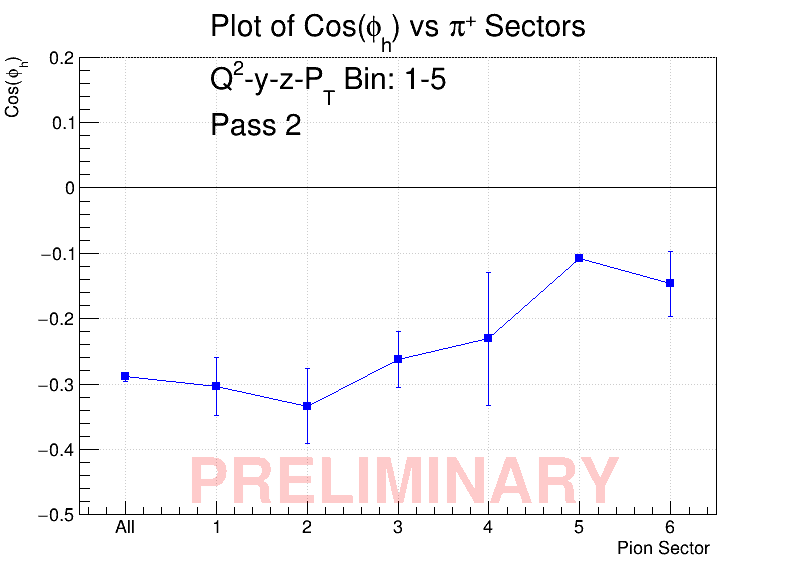

In [40]:
import ROOT

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

# Data setup
sectors = ["All", "1", "2", "3", "4", "5", "6"]


y_values = [-0.288685524, -0.303493982, -0.334040898, -0.26232025, -0.230848096, -0.10816066, -0.146877427]
y_errors = [0.007063321, 0.044081401, 0.05749635, 0.042981665, 0.101256651, 0.005633916, 0.049799966]
x_values = range(len(sectors))  # x positions for the points

# Create TGraphErrors
n_points = len(x_values)
graph = ROOT.TGraphErrors(n_points)

for i in range(n_points):
    graph.SetPoint(i, x_values[i], y_values[i])
    graph.SetPointError(i, 0, y_errors[i])

# Style the graph
graph.SetTitle("#splitline{#splitline{Plot of Cos(#phi_{h}) vs #pi^{+} Sectors}{Q^{2}-y-z-P_{T} Bin: 1-5}}{Pass 2}; Pion Sector; Cos(#phi_{h})")
graph.SetMarkerStyle(21)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)

# Create canvas
canvas = ROOT.TCanvas("canvas", "Graph with Error Bars", 800, 600)
graph.Draw("APL")  # Draw axes and points

# Adjust the x-axis range to start at -0.5
graph.GetXaxis().SetLimits(-0.5, n_points-0.5)

graph.GetYaxis().SetRangeUser(-0.5, 0.2)

# Draw a line at y=0
line = ROOT.TLine(-0.5, 0, n_points-0.5, 0)
line.SetLineColor(ROOT.kBlack)
line.Draw()

# Adding text label
latex = ROOT.TLatex()
latex.SetTextSize(0.12)
latex.SetTextColorAlpha(ROOT.kRed, 0.2)
latex.DrawTextNDC(0.235, 0.12, "PRELIMINARY")  # Normalized coordinates

# Customizing the x-axis labels
axis = graph.GetXaxis()
for i, sector in enumerate(sectors):
    axis.ChangeLabel(i+1, -1, -1, -1, -1, -1, sector)

# Update canvas to draw everything
canvas.Update()
canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


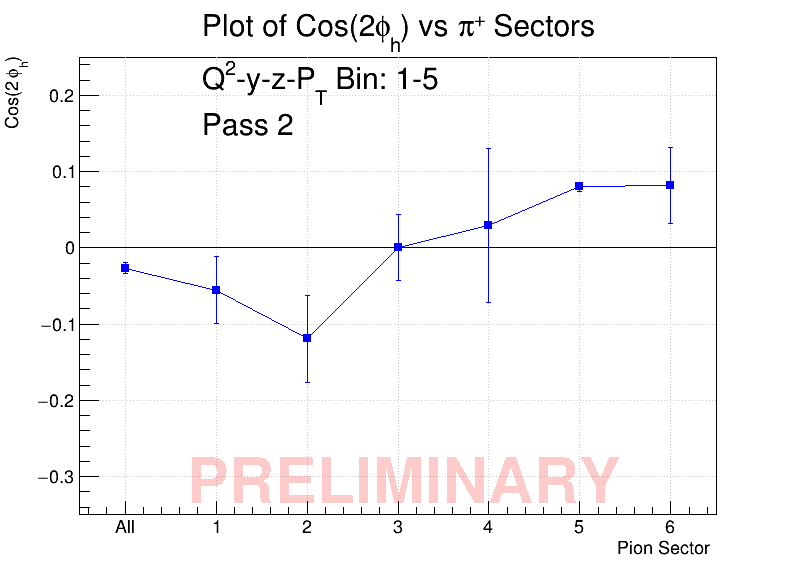

In [42]:
import ROOT

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

# Data setup
sectors = ["All", "1", "2", "3", "4", "5", "6"]

y_values = [-0.02661553, -0.055527629, -0.119374471, 0.000845674, 0.029207826, 0.079826549, 0.081989667]
y_errors = [0.007063321, 0.044081401, 0.05749635, 0.042981665, 0.101256651, 0.005633916, 0.049799966]
x_values = range(len(sectors))  # x positions for the points

# Create TGraphErrors
n_points = len(x_values)
graph = ROOT.TGraphErrors(n_points)

for i in range(n_points):
    graph.SetPoint(i, x_values[i], y_values[i])
    graph.SetPointError(i, 0, y_errors[i])

# Style the graph
graph.SetTitle("#splitline{#splitline{Plot of Cos(2#phi_{h}) vs #pi^{+} Sectors}{Q^{2}-y-z-P_{T} Bin: 1-5}}{Pass 2}; Pion Sector; Cos(2#phi_{h})")
graph.SetMarkerStyle(21)
graph.SetMarkerColor(ROOT.kBlue)
graph.SetLineColor(ROOT.kBlue)

# Create canvas
canvas = ROOT.TCanvas("canvas", "Graph with Error Bars", 800, 600)
graph.Draw("APL")  # Draw axes and points

# Adjust the x-axis range to start at -0.5
graph.GetXaxis().SetLimits(-0.5, n_points-0.5)

graph.GetYaxis().SetRangeUser(-0.35, 0.25)

# Draw a line at y=0
line = ROOT.TLine(-0.5, 0, n_points-0.5, 0)
line.SetLineColor(ROOT.kBlack)
line.Draw()

# Adding text label
latex = ROOT.TLatex()
latex.SetTextSize(0.12)
latex.SetTextColorAlpha(ROOT.kRed, 0.2)
latex.DrawTextNDC(0.235, 0.12, "PRELIMINARY")  # Normalized coordinates

# Customizing the x-axis labels
axis = graph.GetXaxis()
for i, sector in enumerate(sectors):
    axis.ChangeLabel(i+1, -1, -1, -1, -1, -1, sector)

# Update canvas to draw everything
canvas.Update()
canvas.Draw()
